<a href="https://colab.research.google.com/github/swsewon3-ship-it/intro_to_python_workshop/blob/main/session3-1_nltk_worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📝 Python for Public Policy — Session 3 Worksheet  
**Theme:** Text Analysis with NLTK (Inaugural Speeches or Your Own `.txt`)

Use this notebook during the 60‑minute student-driven block. **No presentations** at the end.  
You may analyze an NLTK inaugural speech **or** upload your own plain text file (`.txt`).

**Timing guide:**  
- Part A: 10 min · Part B: 10 min · Part C: 10 min · Part D: 10 min · Part E: 10 min · Part F: 10 min



## Part 0 — Setup (run once)
Upgrade NLTK (Colab often pins an older version) and download the datasets we need.


In [ ]:
# We upgrade NLTK to the latest version so functions and data work as expected.
!pip -q install -U nltk

# Now we import nltk and download only the small packages we need for this session.
import nltk
needed = ["punkt",             # tokenizer (splits text into sentences and words)
          "punkt_tab",         # tokenizer (splits text into words) - explicitly added
          "stopwords",         # list of common words to remove (the, and, is, ...)
          "wordnet",           # lexical database used for lemmatization (getting word roots)
          "averaged_perceptron_tagger_eng",  # part-of-speech tagger (N/V/Adj/Adv)
          "inaugural"]         # a small corpus of U.S. inaugural addresses
for pkg in needed:
    nltk.download(pkg, quiet=True) # no status text printed - just downloads

print("NLTK version:", nltk.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.2 MB/s eta 0:00:00
NLTK version: 3.9.1



## Part A — Pick Your Text (10 min)
Choose **one** source below.

### Option 1 — Use the built-in Inaugural Speeches corpus


In [ ]:

from nltk.corpus import inaugural
fileids = inaugural.fileids()
fileids[:10]  # preview a few
# Choose one speech (change the index or pick a specific filename from 'fileids')
s1 = fileids[-5]
raw = inaugural.raw(s1)
print("Analyzing:", s1, "| characters:", len(raw))


Analyzing: 2009-Obama.txt | characters: 13439



### Option 2 — Upload your own `.txt`
> Must be **plain text** (e.g., speech, policy memo, report). If you upload multiple files, we’ll read the first one.


If you don’t already have a `.txt` file (like the inaugural corpus examples), you can **make one directly in Colab**.  
This is helpful if you want to analyze text copied from a website, a PDF, or your own writing.

📝 Example: paste any text (such as a news article, policy speech, or blog post) into the triple quotes below.

In [ ]:

# Create a plain-text file in Colab
text = """Korea’s Unborn Future
Understanding Low‑Fertility Trends
Korea’s Unborn Future Understanding Low‑Fertility Trends


KOREA’S UNBORN FUTURE: UNDERSTANDING LOW -FERTILITY TRENDS © OECD 2025
  Executive Summary
Birth rates are falling across the world and nowhere more so than in Korea, where fertility has imploded to
unprecedented lows. As a consequence, the Korean population is expected to halve over the next six
decades and the elderly (aged 65 or older) will account for around 58% of the total population by 2082.
During this ti me, the old -age dependency ratio (the ratio of individuals aged 65 and over to those aged 20
to 64) will surge from 28% today to 155%. The combination of a shrinking and ageing population poses a
formidable challenge to sustaining social insurance systems and maintaining living standards. Labour
shortages will intensify as retirees make up an increasing share of the population, and the fiscal cost of
health, long -term care and pensions is set to more than double to 17.4% of GDP by 2060
In Korea, every woman  had six children on average over her lifetime in 1960. This dropped to just below
one child per woman in 2018, and fell further year by year to reach 0.72 in 2023. From the 1960s to the
mid-2010s, the decline in fertility came about as Korean women postpo ned the age at which they get
married and reduced the number of children they had once married. During this time period, the vast
majority eventually married and had at least one child. The period starting in the late 2010s marks a
change, as falling ferti lity from this time on has increasingly been driven by married women having no
children and women foregoing marriage altogether. This trend seems to have continued into the 2020s,
even though the numbers remain difficult to interpret due to the Covid -19 pa ndemic.
To an extent falling fertility reflects that young people around the world have better access to birth control
and increased freedom to use it to live the lives they want with the number of children they prefer, which
increases welfare for those co ncerned and reduces environmental pressures. However, in several
countries, including Korea, young generations bring very few children to the world despite their preferences
for more, and despite society needing more children to dampen the consequences of rapid ageing.
When gender -unequal norms and a large gender wage gap meet long hours and inflexible working
practices, many Korean mothers are constrained to choose family over career for an extended period of
time, while men have little choice but to beco me the family breadwinner. This reduces the well -being of
both men and women as well as family income. Seniority -based wages and a dual labour market
compound the loss of lifetime income for any extended labour market absence. In previous times, when
stron g social norms dictated women to marry and have children , and women’s career opportunities were
limited, women more easily chose family over employment. As Korea has grown richer, women have
gained more equal opportunities to men in education and working l ife, and families increasingly rely on two
incomes, the sacrifice of family income for each child has grown and pushed fertility to new lows.
Beyond the family budget constraint, it also matters to fertility that mothers bear a heavier individual career
burden than fathers, as decisions to have a child normally require agreement between the parents. The
importance of this individual cost of pare nthood may have increased as an increasing share of marriages
end in divorce, and it may have been pushed up by a shift in preferences. When Korean married women
were in employment in the past, this tended to be either out of necessity because their husban d’s incomes
were too low to feed the family, or because the financial rewards were substantial. However, since the
early 2000s, the elasticity of married women's labour supply in response to their own wages and spouses'

  income have been decreasing consider ably, which indicates that women’s preferences may have shifted
in favour of career.
Direct costs add to the loss of income associated with parenthood. While expenditures for food, clothing
and childcare have declined as a share of average family income, increases in housing expenditure have
reduced  fertility rates across the OECD, including Korea. In a reflection of Korea’s dual labour market,
many parents allocate a sizeable portion of their income to private tutoring to help their children get ahead,
making education expenditure another major hurdle to have children. In 2023, almost 80% of Korean
schoolchildren participated in private tutoring for which their parents spent roughly 10% of their disposable
income on average.
Family policies, including early  childhood education and care, paid parental leave and family benefits, can
make it easier to combine career and parenthood and partially compensate parents for cost from having
and raising children. A major policy reform in 2013 made all preschool -aged ch ildren eligible for free
childcare regardless of parental income, accompanied by the introduction of a parental home -care
allowance for parents opting to care for their child at home. Parental leave has also been expanded and
strengthened considerably over  time in Korea, with the result that both the duration and the level of
payment eligible parents are entitled to compare well with the OECD average. Even so, the effects of these
policies in terms of female employment and fertility have been underwhelming.  Empirical evidence points
to a sizeable income effect in which cash transfers and subsidised services provided in -kind increase
household disposable income, enabling mothers to stay at home. Individual situations and preferences
play an important role, wi th for example mothers living in areas with quality childcare available being more
likely to increase their labour supply as a response to the 2013 reform. The career maintenance effect of
family policies will likely be weaker and the income effect stronge r in countries like Korea where labour
market institutions make it difficult to combine career and children at the outset.
The Covid -19 pandemic led to postponed marriages and childbirths, temporary pushing fertility below its
trend. A recent uptick in marriages and births reflects a catch -up effect from the pandemic years. However,
it is not possible to untangle the effects of the pandemic from other forces acting, and the possibility of a
trend shift in fertility therefore cann ot be ruled out. The working hour reduction reform which was phased
in from 2018 to 2021 represents a major shift towards work -life balance. Cumulating with the strengthening
of family policies the past couple of decades it could potentially have tipped th e scales for prospective
working parents. However, a fertility revival will at best be slow and gradual until policies, gender norms
and working practices taken together support a large majority of women to pursue career and family in
tandem.

  1 Overview: Rev ersing the demographic meltdown

  Birth rates are falling across the world. This is arguably good news for the environment and for the women
and men across the world who have gained access to birth control and have the freedom to use it to live
the lives they want with the number of children they prefer. Even though this message of sustainability and
empowerment is true, there is also another side to the story. In several countries, young generations  bring
very few children to the world despite their preferences for more, and despite society desperately needing
more children to dampen rapid ageing. In Korea, every woman had  six children on average  over her lifetime
in 1960  (Total Fertility Rate, TFR).  The TFR  dropped to just below one child per woman in 2018, and fell
further year by year to reach 0.72 in 2023. This is the lowest in the world,  lower than in Japan (1.2), China
(1.2), Singapore (1.0)  and Chinese Taipei (0.9)  (Yang et al., 2024) . Most imp ortantly, it is far less than the
number of children Korean women say they would like to have.
Ultra -low fertility in Korea  is a symptom of structural traits of Korean society constraining people’s
possibilities to combine career and family. Parents need t o reallocate some of the time that would otherwise
have been spent on paid work to childcare. For a variety of reasons discussed in this book, mothers tend
to reallocate more time away from work and towards childcare than fathers. The value of this time in creases
with average incomes, and it increases as women gain more equal access to education and careers. These
forces, which are largely common across countries, nonetheless yield very different outcomes, as some
countries successfully soften the trade -off with a combination of family -friendly labour practices, family
policies like subsidised childcare, and more gender -equal norms and more equal sharing of caring
responsibilities between mothers and fathers.
Korea’s ultra-low birth rates reflect Korea’s rap id achievements in raising incomes and empowering women
in a society where young  people’s  fertility choices remain constrained by the realities of life, notably gender
norms and labour practices which are remnants of a different time when men were breadwin ners and
women home -makers by default . This constrained choice is the main reason why low fertility is rightfully
among the top priorities of the government , who  declared it  a national emergency  and announced new
policy initiatives in 2024, including  a plan to establish a new ministry (tentatively named the Ministry of
Population Strategy Planning)  to achieve the target  of raising the fertility rate to 1 by 2030 .
Ageing is largely irreversible, but can be slowed
Ageing caused by low fertility is a major soc ietal challenge in several OECD countries, and nowhere more
so than in Korea ( Figure  1.1). This said, Korea’s ageing challenges have just barely begun. The Korean
labour force has experienced demographic tailwinds for decades. The share of the population in working
age is today c lose to its peak, as large generations born in the 1960s, 70s, 80s and even 90s are all in
working age. Some signs of ageing are nonetheless becoming apparent. The population begun to decline
in 2021. Kindergartens are increasingly converted into nursing h omes and wedding halls into funeral
parlo urs, while the sales of pet strollers exceeded those of baby strollers on a leading e -commerce platform
for the first time in 2023.  This anecdotal evidence only foreshadows the profound changes to come  as
large coho rts of baby -boomers reach retirement and new cohorts reaching working age are continuously
shrinking in size .
Once it has taken hold, ageing is largely irreversible. The dynamics of low fertility in the past rapidly
diminish the generations of women in chi ldbearing age today ( Table  1.1), with the consequence that
population decline can only be slowed marginally in the short term. A fertility rate of 0.7 2 means roughly
that for every 100 people in the current parent generation there will be only 36 children and 13
grandchildren . Assuming that fertility remains around the current level and immigration follows past trends,
the Korean population is expected to halve over the next six decades and the elderly (aged 65 or older)
will account for around 58% of the total population by 2082. During this time, the old -age dependency ratio
(the ratio of individuals aged 65 and over to those aged 20 to 64) will surge from 28% today to 155%. The
combination of a shrinking and ag eing population poses a formidable challenge to sustaining social

  insurance systems  and maintaining living standards . Labour shortages will intensify as retirees make up
an increasing share of th e population, and the fiscal cost of health, long -term care and pensions is set to
more than double  to 17.4% of GDP by 2060 (Chapter 2; OECD, 2024 a).
  much taxes, their mothers may reduce their labour supply, while children and their families receive
substantial transfers and in -kind services like schooling, childcare and health services from the public
sector. As an example, if Korea’s  fertility rate  were to miraculously increase by two and a half times from
today  to reach 1.85 , the dependency ratio  would still increase to  117%. This is a sizeable improvement
from 155% but would  still turn  the country from one of the youngest in the OECD  to the oldest  by a margin
over the coming six decades (Chapter 2; OECD, 2024 a).
Korea’s era of ultra -low fertility
Fertility has fallen rapidly since the 1950s, over a period that took Korea from a rural society ravaged by
war to a modern, urban society with per capita incomes at the OECD average ( OECD, 2024 a). Falling
fertility in the beginning of the period can be related to rising female employment, but also to high population
pressure and a wish to escape poverty.  The TFR plummet ed from 4.5  in 1970  to 2.1  in 1983 , a drop of 2.4
in just 13 years . The timing of this dramatic fall inevitably links it to the state’s family planning and population
control initiatives from 1962 to 1979, but the previously accepted  narrative that family planning and falling
birth rates was caused by  top-down pressure  is increasingly challenged. The initiatives rather satisfied a
latent demand for birth control and family planning . The initiatives may have influenced norms, with  the
need for birth control be coming  a widely shared social value, and the ideal number of children dropp ing to
stabilise around  two, a level at which it remains today . A possible  negative  long-term effect of the family
planning programme is that it may have co ntributed to the norm that  workers are expected to let work take
priority over family  (Chapter 2; Choi et al., 2024) .
After a period of stabilisation and a temporary rebound around 1990, the TFR continued falling to reach a
new low of 1.18 in 2002 . This wa s the first time it fell below 1.3, mark ing the beginning of what is often
called in Korea  the era of ultra -low fertility  (or “lowest -low” in Korean) . It temporarily  edged up  to around
1.3 in the early 2010s before declin ing again , falling below one for th e first time in  2018.  Since then, fertility
continued falling until it bottomed out at 0.72 in 2023 and started edging up again from the summer of
2024. Postponed marriages during the pandemic and the sequencing of childbirths after marriage means
that eve n fewer babies were born in 2021, 22 and 23 than what would have been the case without by the
2020 -21 pandemic. Likewise, the recent uptick reflects a catch -up effect which will at least in part be
temporary. The big question, which is further discussed at  the end of this chapter, is if there are also other
factors pulling up fertility. It cannot be ruled out that 2024 will mark a turning point of Korea’s era of ultra -
low fertility, but it would be premature to draw this conclusion, and fertility remains ex tremely low.
Since the start of the millennium, a number of studies have decomposed the fertility trend into various
driving forces. They all point to marriage patterns and childbearing behaviour within marriage as key forces
behind falling fertility rates . Childbearing outside of marriage has only had a very limited impact, as almost
all births occur within marriage  in Korea . Some earlier studies looking at the fertility behaviour of cross -
sections of women at a given point in time (“synthetic cohorts”) ob served that people married and had
children later in life than before. Fertility in younger age groups (women in their 20s) had fallen as a result,
while it had increased in older groups (women in their 30s). These studies inaccurately  concluded that
coupl es had approximately the same number of children as before, but only later in life, so birth rates were
bound to catch up in the future (Chapter 2; Choi et al., 2024) .
With the benefit of hindsight and better methods, it became clear that the number of chi ldren each woman
has over her lifetime has been falling consistently from one cohort of mothers to the next ( Table  1.1). From
the 1960s to the 2000s, a reduction in the number of children per married woman and a continuous
increase in the age at which women first got married both contributed to the decline in  fertility.  Already by
the end of the 1980s it had become so rare that  married couples ha d three or more children  that a continued
fall in third and higher -order births had little effect on overall fertility. From the 1990s to the mid -2010s, the
falling in cidence of second births was the main driving force of the declining birth rate . Up until the mid -

  2010s, a vast majority of Korean women ended up marrying and having at least one child, likely partly due
to a strong social norm towards the duty to marry an d have children. The period starting in the late 2010s
marks a change, as falling fertility from this time on has increasingly been driven by married women having
no children and women foregoing marriage altogether (Chapter 2; Choi et al., 2024). This tren d seems to
have continued into the 2020s, but numbers remain difficult to interpret due to the effects of the Covid -19
pandemic, as further discussed below.
Career -family trade -offs have increased with economic and social progress
Any parent in any country  knows that having children comes with costs. There are some direct costs to
having children, for example food, clothing, housing, childcare and education. In addition, there is the
opportunity cost of lost income, as parents reallocate some time that they  could otherwise have spent in
paid employment on raising their children. The opportunity cost affects the overall family budget, and it
entails an individual career cost to the parent disproportionately shifting efforts from career to childcare.
In Korea,  the direct costs of having children are magnified compared to many OECD countries by fierce
competition to enter prestigious universities and high private education expenditure  (credentialism) . The
opportunity cost of having children is high due to a dual  labour market with unequal pay, working conditions
and social insurance coverage, and largely seniority -based career progression combining to create a very
high cost for any temporary absence from the labour market. Taken together, credentialism, seniorit y-
based careers and gender discrimination lead to  a misallocation of human capital and likely a substantial
loss of productivity. Literacy skills and tertiary education, objective measures of skills which are highly
correlated with employment and productiv ity in most OECD countries, do not significantly affect the
likelihood of employment in Korea ( Figure  1.2). The weak link between objective skills and labour market
outcomes also raises normative questions about fairness and the intrinsic value of equal opportunities.
  While the costs of career breaks are high, they are also difficult to avoid for women who choose
motherhood. A culture of long work hours and a lack of flexibility where work is expected to take priority
over family makes it hard to reduce work efforts for a period while children are young. When choosing
parenthood, Korean fathers therefore typically become fully c ommitted breadwinners and mothers typically
become fully committed carers for an extended period of time.  At the family level this translates into a
sizeable loss of family income. At the individual level, most women and men would likely be happier
spendin g reasonable amounts of their time on both career and family. When they are constrained to
specialise in one of the two, this is a welfare loss for both (Cavapozzi et al., 2024). The individual cost to
Korean mothers is particularly high. They suffer on av erage a long -term labour income loss of about 66% ,
mainly due to a decline in their labo ur force participation after childbirth (Chapter 3 ). Women therefore
increasingly choose not to marry, or to marry but  having fewer babies than in the past or not hav ing any at
all, a trend which has given rise to the terms “birth strike” and “marriage strike”.
Parents invest more in their children: The golden ticket syndrome
The demographic transition is closely connected to economic development, industrialisation , and
widespread access to contraception . New technologies are increasingly skill -intensive, while education
has a cost. Parents therefore respond to economic development by reducing the number of children while
investing more in the human capital of each of the m. This is the so -called quantity -quality trade -off.
Investments in one’s offspring  also include items such as food and clothing, which have been continuously
falling as a share of total household expenditure in developed countries and are therefore unlike ly to be
related to falling fertility. The same is the case with childcare, which is increasingly subsidised and
affordable across the OECD, and has been provided free of charge since 2013 in Korea. Other items,
notably housing and private education expend itures have become more burdensome.
A cross -country empirical study found that increases in household expenditure on housing had a significant
negative effect on  fertility rates across the OECD (OECD, 2024 b). This is also the case in Korea, where
the doubling of housing prices between 2013 and 2019 was found to reduce the likelihood of people getting
married by between 4 and 5.7%  (Kang, 2022). Seoul is one of the most densely populated cities in the
OECD. In particular, many parents flock to popular ar eas such as Gangnam and Seocho, where good
schools and high -quality private education providers are concentrated. This, along with the increase in
single -person households over the past 20 years, has increased demand for housing in Seoul, while supply
has not followed suit, resulting in rising prices  (Chapter 3) .
Korea is known worldwide for its zeal for  education, which has played a major role in its economic
development  but has in many ways become excessive. A university degree has become the minimum
acad emic achievement for a majority, and the proportion of the 25 -34 age group with tertiary education is
the highest in the OECD. Credentialism , a reliance on academic qualifications as the best measure of an
individual’s capabilities , and “education inflatio n”, which requires job candidates to obtain higher degrees
for positions that formerly had lower requirements , have undermined the value of work experience and
diplomas from all but the most prestigious universities. Given Korea’s dual labour market and a scarcity of
quality jobs, graduates from top universities are much more likely to obtain a high salary. The intense
competition to gain admission to these prestigious universities, dubbed “the golden ticket syndrome”, leads
many students to prioritise the name of the institution over choosing a field of study according to their
interests and skills  (OECD, 2022). As a result, the share of working -age Koreans who are over -qualified
for their jobs is among the highest in the OECD, and the share of  employees wi th qualifications that are
mismatched to the job they actually do is almost 50%, which is the highest in the OECD ( Figure  1.3).

In a race to secure their offspring a “golden ticket” to top universities and quality employment, many Korean
parents allocate a sizeable portion of their income to priv ate tutoring, making education expenditure
another major hurdle to have children. In 2023, almost 80 % of Korean  schoolchildren  participated in private
tutoring for which their parents spent  roughly 10% of the ir disposable income on average . Tutoring is
positively correlated with academic achievement and likely contributing to Korea’s high academic
performance as measured by for example the PISA survey ( OECD, 2023 ). These gains in academic
achievement are likely outweighed by the cost of provision and negati ve side -effects, including postponed
entry into working life, weaker adolescent mental health and life satisfaction,  lower equality of opportunity,
and lower fertility.
Prosperity  and gender equality in education and work accentuate the motherhood cost
Raising children consumes some of the time that was previously available for paid work , which lowers the
household’s combined income . In previous times, when women had very limited roles  in the labour market,
this so-called opportunity cost of having children was also low. In most OECD countries, u ntil around 1930,
married women were simply not hired, and almost all births happened within marriage. The labour market
participation of married women rose gradually in most OECD c ountries in the 1930s and 1940s, and much
more rapidly after World War II.  Korea follows a similar pattern, but with different timing  (Figure  1.4). Before
the 1980s, K orean employers selectively recruited men and unmarried women. Women’s educational
attainment made little difference to their likelihood of marriage or career. Since the 1980s, both the
government and businesses began to recognise the need to utilise the l abour force of married women, but
a lack of public support for pregnancy, childbirth and childcare made  combining work and motherhood
largely impossible . Women therefore tended to participate in the labour force until marriage, after which
they exited. Sin ce 2000, women’s employment rates have been on a continuous upward trend, only
interrupted by the credit card crisis in the early 2000s, the Global Financial Crisis in the late 2000s and
Covid-19 in  2020 -21. The gender gap in employment has also narrowed o ver the past two decades,
although it remains among the highest in the OECD.


Chapter 3 discusses how the career -motherhood trade -off varies between countries and with income
levels. Countries with salient trade -offs include middle -income c ountries like Türkiye, Mexico, Colombia
and Costa Rica, who combine fertility rates on par with for example Iceland and France with male
employment rates 25 -35 percentage points higher than those of women (compared to 5 -10 percentage
points in France and Iceland) . In high -income countries with strong trade -offs like Korea, Italy, Greece and
Japa n, the gender employment gap is in the range of 15 -20 percentage points, while fertility rates are the
lowest in the OECD. Rising incomes have sharpened the quantity -quality trade -off and the opportunity cost
of motherhood in these countries and turned the  balance towards lower fertility and higher female
employment.
The sharp opportunity cost of motherhood in Korea comes about because many women leave the labour
market for an extended period when they marry or have children, and because these absences have
severe long -term consequences for their lifetime earnings. Despite a rapid rise of dual -income families in
Korea, driven by  a rise in the employment rate of  married women with children , a series of studies confirm
that the conflict between motherhood and employment remains strong. Kim and Park (2019) found that
only 8.7% of women  were continuously employed both before and after marriage.  A recent survey found
that 16% of married women aged 15 -54 were currently on a career break due to marriage, family and
childcare. Around 41% of them had been away from the labour market for more than 10 years, while 23%
had a 5 -10-year break  (Chapter 3 ).
Together with the long durations of women’s labour market absence s, Korea’s dual labour market is an
important reason fo r the large income loss. Regular workers enjoy social insurance coverage, good
working conditions and high wages, while non -regular workers, including part -time employees, face lower
wages, reduced access to social insurance, and precarious job conditions.  There is a rigid distinction
between regular and non -regular workers, with limited opportunities for transitions. Women often quit their
regular contracts as a consequence of motherhood, but find that low -paid non -regular jobs are the only
way back in  when they seek to re -enter the workforce. As a result, mothers are three times more likely to
be in non -regular employment than fathers. Conscient of this, women tend to delay family formation and
have fewer children
  Long work hours , little flexibility regarding when and where to work and a general expectation that work
should  take priority over family needs  make it difficult to combine two careers with family. This is  a main
reason why mothers tend to take long career breaks in Kore a. Korea’s statutory 40 -hour regular workweek
aligns well with most other OECD countries, and the average usual weekly hours of full -time workers have
fallen  faster than in any other OECD country  over the past two decades . A reform reducing the maximum
weekly working hours including overtime from 68 to 52 hours in stages from 2018 to 2021 has greatly
improved work -life balance, while initial evidence indicate s that hourly productivity increased to fully offset
the reduction in work hours . Despite these giant strides towards work -life balance , Korean workers devote
more time to paid employment than in most OECD countries, and a  higher proportion of Korean employees,
both women and men, work very long hours than in most other OECD  countries .
Regular employ ment is in general full -time, while “part -timers” work on different contracts with lower pay
and protection. This contrasts with several OECD countries where the possibility to work part -time by for
example reducing hours in a person’s career job makes it easier to combine work with parenthood. This
fits a broader pattern of rigid working norms reducing parents’ flexibility to adapt when and where they do
their work, thereby making it challenging to combine career and family. Korean p arents ’ legal rights to use
flexible working arrangements, including flexible or reduced working hours and teleworkin g align well with
other OECD countries, but the ir actual use  remains among the lowest in the OECD . Many firms do not
have systems in place for flexible work pract ices such as teleworking , and  employees hesitate to use
available options due to concerns about potential negative impacts on their income, job security, promotion
prospects, and career evaluations. Findings by Shin and Lee  (2021) indicate that they are ri ght to be
worried. They found that even though the use of flexible work arrangements prevent ed career interruptions
for women, increase d job satisfaction and improve d employees’ ability to concentrate on their work , it also
increased the risk of scoring lo w on performance evaluation s (Chapter 3; OECD, 2024 a).
Since the career -family trade -off is very much alive in Korea, continuously rising female education and
employment has come at the expense of fewer childbirths. What has changed is that when facing a conflict
between family formation and work, women increasingly prioritise work with the consequence that they
postpone marriage and childbirth and have fewer ch ildren over their lifetime, or even forgo motherhood
altogether. This reflects that with more gender -equal access to education and employment, women’s
earnings have become an important part of family income and the loss of household income resulting from
motherhood has therefore increased.
Birth strike: Women may veto parenthood when they have a lot to lose personally
Some of the ongoing changes are less tangible than those directly related to the household budget
constraint. A typical trait of the male bre adwinner -female carer model is that prime -aged men’s labour
supply is not very sensitive to their wage level, while married women's labour supply is largely determined
by their spouse's income, and is also very sensitive to the level of their own wages. In  other words, men
will be fully dedicated to work and providing for their families, while women will only work out of necessity
or if the financial reward is substantial . These stylized facts described the situation in Korea very well until
the early 2000s , but t he elasticit ies of married women's labour supply in response to their own wages and
spouses' income have been decreasing considerably since then (Jung, 2019). This finding indicates that
when women today choose to work, they tend to do so less out o f necessity and more out of preference
than in the past.
A shift towards individualism and away from conformity to traditional norms designating people’s duties
and their rightful place in the collective, such as the male breadwinner – female carer norm an d women’s
duty to marry and have children, can help explain this potential shift in Korean women’s work -family
preferences. More practically,  as an increasing share of marriages end in divorce, it matters to fertility
decisions if one person in a couple be ars a disproportionate share of the individual career cost of having
children. Children are only likely to be born if both partners desire to have a baby, and the partner carrying

  the largest individual cost can “veto” the decision. Therefore, countries wi th more gender -equal sharing of
domestic work and lower motherhood penalties in the labour market generally have higher fertility.
Marrying and having children have traditionally been seen as duties in Korea, but young people
increasingly reject th is idea.  Unmarried women are much more likely than unmarried men to cite the loss
of freedom from having children and the desire to keep their career as important reasons for not wanting
children. Norms towards having children have also changed among those who choose to get married. The
duty to have children was an almost universally held norm among married women in 1994, while only
approximately 30% agreed to this in 2021  (Chapter 3) .
The male breadwinner – female carer norm  still stands strong in Korea compared t o other OECD countries.
The share of the population agreeing that a pre -school child suffers with a working mother and the share
of the population agreeing or strongly agreeing that men should have more right to a job than women if
jobs are scarce are high er in Korea than in any other OECD country. These attitudes are largely reflected
in large gender gaps in time spent per day on paid and unpaid work , although Korea ranks slightly better
in these outcomes than it does in norms. If a woman in a childless co uple does a disproportional part of
the housework this may not prevent her from pursuing a full -time job, but this may become very difficult
once a child is born.
The male breadwinner – female carer norm is also perpetuated by a vicious cycle of gender dis crimination
in the labour market. Korea’s gender wage gap is the highest in the OECD, despite narrowing from 37.2%
in 2015 to 31.2% in 2022. There is consensus in empirical studies that gender discrimination is a major
driver of this gap, with different st udies finding evidence of considerable gender discrimination in all age
groups, for women with and without children, for employed women , and in hiring (Chapter 3). For example,
Kim et al. (2021) decomposed the reduction in the gender wage gap between 2002 and 2020 with changes
in observables such as education, industry and occupation. They found that these observables had
narrowed the gender wage gap while the practice of paying women less than men under the same
conditions had increased the wage gap over t his period when seen in isolation. Empirical studies also
generally find that this discrimination is limited to the private sector, while public sector  jobs such as
government officials and teachers, which have strong legal controls in the hiring process, show almost no
gender wage  gap (Kim and Oh , 2019 ).
Such a gender wage gap likely contributes to a gendered role separation among couples during
childbearing years, as couples will minimise income loss if the lower -paid women work fewer hours or
leave the l abour force altogether. Employer expectations that women are less likely to work during their
childrearing years thereby become a self -fulfilling prophecy, reinforcing a vicious cycle of statistical
discrimination and employment discontinuity of mothers wh ich cannot be easily resolved without public
intervention.  Such discrimination is illegal in Korea, but  women who have been discriminated against have
faced difficulties in making a case, and many cases have been dismissed due to a lack of supporting
evide nce or resolved only through corrective measures without imposing penalties. Legal protections,
sanctions and enforcement have all been strengthened in Korea in the past few years , but it remains an
open question whether or not  this is sufficient to make a  fundamental difference  (OECD 2024a) .
Family policies alone cannot bridge time and money constraints
Family policies, including early childhood education and care, paid parental leave and family benefits, can
reduce  and compensate for  the direct cost from having and raising children , and  they can limit the loss of
income and future career prospects . Publi cly financed childcare and paid parental leave are designed to
make it easier to combine work and parenthood, and Korea has made giant strides to implement such
family policies. Publicly financed childcare is in particular found to be important across OECD  countries.
Many studies show that quality childcare boosts female employment and fertility  (e.g. OECD, 2017) .
  Children benefitting from high -quality childcare services  also perform better in school than children who do
not attend .
Outcomes of other common  family policies are more mixed, with their effects on fertility often found to be
low compared to their cost, while their effect on female employment is in many contexts insignificant or
even negative. Maternity, paternity, and parental leave  entitlements  provide employment protection for
parents absent from work to care for their young children combined with income replacement benefits.
While leaves of absence might have a short -term negative impact on career progression , the idea is that
they should have  a positive effect on women’s employment in the long run by maintaining attachment to
the labour market and employer -employee matches. However, empirical evidence from various countries
does not always show a positive impact on women’s labour market partic ipation, nor do such policies
always encourage mothers to return to their original  jobs. A key mechanism behind this is that any cash
transfer or subsidised service provided in -kind will increase a household’s disposable  income , directly in
the case of cas h transfers, and indirectly by lowering household expenses in the case of in -kind or
subsidised services . As discussed above in the context of spouse's income , this income effect enables
parents (usually mothers) to stay at home. For example, a stay -at-home mother who already has her child
enrolled in childcare while it is payable will not start working if it becomes free, but the savings on childcare
expenses could enable her to stay at home longer than previously planned.
The overall effects of such polic ies will therefore depend on individual situations and preferences. The
career maintenance effect will likely be weaker and the income effect will likely be stronger in countries
like Korea where it is difficult to combine career and children at the outset . These insights also create a
fairly clear order of priority between the main types of family expenditure if the objectives sought are to
boost employment and fertility. Childcare - and parental leave expenditures contribute to both, while the
income effec t can reduce their aggregate effectiveness in boosting female employment. Child benefits or
tax credits, be they recurrent or baby bonuses, will at the outset subsidise fertility, and can improve the
livelihoods of families with children, but at the expens e of female employment. They will do nothing to
bridge the career -family trade -off. In recognition of this, many OECD c ountries have in recent years shifted
their family policy packages towards public support for early childhood education and care and promoting
paid leave for both parents.
Korea has introduced a number of family policies in recent years . The enrolment rate in childcare  facilities
has increased significantly  with higher public  investment in preschool childcare.  Income loss from parental
leave gave the right to employment insurance from 2001 and the parental leave benefit for dual -income
parents has been increased since 2022 conditional on both parents using parental leave (OECD, 2024 a).
The eligibility for child allowances ha s been expand ed to children up to the age of eight (previously five) ,
and the allowance amount  for infants under  two years has been significantly increased . Public spending
on family benefits increased  from 0.7% of GDP in 2010 to 1.5% in 2020, and is estimated to have increased
further by about 0.1 -0.2% of GDP since then. It remains low er than  the OECD average of 2.3%. This may
be an unfair comparison as Korea  has a  relatively low share  of children  in the population, but  spending per
child as a share of GDP per capita  is also lower than the OECD average  (Chapter 4) .
The Korean government has sharply increased public spending on childcare by introducing a series of
major reforms aimed at increasing the availability and affordability of early childcare and education
servic es, including extensive  subsidies to childcare providers and generous cash benefits for parents
(OECD, 2019) . A major policy reform in 2013 made all preschool -aged children eligible for free childcare
regardless of parental income , accompanied with the introduction of a parental home -care allowance  for
parents opt ing to care for their child at home.  Public childcare expenditure per child as a share of GDP per
capita is approximately 20%, which is third  highest in the OECD and on pa r with the Nordics . Empirical
evidence shows that the 2013 reform has  had positive effects on fertility, but only limited positive effects
on women's employment rates , these being conditional on quality childcare options being available in the
vicinity.  Childcare support from the extended family, notably on the mother’s side, has been found to be a
stronger determinant of maternal employment. This appears to be because, even after returning from
  parental leave , mothers find it difficult to balance work and childcare  in practice due to long working hours
and an inflexible working culture, as discussed above and in Chapter 3. Against this backdrop, the current
childcare system falls short of meeting the needs of working parents, with approximately 30% of mothe rs
citing a lack of suitable childcare options as a reason for career interruption (MOHW, 2022) . This reflects
quality differences between different categories of suppliers, a scarcity of the high -quality childcare options
in high demand, gaps in the servi ce offer after school hours , and a mismatch between parents’ long and
inflexible working hours  and the short er regular opening hours at childcare centres.
Parental leave has also been expanded and strengthened considerably over time in Korea, with the resu lt
that both the duration and the level of payment eligible parents are entitled to compare well with the OECD
average. The main problems with parental leave in Korea are that only around half  of the total workforce
are eligible, and that even those who are eligible are reluctant to take leave in fear of adverse career
consequences. The result is  that despite increasing rapidly, the  share of parents taking parental leave
remains among the lowest in the OECD , especial ly so among men . Research also shows that the income
effect of parental leave is dominant, and female leave -takers do not have an increased likelihood of
returning to their jobs (Chapter 4).
Turning the corner of the era of ultra -low fertility?
In the third quarter of  2024, the number of births rose  compared to the same period  the year before  for the
first time in 14 years . The marriage rate has also been on the rise after reaching all -time lows during the
Covid -19 pandemic. This increase is of course g ood news, but both marriage rates and birth rates remain
very low and below their pre -pandemic levels (Chapter 2).  It seems clear that the rebounding marriage
rate is largely a catch -up effect after the pandemic, when many marriages were postponed. Childbi rth
typically follow s marriage with a lag, and the rebound in birth rates can therefore also be interpreted as a
lagged effect of the pandemic, which is likely to be temporary in nature.
However, it is too early to quantify the effect on fertility of the C ovid-19 pandemic in 2020 and 2021, and
thereby too early to conclude that this is the full story. A reform was rolled out from 2018 to 2021 to limit
the statutory work week including overtime from 68 to 52 hours. This momentous change in favour of
family -work balance is not obviously visible in fertility statistics, but positive effects on fertility could have
been masked by the subsequent pandemic and cost -of-living crisis. Designating low fertility as a national
emergency along with a steady expansion of family policies over time can also have helped to give young
couples the needed confidence to bring children to the world. It is not inconceivable that the sum of these
changes can have turned the tide on fertility rates, but there is so far no evidence to  support such a claim.
In any case, any fertility revival will at best be slow and gradual until policies, gender norms and working
practices taken together enable a large majority of women to pursue career and family in tandem. In the
meantime, the cohort s of women in childbearing age keep shrinking and the large cohorts born in the
1950s, 60s and 70s keep ageing. Even in a very optimistic scenario, where birth rates more than double,
Korea will turn from one of the youngest  countries  in the OECD to the ol dest in a few decades.
Declaring victory on ultra -low fertility would for these reasons be wishful thinking. Rather than stabilisation
at a low level, the goal of policy should be that young people in general are given the means and confidence
to have and raise the number of children they desire.  Policymakers should therefore continue to strengthen
family policies, reform labour markets and nudge people’s norms towards more gender -equal sharing of
paid work and caring responsibilities.  Simple patches like i ncreasing baby bonuses will incite some to
choose motherhood over career, but may prove to be little more than costly distractions, as they will not
solve the underlying problem. Removing constraints to live balanced lives where family and career can be
combined should have priority, but will require much more fundamental changes, including reforming
labour market duality and winning over people’s hearts and minds in support of family -friendly and gender -
equal norms and working practices.


Fertility only affects society with considerable lags.  A large share of the Korean population is today in
working age, so from a labour force, macroeconomic and fiscal point of view the challenges associated
with low fertility and ageing have barely started. Some changes are nonetheless becoming apparent. The
population already began to decline in 2021. Kindergartens are increasingly converted into nursing homes
and wedding halls into funeral parlo urs (JoongAng, 2024) and the sales of pet strollers exceeded those of
baby strollers on a leading e -commerce platf orm for the first time in 2023 (The Korea Times, 2023). This
anecdotal evidence foreshadows the profound changes to come  as large cohorts of baby -boomers reach
retirement and working -age cohorts are continuously shrinking in size  (Figure  2.2, Panel  A).
Assuming that fertility remains around the current level and immigration follows past trends, the population
is expected to halve over the next six decades with the elderly (aged 6 5 or older) then accounting for
around 58% of the total population (Panel B). During this time, the old -age dependency ratio ( the ratio of
individuals aged 65 and over to those aged 20 to 64) will surge from 28% today to 155%. In the second
and the third q uarter of  2024, the number of births rose  compared to the same period  the year before  for
the first time in 14 years . This increase is at least in part  a temporary rebound after the sharp  drop in
marriages and childbirths  during the COVID -19 pandemic , but it cannot be ruled out that birth rates are
now stabilising or even edging up  on a more long -term basis  (Statistics Korea, 2024 a). However, even in
a very optimistic scenario, where the fertility rate  bounces back  to 1.85 , the dependency ratio  would surge
to 117%, still turning  the country from one of the youngest in the OECD  to the oldest (Panel C) . The
combination of a shrinking and ag eing population poses a formidable challenge to sustaining social
insurance systems  and maintaining living standards . Labour shortages will intensify as retirees make up
an increasing share of the population, and the fiscal cost of health, long -term care and pensions is set to
more than double  to 17.4% of GDP by 2060 (OECD, 2024).

  as a nation needs it  (OECD, 2024) . Over the past  two decades, t he average number of children per married
couple has decreased  from around 1.5 to less than 1, while  the ideal number of children married women
desire  has remained much higher  (Figure  2.4, Panels A and B ). This partly reflects a rapidly rising mean
age of marriage, which has in turn increased the age when women have their first child to the highest in
the OECD  (Panel C). Foregone and delayed marriage have also led to a significant rise in childlessness.
The share of women who have not experienced any live births by the age of 50 almost doubled from 7%
in 2000 to 13% in 2020 (Panel D).
This chapter describes the declining fertility  trend,  while its causes are discussed in more detail in Chapter
3. A main takea way is that Korean women have over time postponed childbearing and reduced the number
of children they had over their lifetime at least partially as a response to the conflict between employment
and childbirth. Until at least around 2010, Korean women woul d generally marry and have at least one
child, reflecting the societal norm towards the duty to marry and have children. They would typically give
up employment for childbirth when faced with a choice between the two, reflecting traditional male
breadwinne r – female carer norms. However, since around the mid -2010s married women’s employment
and fertility choices seem to have become increasingly based on their individual work -family preferences,
while obstacles to combine the two remain. As a result, fewer p eople are getting married, and a larger
share of married couples remain childless.

  Describing  and understanding falling  fertility  in Korea
Fertility has fallen rapidly since the 1950s, over a period that took Korea from a rural society ravaged by
war to a modern, urban society with per capita incomes at the OECD average ( OECD, 20 24). Falling fertility
in the beginning of the period can be related to rising female employment, but also to high population
pressure and a wish to escape poverty, and active family planning initiatives from the state.
Dramatic changes occurred in the 197 0s and the early 1980s , with the TFR plummet ing from 4.5  in 1970
to 2.1  in 1983 , a drop of 2.4 over just 13 years ( Figure  1.2, Panel A; Kwon 1997; Kwon and Kim 2002).
Between  1965 -70 and 1985, the fertility rate decreased in all age groups ( Table  1.1). The fall in fertility
rates for ages 15 to 24 can be attributed to the rising age at  first marriage, while the decline  for ages 25 to
34 can be interpreted as the result of fewer births within marriage .
Table  2.1. Age-specific  fertility rate s
Period  15-19 20-24 25-29 30-34 35-39 40-44 45-49 Total
fertility
rate
1955 -1960  38 308 335 270 194 96 18 6.3
1960 -1965  20 255 351 274 189 92 17 6.0
1965 -1970  12 180 309 223 134 59 10 4.6
1975  14.3 178.3  263.8  146.1  58.1 20.8 5.0 3.47
1980  12.4 135.9  242.7  114.0  40.2 15.1 5.6 2.83
1985  10.1 118.7  159.1  41.1 8.8 2.2 0.5 1.67
1990  4.2 83.2 169.4  50.5 9.6 1.5 0.2 1.59
1995  3.6 62.9 177.1  69.6 15.2 2.3 0.2 1.65
2000  2.6 39.2 150.3  84.1 17.6 2.7 0.2 1.48
2005  2.2 18.0 92.1 82.1 19.0 2.5 0.2 1.09
2010  1.8 16.5 79.7 112.4  32.6 4.1 0.2 1.23
2015  1.4 12.5 63.1 116.7  48.3 5.6 0.2 1.24
2020  0.7 6.2 30.6 78.9 42.3 7.1 0.2 0.84
2023  0.3 3.8 21.4 66.7 43.0 7.9 0.2 0.72
Note: Age -specific fertility rates refer to the number of live births per 1,000 females in each age group.
Source: Kwon and Kim (2002) , Statistics Korea.
The timing of this dramatic fall inevitably links it to the state’s family planning and population control
initiatives from 1962 to 1979, but causality is unclear  (Choi et al., 2024) . Many developing countries ,
including Korea,  adopted policies to slow population growth in the latter half of the 20 th centur y. In Korea,
these aimed to reduce w omen’s unwanted births through a program me of information, basic maternal and
child health services, and the provision of family planning supplies and services. Early assessments of the
policies vary from being essential for economic growth and modernizati on and highly successful  (Korea
Institute for Health and Social Affairs, 1991) to those lambasting them for violating women’s privacy,
eroding their autonomy, and excessively expanding the reach of the state into personal domains, all in
pursuit of birth s uppression (Lee,1989; Kim, 1993). More recent literature questions the narrative that
family planning and falling birth rates was caused by  centralised  pressure, and proposes that the initiatives
rather satisfied a latent demand for birth control and famil y planning (Kwon and Kim 2002;  Bae 2012) . In
contrast to the 1960s, the need for birth control became a widely shared social value, and the ideal number
of children dropped to about two.  A possible  negative  long-term effect of the family planning programme
is that it may have contributed to the norm that  workers are expected to let work take priority over family.

  The developmentalist population policy pitted economic growth against childbirth and failed to recognise
the value and contributions of parent hood  (Hwang, 2005). This historical legacy hindered public  discourses
about these issues even during the 1980s and 1990s, when economic growth and democratisation had
been achieved  and fertility had dropped well below two children per woman .
After a period of stabilisation and a temporary rebound around 1990, the TFR continued falling to reach a
new low of 1.18 in 2002 . This was the first time it fell below 1.3, mark ing the beginning of what is often
called in Korea  the era of ‘ultra-low fertility’. It temporarily  edged up  to around 1.3 in the early 2010s before
declin ing again , falling below one for the first time in  2018. In 2021, Korea already had the lowest TFR in
the world  at 0.81, followed by Spain at 1.19, Italy at 1.25, and Ja pan at 1.30 (OECD, 2023).  By 2023, the
TFR had fallen  to 0.7 2, which is remarkably low, both in historical and cross -country comparison (Statistics
Korea, 202 3a). The annual number of births , which had stayed above 600,000  before 2000, has also
declined co nsiderably since . While it fluctuated between 400,000 and 500,000  during the first 15 years or
so of the millennium , it was down to 230,000 by 2023 .
1980s -2000s: The number of children within marriage falls towards one
Since the start of the millennium, a number of studies have decomposed the fertility trend into various
driving forces. They all point to marriage patterns and childbearing behaviour within marriage as key forces
behind falling fertility rates. Childbearing outside of marriage has only had a very limited impact, as almost
all births occur within marriage  in Korea . From the 1960s to the 2000s, a reduction in the number of children
per married woman and a continuous increase in the age at which women first got married both contributed
to the dec line in fertility. Before the 2000s the decline in the number of married couples having three or
more children lowered the birth rate, whil e in the 2000s a decline in the number of married couples having
two or more children was the driving factor . From th e 2010s, however, falling fertility was increasingly
driven by married women having no children and women foregoing marriage altogether.
Earlier decomposition exercises pooled age -specific marriage - and fertility rates at a given point in time
(synthetic cohorts), thereby masking behavioural changes within age cohorts.  These studies tended to
conclude that delayed marriage was the main cause of falling fertility, while falling fertility within marriage
had a relatively small effect  (Jun, 2002) or even that the birth rate within marriage increased during this
period  (Lee, 2012; 2018; Table  2.2). In other words, these studies concluded that couples had
approxim ately the same number of children as before, but only later in life, so the TFR was bound to catch
up in the future.

In general, a nalysing age-specific  TFR based on synthetic cohorts has limitations for capturing rapidly
changing fertility behaviours. Breaking down changes in the TFR into components such as delayed
childbearing and  changes in fertility levels using synthetic cohorts underestimate s the ac tual decline in the

  TFR, since delayed childbirth in older cohorts can wrongly  be interpreted as a temporary delay  also for
younger cohorts, while childbirth does not necessarily recover over time  within cohorts . This is especially
important to understand the decline in fertility rates in Korea  and other East Asian regions  (Frejka  et al. ,
2010 , as cited in Shin, 2020) .
Figure  2.5 shows that the fertility of women aged below 30 was higher in 2002 than in 2012, while fertility
for women above this age was considerably higher in 2012  than in 2022 . This illustrates why  confounding
the two trends of women delaying childbirth and having fewer children over their lifetime  could lead
researchers to  interpret  falling fertility  as a mere delay when relying on synthetic cohort data in the past . In
contrast, b y 202 2, fertility was either considerably lower or approximately the same as a decade earlier for
all age groups, removing  with the benefit of hindsight any earlier  misconceptions  that women would “catch
up” by having more children later in life .

To overcome the methodological issues of synthetic cohorts, Yoo and  Sobotka (2018)  focus on a tempo -
adjusted TFR, namely the counterfactual TFR that would have been achieved i f there had been no
significant changes in the mother’s age of childbirth by birt h order  (first child, second child, third child and
so on) . In line with previous findings , they show ed that mechanically, without the shift to later childbearing,
the TFR would have stayed higher. For example, the TFR  was just below  1.2 in 2002 . Adjusting  for the
tempo -effect,  the TFR would have been around 1.7 . In contrast to previous conclusions, they highlight ed
that a trend towards fewer children per woman ha d contributed decisively to lower ing the TFR. They
showed for example that having more than two  children had become rare already by the late 1980s , and
that the further falling incidence of having three or more children  therefore had little impact on the
subsequent decline in the overall TFR. The tempo -adjusted TFR for second births , which was aroun d 0.9
(approximately 90% of women would have had at least two children, adjusting for the tempo -effect)  in the
1980s  and early 1990s , decrease d steadily from the late 1990s to below 0.6 in 2015. The adjusted TFR
for first births sat slightly below 1.0 in t he early 1980s, and started to decline from the early 2000s. It
dropped further to levels approaching 0.8 in the early 2010s.
Woo and Jang  (2018) support these findings by studying the parity progression ratio, the share of married
women with a certain number of children who later have an additional child (zero children to one, one to
two and so on), with data from the Korean Longitudinal S urvey  of Women and Families. They show that
the share of women (age 15 -49) having at least one child fell on ly modestly from 97% during the 1965 -
1983 period to 92% during the 1984 -1997 period to 87% during the 1998 -2014 period. The likelihood of

To overcome the shortcomings of previous studies and give a more accurate and complete picture of
fertility behaviour, a number of studies are now focusing on estimating and analysing cohort fertility rates
(both completed and uncompleted) (Shin  et al. , 2019; Yoo, 2020, 2022; Oh, 2018 ; 2019; Kye et al. , 2022).
These studies have all found that since the 1969 birth cohort, the age of women’s first childbirth has steadily
increased and fertility levels have decreased ( Figure  2.6). For instance, Yoo  (2020) showed that while the
most frequent childbearing age has shifted from the mid to late  twenties to the early to mid -thirties, the
fertility levels of women in their early to mid -thirties today do not compensate for the past fertility levels of
women in their mid to late twenties.

  education levels among the most obvious.  It is still too early to study the fertility decline from the mid -2010s
until today based on completed cohort fertility rates, as women in childbearing age at any given time span
decades of birth cohorts.
However, past patterns and the composition of current childbearing cohorts point to a continued downward
trend in fertility . First, childlessness among married women is increasing in every relevant age group
(Figure  2.7). This trend is also evident from the perspective of birth cohorts. According to the analysis by
Cho et al. (2024) , the rate of childlessness among  married women born before 19 70 was very low at around
3%. However, women in more recent birth cohorts are far more likely not to have children. For instance,
9.6% of married women born in 1980 did not have children  until they became 40 years old ( Figure  2.8).

  and women in their late thirties were married ( Figure  2.9). For most of the 20th century, marriage was
common in Korean society. However, the portion of married individuals has declined significantly across
nearly a ll age groups from the early 2000s. By 2020, the marriage rate did not surpass 80% even in the
age groups most likely to have tied the knot. Even taking into account that marriages in 2020 were delayed
due to the pandemic  would likely not affect these numb ers much, since this is the stock of married people,
which will not change drastically based on one single year for most age groups . The reduction was
particularly dramatic in age groups where first marriages were most common, namely people in their late
twenties and early thirties. For instance, in 2000, 59.6% of women aged 25 -29 were married, but by  2020
this had dropped to 18.9%. Over the same period the marriage rate for women in their early thirties fell
from 87.2% to 53.1%. The rate for women in their  late thirties dropped from 90.9% in 2000 to 72.9% in
2020. For men of the same age, it fell even more sharply from 86.9% to 60.1%.


Some question marks remain, which could potentially change this assessment as more data becomes
available in the fut ure. In the third quarter of  2024, the birth  rate rose compared to the same period  the
year before  for the first time in 14 years . The marriage rate has also been on the rise after reaching all -
time lows during the Covid -19 pandemic. This increase is of co urse good news, but both marriage rates
and birth rates remain well below their pre -pandemic levels ( Figure  2.10). It seems clear that the
rebounding marriage rate is largely a catch -up effect after the pandemic, when many marriages were
postponed. Childbirth typically follow s marriage with a lag, and the rebound in birth rates can therefore
also be interpreted as a lagged effect of the pandemic, which is likely  to be temporary in nature. However,
it is too early to quantify the effect on fertility of the COVID -19 pandemic in 2020 and 2021, and thereby
too early to conclude that this is the full story. In 2018,  the statutory work week was limited to 52 hours.
This momentous change in favour of family -work balance is not obviously visible in fertility statistics, but
positive effects on fertility could have been masked by the subsequent pandemic. Designating low fertility
as a national emergency along with a steady  expansion of family policies can also have helped to give
young couples the needed confidence to bring children to the world.
However, as discussed in subsequent chapters, any fertility revival will at best be slow and gradual until
policies, gender norms  and working practices taken together enable a large majority of women to pursue
career and family in tandem. In the meantime, the cohorts of women in childbearing age keep shrinking
and the large cohorts born in the 1950s, 60s and 70s keep ageing. Even in  a very optimistic scenario,
where birth rates more than double, Korea will turn from one of the youngest  countries  in the OECD to the
oldest in a few decades.

Falling fertility is a global phenomeno n related to the increasing opportunity
cost of motherhood as incomes rise and women gain more equal
opportunities in education and the labour market. Rising direct costs of
having children, such as housing and education also matter. Effective
family polic ies, a family -friendly working life and more gender -equal sharing
of parenting responsibilities making it easier to combine career and family
can counteract these trends and increase fertility. In Korea, the direct costs
of having children are magnified by  fierce competition to enter prestigious
universities and high private education expenditure s. Most importantly, the
opportunity cost of having children is high, as a large gender wage gap
compounds norms of mothers as the main carers, while working and ca ring
are difficult to combine in an uncompromising work culture. A dual labour
market and largely seniority -based career progression combine to create a
very high cost for any temporary absence from the labour market.
  3 When family aspirations clash with
realities of life - underlying causes
of low fertility

  Low fertility is a global phenomenon  as countries go through their demographic transitions from high birth
rates and high mortality rates to low fertility and low mortality. While this was originally seen as the final
“steady -state” stage of the demographic transition where the population wo uld stabilise, it has become
clear that there is nothing steady and universally predictable about it. Fertility rates differ widely between
countries, reflecting economic forces, social norms and intervening policies (Zaidi and Morgan, 2017).
The demograph ic transition is closely connected to economic development, industrialisation , and
widespread access to contraception . New technologies are increasingly skill -intensive, while education
has a cost both directly and historically in terms of lost income from  child labour. Parents therefore respond
to economic development  by reducing the number of children while investing more in the human capital of
each of them. This is the so -called quantity -quality trade -off. Other factors could reinforce this trend,
including the decline in child labour (by law) and a rise in life exp ectancy, increasing the value of
investments in human capital (Delventhal et al., 2021; Galor, 2005; Doepke et  al., 2022).
The quantity -quality trade -off literature focuses on household income and treats the married couple as a
single decision -making unit. This is also the point of departure for a second major  strand of the literature
focussing on the trade -offs between fertil ity and women’s labour force participation and thereby family
income.  Labour market participation of married women (very few births happened outside of marriage at
the time) was low since the onset of the industrial revolution until the beginning of the tw entieth century,
but then started to rise gradually in most OECD countries in the 1930s and 1940s, and much more rapidly
after World War II.  This increased the opportunity cost of childrearing in terms of lost family income from
women’s employment. It gave  rise to a negative relationship between women’s labour force participation
and fertility both between countries and within countries, where women who worked full -time usually had
fewer children than those not in employment  and women who worked part -time f ell in between. Likewise,
earnings prospects and the opportunity cost of having children are higher for women with higher human
capital. Before the 1990s, there was therefore an inverse relationship between female education and
fertility both within and be tween countries (Doepke et  al., 2022).
However, the negative cross -country correlation between fertility and female labour force participation
observed in most industrialised countries until the 1980s had turned positive by the year 2000 (Doepke
et al., 20 22; Fluchtmann et al., 2023 ). The average total fertility rate increased after 1980 in countries with
high female labour force participation such as Sweden, Norway, Denmark and the United States, while it
declined sharply in low -participation countries suc h as Italy and Spain between the 1970s and 1990s. From
1990 onward, the average fertility rate in high -participation countries has remained higher than that of low -
participation high -income countries. Korea’s experience resembles that of Italy and Spain, b ut lags in time
and the fall in fertility rate has been  even more dramatic.
This new pattern does not mean that the quantity -quality trade -off and the opportunity cost of motherhood
no longer matter, but rather that other factors intervene to make these tr ade-offs more or less salient in
different high -income societies. This point can be illustrated in a scatterplot of the employment gap between
men and women and the total fertility rate ( Figure  3.1). Considerable differences exist between countries.
Middle -income OECD countries including Turkiÿe, Mexico, Colombia and Costa Rica have relatively high
fertility, while a high gender employment gap indicates a trade -off betw een female employment and fertility
in these countries. Some countries, best exemplified by Italy, Greece, Poland and Japan exhibit a
somewhat lower, but still high gender employment gap combined with low fertility rates. This implies that
there is a trade -off between fertility and female employment, but as incomes are higher in these countries
than in Turkiÿe, Mexico, Colombia and Costa Rica, the quantity -quality trade -off and the opportunity cost
of motherhood are more salient. A balance is therefore foun d at higher female employment and lower
fertility. Korea shares the qualitative characteristics of this group but is an outlier in terms of its large gender
employment gap and very low fertility rate, indicating stark trade -offs between career and motherho od. A
cluster of countries exhibit higher fertility rates, combined with a considerably lower gender employment
gap. The lowest trade -offs are found in the Nordics and France. Israel , owing to  Haredi ’s large families  and

  low male employment rate, is an out lier, with very high fertility combined with a low gender employment
gap.

Factors mitigating the earlier established trade -offs include the expansion of public education, which has
reduced the cost to parents of investing in their children’s human capital. Marketisation  of childcare (and
other home -produced goods and services) has partially converted the time cost of having children into a
monetary cost, facilitating female labour force participation especially for high -income families, while public
funding of childcare and parental leave can further ease the opportunity cost of parenthood across the
earnings distribution (Doepke et  al., 2022).
Frictions in the labour market can on the other hand accentuate trade -offs. When unemployment is high,
temporary jobs common, and  permanent jobs hard to obtain, even a temporary leave to start a family can
have long -term repercussions for labour market prospects. Fertility rates may consequently be lower than
in a setting where secure, long -term jobs are easier to find (Doepke et  al., 2022) .
The negative relationship between female education and fertility within countries has also shifted since the
1990s in advanced countries (Hazan and Zoabi, 2015; Bar et al., 2018). For instance, in high -income
countries such as the United States, Germany and France, the relationship between education and fertility
was negative along the entire education distribution in the 1980s, while fertility  has increased at the highest
education levels (such as an MA or PhD) since the 2000s. Korea has also mov ed in this direction in recent
years with the fertility rate falling faster among the less educated (KIHASA, 2019). An average 8 3% of
women with a university degree or higher are employed in OECD countries, while only 6 9% are in Korea
(Figure  3.2), where many highly educated women also exit employment upon motherhood.
Analysing households as a single decision -making unit may overlook some important aspects of fertility
behaviour. I ndividuals in high -income countries increasingly value individual self-expression and self -
realisation  (Inglehart and Welzel, 2005) . Individual careers and income prospects also increase in
importance as divorce s (and break -ups in the case of cohabitation)  become more common. In this new
reality , it matters to fertility decisions if one person in a couple bears a disproportionate share of the


  individual career cost of having children. Indeed, Doepke and Kindermann (2019) show that in high -income
countries, the mapping from partners’ fertility preferences to outcomes is well described by a veto model:
children are likely to be born only if both partners desire to have a baby, implying that a “veto” from one of
the potential parents is sufficie nt to block the decision. Therefore, countries with more gender -equal
sharing of domestic work and lower motherhood penalties in the labour market generally have higher
fertility. Social norms play an important role in how parents share responsibilities.
Figure  3.2. Female employment rate of tertiary graduates is lower than the OECD average
2022


These various insights help understand why fertility has fallen in Korea despite a considerable
strengthening of family policies. The country combines relatively poor performance compared to other
OECD countries on several features relevant to fertility. The direct costs of having children (in line with the
quantity -quality trade -off hypothesis) are magnified compared to ma ny OECD countries by  fierce
competition to enter prestigious universities and  high private education expenditure. Norms dictating that
children should be born within marriage, and that buying a home is a necessary condition to marry may
also raise the bar to family formation.  The opportunity cost of having children is high due to a dual labour
market with unequal  pay, working conditions and  social insurance coverage, and largely seniority -based
career progression combining to create a very high cost for any temporary absence from the labour market
(OECD, 2022) . A culture of long work hours and a lack of flexibility  where work is expected to take priority
over family  makes it hard to reduce work efforts for a period while children are young, and even the rapid
expansion of publicly funded childcare is not sufficient to bridge the demands of a full -time career with
having a family (see below). The options available are therefore for many to either remain fully committed
to work at the expense of family formation or to temporarily halt working altogether and commit fully to
taking care of children and household, with severe long -term career reper cussions. This is a choice mostly
faced by women, since gender and family norms place the responsibility for childrearing mostly on mothers ,
and a large gender wage gap makes it rational to forgo the mother’s income instead of the father’s . Women
therefore  increasingly choose not to marry, not to have babies, or to have fewer babies than in the past, a
trend which has given rise to the terms “birth strike” and “marriage strike”. Some men may also object to
the expectations to become a breadwinner dedicated to his career that traditionally comes with family
formation (Cho et al., 2020).

  Direct costs of family formation are high in many countries, including Korea
Having children is a costly affair, as all parents know. Items such as food and clothing make up a n ever -
decreasing share of outlays in the typical household in OECD countries, while most countries including
Korea are increasingly subsidising childcare, lowering the out -of-pocket cost to parents. Housing prices
and education costs have on the other han d been on the rise for decades in a number of countries including
Korea. In Korea, 41% of unmarried men aged 19 to 34 and 26% of women identify financial constraints as
their primary deterrent to getting married. Housing, education and tutoring are expensi ve. More than half
of young people (51.2%) think that they have to own a house to get married, especially in big cities (KRIHS,
2023). The housing price -to-income ratio in metropolitan areas increased from 6.7 in 2012 to 10.1 in 2021
(KOSIS, 2023), making home ownership challenging to achieve for young people. High private education
costs  is another factor reducing fertility rates. Korea’s private tutoring participation rates are very high,
largely reflecting fierce competition to enter prestigious universi ties. Many parents therefore allocate a
significant portion of their income to private tutoring.  Meanwhile, the income of young adults has decreased
compared to other age groups over the past 10 years, while their debt has increased ( Figure  3.3).

Korea stands out internationally with high private outlays on e ducation
Korea is known worldwide for its emphasis on education, which has played a major role in its economic
development. In recent decades, a university degree has become the minimum academic achievement for
a majority. More than 80% of teenagers plan to obtain at least a four -year university d egree and 90% of
parents share that ambition (Jones, 2013). Indeed, nearly three -quarters of high school graduates
advanced to college or university in 2021, and the proportion of the 25 -34 age group with tertiary education
is the highest in the OECD ( Figure  3.4). Korea’s extraordinary zeal for education has strengthened
credentialism – a reliance on academic qualifications as the best measure of an ind ividual’s intelligence or
ability to perform a particular job  (OECD, 2022) .
Credentialism has led to “education inflation”, which requires job candidates to obtain higher degrees for
positions that formerly had lower requirements. This trend is in part ref lected in the declining share of
students in two -year colleges, traditionally significant providers of vocational education, and a larger share
in four -year universities. For example, a two -year college degree in cosmetology faces competition from a
four-year university (bachelor) degree in cosmetology (OECD, 2019 b).

  Education inflation has undermined the value of work experience and diplomas from all but the most
prestigious universities (Choi,  2021).  Given the dual labour market and a scarcity of quality jobs, graduates
from top universities are much more likely to obtain a high salary. Lee and Koh (2023) found that graduates
from top -tier universities earn 24.6% more than graduates from bottom -tier universities at the time of labour
market entry in Korea,  and the wage gap peaks at 50.5% between the ages of 40 and 44. The intense
competition to gain admission to these prestigious universities, dubbed “the golden ticket syndrome”, leads
many students to prioritise the name of the institution over choosing a field of study according to their
interests and skills  (OECD, 2022). According to a government survey on factors influencing university
choice, 24% of respondents considered university prestige most important, while 32% prioritised aptitude
and interest. The survey  further suggests that over the past three years, more  youth  have prioritised
prestige, while fewer have prioritised aptitude and interest  (MOE and KRIVET, 2023). There is also
significant competition to enter medical schools. Doctor pay is high c ompared to other OECD countries,
especially for specialists (OECD, 2023 b), and doctors can remain in their career until they reach old age,
unlike many other professionals who are typically forced out around the age of 50 due to seniority -based
wages and t he practice of honorary retirements .
Figure  3.4. The share of tertiary graduates among young Koreans is the highest in the OECD
Percentage of the 25 -34 age group , 2021

This “Golden ticket syndrome”, a  situation where almost all students participate in  inefficient competition
from which only a few emerge as winners is a h uge waste for the country.  The situation tends to hold back
intergenerational social mobility because parents with higher incomes can spend more on private tutoring
Figure  3.6, Panel A), and tutoring works in the sense that it  is positively correlated with academic
achievement (Panel B).  However, in terms of net benefits to society, gains in academic achievement are
likely outweighed by the cost of provision and negativ e side -effects, including postponed entry into working
life (OECD, 2022 ). Intensive tutoring has a detrimental effect on adolescent mental health (Xu and Lee,
2023), and Korean youth report low life satisfaction relative to other OECD countries (OECD, 2023 f). More
than 80% of Korean college students perceive high school as a “life -or-death battlefield”, a significantly
higher proportion than in the United States (40%) , China (4 2%) and Japan (1 4%), countries with relatively
comparable entrance exam systems (Kim, 2017).
Efforts to reduce the use of private tutoring have ranged from enhancing the quality of public education to
directly regulating private tutoring institutions. Investment in public  education has increased to the OECD
average, and the nu mber of students per teacher is relatively low (Minea -Pic, 2023). The university
entrance exam, the College Scholastic Ability Test (CSAT), has also been reformed to reduce the burden
on students, including by  removing off -curriculum “killer questions” as of 2023. The government has also
directly regulated tutoring centres (hagwons) by recommending them not to offer tutoring ahead of the
curriculum from 2014, and banning classes after 10 PM from 2008. Such reforms have so far been
unsuccessful, as they did not address the core issues of elite universities and labour market dualism.
Many OECD countries have university entrance systems with low levels of competition and hence little
private tutoring. More than half of OECD countries adopt open admissions systems for tertiary education,
meaning that there are no restrictions on the number of students accepted into Bachelor's or Master's
programmes at universities in general. In Germany, for instance, where public universities are free and
unranke d, all upper secondary graduates who passed the university entrance exam are secured a seat in
the university and the major of their choice except for some popular majors. Introducing a credit transfer
system which allows credits taken at one university to  be counted towards a qualification studied for at
another and facilitating joint degrees as in most European universities (EC, 2024) could  also help students
pursue their academic interests at various institutions, reducing the emphasis on a few prestigio us
universities. Investment in higher education is low compared to the OECD and additional investments

KOREA’S UNBORN FUTURE: UNDERSTANDING LOW -FERTILITY TRENDS © OECD 2025
  targeted to selected universities outside of the Seoul metropolitan area, for example in the Regional
Innovation System and Education (RISE) programme an d Glocal College 30 Project, could help reduce
the preference for Seoul -based universities. Relocating some prestigious universities or certain popular
departments outside the Seoul metropolitan area is also an option to consider.


Another way to dampen competition is by lifting some restrictions to supply mo re of the study places that
are in high demand. In the mid -1990s, study places at universities located in non -Seoul metropolitan areas
increased due to deregulation, while enrolment  caps on universities in the Seoul metropolitan area were
maintained. Since then, competition for admission to universities in the Seoul metropolit an area has grown.
Han (2022) found that regulated universities within the Seoul metropolitan area tend to be less responsive
to student demand. Moreover, the deregulation of student enrolment in non -Seoul metropolitan areas led
to a 9 to 10% decrease in p articipation in private tutoring in those regions (Park et al., 2018). In line with
the recommendation of the 2022 Economic Survey of Korea , the Korean government allowed universities
to adjust student enrolment across majors from the 2024 school year (Min istry of Education, 2022). The
Yoon administration  has also taken the initiative to increase the medical school enrolment quota to address
doctor shortages  and reduce the intensity of competition to enter medical schools . The increase seems to
be going ahe ad despite fierce resistance from the medical profession.
Another way to reduce the money and time spent on private tutoring is to improve the public supply of
education services. One issue is opening hours. School ends before 2 PM in the lower primary gra des.
Until 2024 , extracurricular classes were  open until 5 PM for first and second -grade students in primary
school, shorter than full -time normal working hours for parents . The lack of quality daycare services for
young school -age children pushe d one in f ive parents with a primary school child  to use private tutoring
(Ministry of Education, 2024 ), and it  compel led mothers to exit employment or take parental leave (Choi et
al., 2022).  The government is rolling out a reform  extend ing extracurricular class ho urs further to 8 PM
(“Neulbom School” programmes) for first -grade primary school students in 2024, second -graders in 2025
and all primary school students in 2026. To ensure its success  in competition with private tutoring
providers , the reform needs to  be implemented with a keen eye on quality.
Strengthening the quality of regular  school  lessons would also help reduce private education costs. In a
recent survey, 50% of parents answered that their children take private tutoring to supplement regular
school c lasses ( Ministry of Education, 2024 ). According to an analysis in Germany, students who received
quality individualised and personalised learning during regular classes were less likely to engage in private

  education (Guill et al., 2020). Similarly, in Sca ndinavian countries, which seem to have been least affected
by the rise of private tutoring, both slow learners and high achievers  are entitled to  receive education
tailored to their needs within the framework of public education (Bray, 2021). Increasing t he time teachers
spend on preparation and teaching could help teachers to better cater for students' individual learning
needs,  as Korean teachers  spend a higher -than-average  proportion of their working time on administrative
tasks (OECD, 2024 a).
High-quality tutoring lessons delivered digitally for free to students would help ease the inequality  of
opportunity and financial strain  on parents  that private tutoring creates. For example, Seoul Metropolitan
City runs the “Seoul -Learn” platform, which provides online learning contents from private tutoring
institutions to students in vulnerable households.  More broadly, d igital technologies, including artificial
intelligence (AI), could improve the quality of education , increase cost -effectiveness and m ake education
more inclusive by for example  personalising education  in low -cost ways, and thereby  making it  accessible
to pupils of different means and backgrounds.
Rising housing costs hold back family formation
A cross -country  empirical study found that increases in household expenditure on housing had a significant
and negative effect on  fertility rates  across the OECD  (Fluchtmann et al., 2023 ; OECD, 2024 c). In another
study , the doubling of housing prices  in Korea  between 2013 and 2019 was found to reduce the likelihood
of people getting married by between 4 and 5.7%  (Kang, 2022). The Yoon administration has a target of
providing 2.7 million homes nationwide and 1.58 million homes in the Seoul metropolitan area from 2023
to 2027, a 32% increase compared to the addition to housing supply from 2018 to 2022. The strategy
involves  invigorat ing private housing supply by simplifying regulations and procedures  and direct supply of
social housing . However, due to the recent real estate downturn and escalating con struction costs, housing
starts decreased by 37% nationwide and 56% in Seoul in 2023 compared to the previous year. Given the
two- to three -year construction timeline, this implies a considerable  reduction in new units available for
occupancy in 2025, pote ntially exerting upward pressure on market prices going forward.
Seoul is one of the most densely populated cities in the OECD (OECD, 2021 c). In particular, many parents
flock to popular areas such as Gangnam and Seocho, where good schools and high -quality  private
education providers are concentrated (Jones, 2020). This, along with the increase in single -person
households over the past 20 years, has increased demand for housing in Seoul , while  supply has not
followed suit, resulting in rising prices (BOK, 2 021). The housing supply rate in Seoul (the ratio of the total
number of housing units to the total number of households) has decreased since 201 8, and stood at 93.7%
in 2022 ( MOLIT , 202 4). According to Statistics Korea, the total number of households nati onwide is
expected to increase until 2039 despite the population decline, due to increasing numbers of single -person
households. This means that the supply of housing must steadily increase at least for the next 15 years to
improve the balance between supp ly and demand.
Some regulations hinder private sector involvement , particularly in  reconstruction (e.g., rebuilding or
repurposing), which is crucial for addressing housing shortages in densely populated Seoul (OECD,
2019 d). Since 2006, the Korean government has been collecting 'excess' profits expected from apartment
reconstructions. Under the current law, if the average profit per apartment cooperative member of a
reconstruction exceeds a certain limit (currently KRW 80 million), the government co llects up to 50% of the
profit in advance. While the original intent was to promote housing price stability and social equity by
reclaiming excess profits,  this practice  causes financial strain among cooperative members, reducing
incentives for residential  construction . It could also lead to double taxation, as homeowners are already
subject to capital gains tax when  selling  property.
Presale price caps is another  longstanding practice in Korea aimed at stabilising housing prices for
privately built new apa rtments.  The Yoon administration lifted presale caps in most areas of Seoul, but
they remain in some districts , including popular districts like Gangnam and Seocho  which have been at

  the centre of supply shortages and  escalating housing prices. These  price  caps diminish housing project
profitability and  keep down both the quantity and quality of housing supply , with the likely long -run effect
of housing prices rising even further  (Jones, 2020; Yun and Kim, 2014; KDI, 2009).
Social housing is an important so urce of affordable housing for young people. With increases over the past
few years, social housing represents around 8% of the total housing stock, slightly higher than the OECD
average (Cournède et al., 2022). However, a significant share  of the social h ousing stock  is vacant. From
2009 to 2019, on average, 17  000 public housing units were supplied to newlyweds annually, but only 51%
were occupied because the quality, location, and size did not match the needs of newlywed couples (Board
of Audit and Inspe ction, 2021). Despite efforts to enhance the quality and aesthetics of public housing in
Korea over the years, these units still generally lag behind private housing, resulting in a persistent stigma
attached to public rental housing residents (Woo et al.,  2021). This potentially deters some newlyweds
from considering these housing options. Additionally, public housing units targeted at newlyweds have
predominantly been smaller  than 50m², potentially falling short of the desired size. Indeed, smaller -sized
public housing has shown a higher non -occupancy rate compared to larger units.
Childbirth leads  to substantial income losses  in Korea for a number of reasons
While Korean women in the past may have chosen to leave their jobs when they married and had their  first
child, many women today are making different choices. The share of dual -income households is on the
rise, but the conflict between motherhood and employment remains. What has changed is that when facing
a conflict between family formation and work, women increasingly prioritise work. This reflects that
women’s earnings have become an important part of family income and likely a shift in women’s labour
supply preferences. In this regard, l abour market conditions and policies  such as work hours, workpl ace
flexibility and job quality and stability affect fertility and female employment by making career and family
more or less compatible. Rigid work patterns and long working hours, as in Japan and Korea, may also
make family policies less effective  than in other countries with shorter work hours and more flexibility as to
where and when to work (Sobotka et al., 2019). This is because w hen individuals are expected to be fully
committed to working long and rigid hours, even well -designed and generous family policies may for many
not be enough to make it possible to combine career and children. Moreover, the quality and stability of
jobs influence fertility decisions as they determine families’ and individuals’ financial security, work -life
balance, and  overall confidence in their ability to provide for and support a family.
Female employment has increased, but the work -family conflict remains
Research shows that among high -income countries, those countries with norms and policies facilitating a
combinat ion of career and motherhood achieve both high female employment rates and high birth rates
compared to their peers. The female employment rate in Korea has increased over time, but remains, at
61.4% (of the population aged 16 -64, in 2023), lower than the 63.2% OECD average ( Figure  3.7, Panel  A).
The employment gap to men is among the highest in the OECD in 2022 (Panel B). The gender wage gap
is the largest in the OECD , and the proportion of non -regular workers among women is higher than that
among men (Pareliussen, 2022).

Since the 1980s, the employment of married women increased in urban manufacturing and service
industries in Korea  (Kang, 2007). Between 1985 and 1990, the labour force participation rate of married
women rose from 41.0% to 46.8%, whereas during the same per iod, the participation rate of unmarried
women increased only marginally from 44.7% to 45.6% (Lee, 2012), marking a shift away from the previous
practice of selectively employing unmarried women. Both the government and businesses began to
recognise the ne ed to utilise the labour force of married women, but public legal and institutional support
for pregnancy, childbirth, and childcare was limited. In this situation, where responsibility for childrearing
lay with the family, and specifically with women, com bining work and childcare was structurally almost
impossible . Women therefore tended to participate in the labour force until marriage, after which they exited
the labour market. With improve d income levels and the spread of middle -class family norms, this
reinforced gender -divided roles and responsibilities dictating that women should take care of the home in
late 20th -century Korea  (Choi and Chang, 2004).
Since 2000, women’s employment rates have been on a continuous upward trend, only interrupted by the
credit card crisis in the early 2000s, the Global Financial Crisis in the late 2000s and COVID -19 in  2020 -
21. The employment rates of women aged 15 -64 rose by close to 10 percentage points from 50.1% in
2000 to 6 1.4% in 202 3, while the employment rate of w omen aged 25 -49 rose from 56.3% to 6 8.3%. Men
generally have a higher level of employment than women, and the employment rate of men aged 15 -64
has been modestly increasing to reach 76.9% in 202 3. The employment rate of men aged 50 and older
has increased,  while employment of men aged 25 -49 has trended down slightly . In 2000, the overall
employment rate for women aged 15 and over  was 23.8 percentage points lower than that of men. As of
2023, this gap had narrowed to 1 7.2 percentage points (1 5.5 percentage p oints for 15 -64 year -olds).
(Statistics Korea, 2024a) .
Marriage and childbirth reduce women’s employment
A series of studies analysing women's employment in relation to marriage and childbirth from a life -course
perspective emphasise that in contrast to the OECD average, women's employment over their lifetime has
not significantly deviated from the traditional “M -shaped” pattern ( Figure  3.8; Min, 2012; Kim  and Park ,
2019; Choi and Lee, 2022). It is slightly higher for young women than young men before dropping sharply
as a share of  women drop out of the labour force to marry and raise children in their 30s. Women’s
employment gradually picks up after childr earing age, when they are in their 40s, and drops again in their

  late 50s as they start to retire.  This sequencing of career and family illustrates that career and motherhood
are difficult to combine in Korea . According to a government survey, 16% of marr ied women aged 15 -54
were currently on a career break  due to marriage , family  and childcare . Around 41% of them had been
away from the labour market  for more than 10 years , while 23% had a 5 –10-year break . The most  typical
reason for career breaks was chil d-rearing (41%), followed by marriage (25%) and pregnancy and
childbirth (24%).  The career break was most frequent  among women aged 35 -39 (25%) and the proportion
increased with the number and age of children  (Statistics Korea, 2024b). Reflecting this, Korean mothers
suffer a long -term labour income decrease of about 66% , mainly due to a decline in their labo ur force
participation after childbirth, while fathers are hardly affected  (Kim and Hahn, 2022) . Cho and Han  (2024)
pointed out that the narrow ing of the  gender employment gap from 2013 to 2019 was driven  by young
women without children, which ironically increased the opportunity cost of childbirth, and estimated that
this increase in the child penalty accounted  for about 40% of the overall decline in the fertility rate.  While
there are variations in the degree and nature of this trend depending on the time period, birth cohort quality
of employment and other individual differences, the phenomenon has been and re mains a steady feature
of women’s life course in Korea.
Figure  3.8. The gender employment gap opens up as Korean women enter their 30s
2023

  married in the 2000s had at least one child, the decline in employment after marriage estimated in this
study can be underst ood to include both the effects of marriage and childbirth.  Kwak (2020) found that
having a first child  reduced the probability of a woman being employed by 45% compared to the year
before, with the probability of being employed dropping by 17.7 percentage  points between two years and
one year prior to childbirth.
Kim and Park (2019) created seven categories of life courses and populated them using individual and
occupational history data from the Korean Labor and Income Panel Study (2016). According to them,
48.0% of the women could be categorized into either the “M -shaped life” category or the “potentially M -
shaped life” category, which means they left their jobs after marriage. This finding indicates that the most
typical employment pattern for women acro ss all generations in Korean society is one where they work
until marriage (or first childbirth), leave employment thereafter, and then re -enter the labour market after a
certain period. Only 8.7% of women  were continuously employed both before and after m arriage. A
significant portion of 17.1% remained in employment while staying unmarried. This study  shows that while
the share of married women experiencing career interruptions has been decreasing in recent times, life
courses that exhibit a balance of wor k and family remain rare.
Studies measuring changes between birth cohorts reach similar conclusions  (Min, 2012; Kim and Park,
2019; Choi and Lee, 2022).  Women from the 1970 -79 cohort did not show a significant difference
compared to women born in the late  1960s in terms of how likely they were to leave employment during
periods of childbirth and childrearing (Min, 2012). Women born in the 1970s participated in the labour
market more before childbirth compared to women born in the 1960s. However, a greater number of
married women in the 1970s cohort withdrew from the labour market immediately after childbirth ( Chang
and Cheon 2014; Kim 2015; Kim, Park and Shin, 2015). This should be seen in the context of a gradual
increase in the age of marriage and childbi rth. Women with a higher age at first childbirth were likely to be
employed until they had their first child, but were not more likely to stay in employment after childbirth (Min,
2012).
Labour market dualism makes work -family balance more challenging
Job quality and stability promote fertility and female labour participation. Alderotti et al. (2021) suggest that
employment instability has a non -negligible negative effect on fertility and the effect has become stronger
over time. In countries with a dual la bour market where jobs are either temporary or for a lifetime such as
has long been the case in Spain (see below)  and Korea , women tend to postpone childbearing in the hope
of landing a stable job first. The quality of part -time employment is particularly important. The possibility of
working part -time when children are young , for example by reducing hours in a person’s career job,  makes
it easier to combine work with parenthood. However, part -time employment will not stimulate fertility if it is
of worse q uality than full -time employment in terms of job protection, social benefits or hourly earnings
(Mcdonald and Belanger, 2016) .
Research indicates that a well -calibrated flexicurity approach reduces labour market dualism, making
temporary workers feel secur e while achieving positive productivity outcomes (Noja and Cristea, 2018;
Noja, 2018; Muffels and Wilthagen, 2013). Flexicurity relies on three pillars: freedom to hire and fire
(subject to due process), a robust social insurance system ensuring income sec urity in unemployment,
and active labour market policies offering workers the opportunity to obtain new skills and look for new
jobs in the event that they do lose their job. Several European countries, including the Netherlands and
Nordic countries, have adopted variants of this model. For instance, in the early 1980s, the Netherlands
adopted flexicurity to reduce unemployment and to enable workers to balance work and life (Becker and
Schwartz, 2005). As a result, the Netherlands experienced reduced gender  economic disparities,  and a
drastic decline of unemployment rates, accompanied by a  rise of part -time employment (Levy, 1999; Song,
2014). Similar experiences have been observed in other countries, including Denmark and Spain.

  Spain’s social partners agreed to a labour market reform in 2021 as a condition to access European funds.
The re form aimed at reducing labour market duality and improving the ability of firms to adjust to shocks.
The reform reduced the number of contract types to three, restricted the conditions for companies to use
temporary contracts, given their extraordinary pre valence, and introduced changes to collective bargaining.
Social security contributions were increased for contracts of less than 30 days, and fines on companies
abusing fixed -term contracts increased. The reform seems to have been successful in improving working
conditions, especially for the young and for women. Following the reform, the number of registered
temporary contracts fell sharply, while permanent contracts surged. However, it is too early to conclude
that the reform was the cause of these impro vements. The 2021 reform comes on top of a number of
measures to reduce labour market dualism since the early 1990s, including making employers pay
severance to non -regular workers from 2010 (Eichhorst and Marx, 2019; OECD, 2023 d) and streamlining
dismissa l procedures in 2012 (OECD, 2013). These reforms were complemented by strengthening the
social safety net, such as expanding coverage of unemployment insurance (e.g., making enrolment of the
self-employed compulsory).
Dualism is deeply entrenched in Korea’ s labour market, with regular workers  in large companies  (often
referred to as “the primary labour market”)  enjoying social insurance coverage, good working conditions
and high wages, while non -regular workers  (“the secondary labour market”) , including par t-time
employees, face lower wages, reduced access to social insurance, and precarious job conditions. There
is a rigid distinction between regular and non -regular workers, with limited opportunities for transitions.
Women often quit their regular contract s as a consequence of motherhood, but  find that low -paid non -
regular jobs are the only options available  when they seek to re-enter the workforce. As a result, mothers
are three times more likely to be in non -regular employment than fathers. This leads to delayed family
formation and fewer children being born (OECD, 2022; OECD, 2021 b).
Despite efforts to break down labour market dualism, the share of non -regular workers increased from
32% in 2014 to 37% in 2023 according to Statistics Korea. According to an  OECD survey, 61% of 25 -54-
year-olds reported that the risk of losing their job or income was among their top  three worries, as against
a 51% OECD average (OECD, 2024c). Chang (2020) analysed how duality  in Korea, measured as the risk
of job change, has ch anged across gender and  the starting time of first employment for  cohort s born in the
1960s, 1970s and 1980s . The results showed that job stability for the 1980s birth cohort improved
compared to previous cohorts and that the security of women's jobs notab ly improved for those in their late
twenties and early thirties. However, job stability for those in their early twenties had deteriorated. The
gender gap for job stability was greater in the primary labour market than in the secondary labour market
and jo b stability in areas predominantly occupied by women has shown no significant improvement over
the past 30 years.
Choi et al. (2020) found that  for women in the  secondary  labour market, the probability of leaving the labour
market increased as their children grew older. It began to fall somewhat when the child reached the age
of nine or older. The authors observed that the likelihood of women exiting the labour market incre ases by
15.6% when children are between four and nine years old compared to women without children.  For
primary labour market workers, no statistically significant difference in employment withdrawal was found
compared to childless women for children under  nine years of age. However, a 14.3% withdrawal
probability was observed when children were over nine years old. In the primary labour market, outside
the public sector, even employees with regular contracts (Jeong -gyu-jig) may not have high job security.
Additionally, as job responsibilities and workload often increase with higher positions, the time pressure
can be higher for older age groups. Furthermore, if the spouses of women are regular workers in senior
positions in the primary labour market, this c an further strengthen the pressure on women to exit the labour
market. In practice, while the long working hours for women in managerial positions did not affect their
husbands' career breaks, having a husband who worked long hours was found to increase th e likelihood
of women in managerial positions leaving their jobs, a finding supported in other research (Cha, 2010). For
public sector and large corporation workers, Choi et al.’s (2020) only statistically significant finding was a

  10.6% increase in the pr obability of leaving the labour market for those with children under 3 years old,
compared to childless workers.
Other recent studies have corroborated these findings. Oh and Kim (2021) found that the risk of career
interruption after marriage is lower for  highly educated women and those  with higher employment stability.
Contrary to Min (2012), Oh and Kim suggested that the risk of career interruption after the first childbirth
decreases with age. Jung (2023) conducted a cluster -centred trend analysis of th e employment trajectories
of women who experienced their first childbirth between 2005 and 2012. The study categorized these
trajectories and examined factors affecting employment continuity, finding that women in lower income
brackets were more likely to leave employment after having their first child. Maintaining regular
employment requires access to various types of caregiving resources, and both caregiving support from
family and the use of public childcare were associated with maintaining regular emplo yment.
A root cause of labour market duality is the large productivity gaps among Korean companies, with SME
productivity lagging well behind that of large companies and services sector productivity lagging well
behind that of manufacturing compared to wha t is the case in most other OECD countries. A number of
policies in place tend to support the survival of low -productivity firms, including subsidy schemes and a
scheme for time -limited immigration to low -skilled jobs. Previous OECD Economic Surveys of Kor ea have
recommended a number of reforms to reduce these productivity gaps, focussing on level playing -field
competition in the domestic market and increasing openness to in -bound foreign trade and investment
(OECD, 2018; OECD 2024 b).
However, the most dire ct and impactful step that could be taken to address this issue would be to r elax
employment protection for regular workers to reduce the cost and uncertainty of dismissal, while
strengthening the social safety net, notably income replacement for the unemp loyed ( OECD, 2022; OECD,
2024b ). A survey of 70 employers reports that they hire non -regular workers to ensure labour market
flexibility to respond to market fluctuations, thereby avoiding the expenses associated with laying off
regular workers (Saram -in, 2021). Employment protection for regular workers is relatively rigid compared
to other OECD countries, ranking as the 13th strictest in 2019. Regular workers are strongly protected
from dismissal by laws and labour unions, and delays before final court rul ings are excessive. Dismissals
for economic reasons are strongly regulated, with many procedural hurdles for firms. There must be “an
urgent managerial necessity”, a criterion that is ill-defined and difficult to prove in court. Consequently,
unpredictable  layoff costs compounded by lengthy legal processes, drive up incentives for hiring non -
regular workers ( OECD, 2022). Simplifying and accelerating the remedial procedure for unfair dismissals,
clarifying criteria such as providing more explicit guidance on  what constitutes “urgent managerial
necessity”, together with increasing the representativeness of unions as discussed below, could improve
the situation.
Korean l abour unions are relatively strong but unrepresentative of the majority of workers. Only 3% of non -
regular workers are labour union members, compared  to 20% of regular workers (Statistics Korea, 202 4c).
The labour unions' predominant focus on the interests of regular employees, especially those in large
companies and the public sector, has contributed to the gap in employment protection compared to non -
regular workers. The low unionisation rate is also an issue in general, as fragmented and poorly
representative social partners are likely to be less inclusive and increase the level of strife (OECD, 2017).
Korean unions received grant funding from the central government until 2023 , after which  union funding
was abolished partly due to the lack of tra nsparency in the use of public funds.  Before this time, u nion
fees could  also be deducted from income taxes, but were pooled with other deductions and subject to a
cap on total deductions. In order to increase the representativeness of unions, public fund ing could
increasingly incentivise membership, for example by applying a separate ceiling for tax deductions of union
fees, but could also incentivise the membership of non -regular workers more directly.
Another reason for hiring non -regular workers is the ir low labour costs, stemming partly from their low
enrolment rate in social insurance , reflecting both non -compliance with mandatory enrolment and that not

  all categories of workers are required to enrol . Hiring workers who are not enrolled in social insu rance
schemes (i.e., national pension, health and employment insurance) lowers employers’ labour costs by
about 8 -9%. This issue could be mitigated through a stronger monitoring system and labour inspectorate,
and integrating social contributions and tax c ollection. In 2020, Korea outlined a roadmap to achieve full
employment insurance coverage by 2025. The original plan was to increase enrolment to 17 million in 2022
and 21 million in 2025. However, as of December 2023, enrolment stood at only around 15.83  million
despite some efforts such as expanding employment insurance to platform workers and several
occupations such as agency drivers in 2021 -22, and easing requirements for employment insurance
enrolment in small agriculture and fisheries businesses in 2023. The government plans to integrate social
contributions and tax collection as recommended in the 2022 Economic Survey of Korea , which would help
increase compliance.
Long w ork hours and a rigid working culture  are difficult to combine with childrearin g
Shorter work hours and flexibility regarding when and where to work make it easier to combine work and
family. W eekly work hours differ across the OECD, with the average being around 42 for men, and only
Norway and Denmark displaying average weekly work hours below 40. Working hours in Costa Rica,
Türkyie, Colombia and Mexico stand out as the longest in the OECD, at just below 50 hours per week.
Men work more hours than women in all countries, but the gaps vary considerably in size, with notably
small gap s in the Baltics, Hungary, Slovenia and Chile.  Korean workers devote more time to paid
employment than their peers in most OECD countries, averaging 44.1 hours per week for men and 4 1.8
hours for women ( Figure  3.9, Panel A).
Working very long hours is generally incompatible with participating actively in parenting and family life.
The share of workers working very long hours differs considerably between countries, wit h the ranking of
countries very similar to that of average hours. More men than women work long hours in all countries, but
the gender gap varies considerably. Gender gaps are also large in countries like the Nordics, the
Netherlands and France, generally seen as relatively gender -equal. The Baltics and Hungary stand out
with a very low share of both men and women working long hours. A higher proportion of Korean
employees, both women and men, work more than 50 hours per week than in most other OECD countri es
There has been considerable progress in Korea  over the past decade, with the average usual weekly hours
of full -time workers  decreasing by 8.2 hours, reaching 43.2 in 2022. This ma rks the fastest reduction in
work hours among OECD countries, where the average decline over the same period stands at 1.5 hours,
but typically from a lower starting point. Korea rolled out a reform reduc ing the maximum weekly working
hours  including overt ime from 68 to 52 hours in stages from 2018  to 2021.  This has improved work -life
balance , while initial evidence indicate that hourly productivity increased to fully offset the reduction in work
hours (Shim and Kim, 2020) . Korea’s statutory 40-hour regular  workweek  aligns well with most other OECD
countries, while the 52 -hour cap including 12 hours overtime  remains  above 48 hours, the statutory limit
most commonly observed in OECD countries.
Since the introduction of the 52 -hour cap, discussions have been o ngoing to  increas e flexibility  in its
application  by allowing workers to accumulate overtime for extended breaks. Such flexibility could in
principle  help parents combine work and family if it was balanced between the needs of employers and
employees, but  in the Korean context there are valid concerns that it would be  unbalanced in favour of
employers.  For example, many  Korean  workers  do not  fully utilise their legal annual leave (15 days), with
an average annual leave utilisation rate of 76%, due to a number of reasons such as the preference for
monetary compensation in exchange for unused annual leave, lack of replacement workers and worrie s
about burdening colleagues (MCST, 2023).
The most direct way policy can influence working hours is by setting minimum labour standards in
legislation. The European Union has enforced a regulation capping the workweek at an average of 48

  hours over four  months since the 1990s. These measures aimed to promote a healthier work -life balance
and greater gender equality in terms of working hours and employment prospects, given that men tended
to work longer hours than women (Eurofound, 2017). European countries  now show relatively minor
gender disparities in working hours and wages, with a strong work -life balance as supported by OECD
indicators (OECD, 2023 c). France reduc ed the standard weekly working hours from 39 to 35 in the late
1990s (OECD, 2009). Moreover , some OECD countries, including France, Belgium, and Italy, have
introduced “right to disconnect” laws, giving employees the right to disconnect from work -related
communication outside regular working hours (EU -OSHA, 2023). In France, for instance, the 20 13 law
requires companies with 50 employees or more to establish a dialogue between employer and employees
in order to regulate the use of digital tools beyond working hours, to specify employees’ rights to switch
off, and to ensure these rights are enforc ed (EPRS, 2020). The law is complemented by penalties for non -
compliance and provides legal recourse for employees if they believe their rights have been violated.
Beyond its legal implications, this legislation has served to heighten public awareness of t he right to
disconnect.

  The United Kingdom provides an example of how legal maximum working hours can influence actual
working hours. While the European Union, prior to Brexit, set a 48 -hour limit on weekly working hours for
employees, only the United Kingdom allowed workers to “opt out”, permitting them to work up to 60 hours
per week. This flexibility, designed to  accommodate individual preferences, contributed to a prevailing
culture of long working hours in the United Kingdom (Barnard et al., 2003). Compared to Western and
Northern European countries like France, the Netherlands, Germany, and Denmark, the United Kingdom
stands out with long working hours and a high share of workers working long hours ( Figure  3.9). This
culture, particularly prevalent among white -collar profess ionals, managers, and full -time regular
employees, normalises long hours and may deter employees from choosing reduced working hours or
flexible arrangements for fear of career repercussions (Kwon, 2016; Fagan, 2009).
Flexible working arrangements can allow parents to allocate their time use in ways that reduce conflicting
demands from work and family. This, in turn, provides greater possibilities for parents to enter or remain in
the labour market . Workplace flexibility options span from reduced working ho urs, flexitime (starting and
finishing work at different times without affecting total daily working hours or earnings), and compressed
workweek (where the normal workweek is reduced to fewer than five days, but the total number of hours
normally worked pe r week remains the same, typically through extended daily working hours) to more
advanced options, such as  “time accounts” to spread working hours across weeks or months. Tele working
allow s employees to perform their duties from their homes. Numerous empir ical studies have highlighted
the positive impact of such practices on the successful combination of career and motherhood, as well as
on fertility rates (Tonkikh et al., 2019; Rajgelj, 2007). Moreover, increased availability of these
arrangements can redu ce stress among workers both at home and in the workplace, resulting in lower
absenteeism and improved overall productivity (Galinsky et al., 2011). Furthermore, teleworking allows
workers to save commuting time, which is particularly significant in Korea where workers spend an average
of one hour commuting (in each direction), the longest in the OECD (OECD, 2016).
In most OECD countries, including Korea, parents have the right to  use flexible working arrangements,
including flexible or reduced working hour s and teleworking. For instance, 24 out of 36  countries give
workers the right to reduce working hours during their child’s early years, the most common flexible working
arrangement in the OECD (OECD, 2019 c). Parents reducing their working hours in this wa y are entitled to
earnings compensation in most cases (OECD, 2019 c). In Sweden  for example , parents with a child under
eight can reduce their working hours by 25% and receive proportionate earnings with no loss of social
security rights, and may be entitle d to receive parental leave benefits as a top -up. Complementing rights
to reduced hours, several OECD countries also provide a  right to return to full -time work and/or
automatically revert to previous hours after a certain specified period (Adema et al., 2 020; Blum et al.,
2018). Some countries (e.g. Australia, Austria, Norway, Portugal, Slovenia, and Sweden) restrict these
rights to parents with young children and/or workers with caring responsibilities, while others, including the
Netherlands, New Zealand  and the United Kingdom, provide the right to all workers regardless of
circumstances (Adema et al., 2020).
In Korea, parents with children aged twelve  or younger have the right to reduce their weekly working hours
from 52 to a range between 15 and 35. Thi s right can be exercised for up to one year (an additional 24
months for those who did not use parental leave at all). It can be used in separate intervals, with a minimum
duration of one month each. Employees have the right to return to full -time work aft erwards. When a worker
requests a reduction in work hours, the employer must grant it; otherwise, a penalty of up to KRW 5 million
(USD 3 735) may be imposed. Additionally,  financial support is available to supplement the reduced
incomes of employees who choose reduced working hours, equal to 100% of the regular wages ranging
from KRW 500 thousand to 2 million per month (USD 374 to 1  495) for the first five hours of reduced w ork
and 80% of the regular wages between KRW 500 thousand and 1.5 million (USD 374 and 1  120) for the
remaining hours. To be eligible, two conditions must be met: the worker must be on reduced work hours
for a minimum of one month, and must have been enrol led in employment insurance for at least 180 days.

  Despite these legal rights, which align well with other OECD countries, t he adoption of flexible working
arrangements in Korea remains among the lowest in the OECD . In 2015, fewer than 10% of employees
used these arrangements, far below the OECD average ( Figure  3.10). Although adoption increased to
around 16% in 2022 , influenced by  COVID -19 and government efforts, a sur vey reveals that over 7.48
million workers, more than double the current users, wish to utilise such arrangements but cannot
(Federation of Korean Industries, 2023). Notably, workers in their 30s (58.2%), a key demographic for
family formation and fertilit y, expressed the highest desire to utilise the system.  There is also notable
mismatch between the preferred types of flexible work arrangements and those actually used in Korea
(Statistics Korea, 2022). Presently, among workers utilising flexible work opti ons, the most prevalent are
telecommuting and remote work (5.4%), while the least commonly used are compressed workweek (4.6%),
flexitime (3.9%), and reduced working hours (1.7%). Conversely, workers who do not currently employ
flexible work arrangements e xpress a stronger preference for flexitime (14.6%), compressed workweek
(13.6%), and reduced working hours (10.2%).

  at 30 companies where flexible work arrangements were common  and found that flexible work
arrangements prevent career interruptions for women, increase job satisfaction and improve employees’
ability to concentrate on their work. However, using flexible work arrangements also increased the risk of
scoring low on perfor mance evaluation, or made workers anxious about this possibility  and made them
feel the need to prove themselves.

The public sector is in general promoting family -friendly and flexible work practices more than the private
sector. For example, amendments to civil servant laws now mandate the swift recruitment of replacement
staff when a civil servant takes parental leave, even for periods shorter than six months. This initiative has
resulted in a replacement worker utilisation rate of 94% currently. Starting from 2018, the recognition of
career experience for promotion was increased  from one year to three years in line with the full parental
leave period, when both parents take parental leave for more than six months each for their first child.
There is a lack  of data that directly compares the overall parental leave utilisation rate between civil
servants and private sector employees, but an empirical analysis suggests that those who worked in the
public sector are around four times more likely to perceive par ental leave as being accessible (Kim et al.,
2021). Furthermore, in 2021, the share of male government officials who used parental leave reached
41.5%, more than doubling from 19% in 2016 , and considerably higher than the overall average of 24.1%
(average for men and women) .
Some private companies have implemented proactive work -family balance policies beyond government
requirements, leading to increased productivity and market valuation. A prime example is POSCO, one of
the world's largest steel m anufacturers. For example, POSCO introduced a "working -from-home for
parenting" system, allowing employees with young children to work remotely for either full or half days. In
addition to facilitating flexible work arrangements, POSCO provides generous ma ternity benefits, offering
a one -time payment of KRW 2 million (approximately EUR 1 400) for the firstborn and KRW 5 million
(approximately EUR 3 500) for the second child on top of the mandatory benefit. After maternity leave,
parental leave automatically  begins for up to three years without the need for a separate application
process or approval from a supervisor. According to POSCO’s own surveys and analysis, these policies
have increased employee satisfaction levels and the company's market valuation.
Another example is THEVOO Engineering, an SME engineering company. THEVOO Engineering actively
promotes flexible work hours and telecommuting for all employees, and currently over half of the workforce
is making use thereof. It introduced a ‘Selective Time Work System’ which allows employees to freely
choose working hours. Employees are required to work a minimum of six hours and 30 minutes per day,
with the standard workday being eight hours. If they do not fulfil the full eight -hour workday, they have up

  to three months to make up for the remaining hours. THEVOO put in place software that records all data
generated within the company, including PC usage status and activity, as a performance management
programme. Since the introduction of the system, the com pany’s revenue has nearly doubled despite a
decrease in the number of staff. The company goes to great lengths to facilitate work for parents, for
example by allowing parents to bring their children to work when needed and providing a space where
they can study or watch videos. The CEO has ambitions to establish workplace childcare, but the company
does not have the necessary scale to realise this ambition on its own.
Changing social norms increase women’s opportunities  outside of traditional
family structu res
A norm is defined as something that is usual, typical or a shared standard of acceptable behaviour. These
common ideas are products of a country’s historical, religious and cultural heritage, but also shaped by its
level of economic development. Norms play a key role in economic development, democracy, governance
institutions and gender equality. They are important to fertility, as they affect how society organises working
life and caring responsibilities in ways that make work and family formation more  or less compatible . They
may also steer individual choice in fertility decisions  through for example norms towards marrying and
having children as a duty, and norms towards the desired number of children.
As outlined in Yang et al. (2024), t he demographic  and industrial transitions are intricately connected and
consequential to understand how fertility, economic growth,  values and norms have evolved over time and
thereby the policy measures needed to address low fertility  (Table  3.1). Industrialisation sharpens the
quality -quantity trade -off and the opportunity cost of having children in terms of career sacrifices , while
access to education and contraceptives make it drastically easier to limit fertility . Persisting gender -unequal
norms may still affect how families and workplaces are organised and may make it difficult to combine
motherhood with working and other forms of  self-realisation.  Throughout the industrial transition and
subsequent expansion of the services sector, women’s opportunities in education and employment
increase, while norms generally become more gender -equal and focussed on individual self -expression.
Together with  intervening policies,  these factors contribute to shape fertility rates in a low -fertility, low -
mortality setting in societies that have completed the demographic transition ( Zaidi and Morgan, 2017;
Lesthaeghe, 2014).

  Countries with stronger individualistic self-expression values tend to have more g ender -equal sharing of
childcare responsibilities and to have institutions and working lives better adapted to combining parenthood
and work for women and men, although there are considerable differences from country to country
(Inglehart and Welzel, 2005) . A move to wards individualistic  values is also associated with increasing
divorce rates, re -marriage rates, an increasing share of cohabiting couples, and an increasing plurality of
family arrangements in general. The Nordics, Netherlands and New Zealand are the countries most aligned
with such  values, followed by a number of European and English -speaking non -European countries
including Austria, France, Belgium, Germany, Australia, Canada and the United States (World Values
Survey, 2023).
If considerable gender inequalities in the career cost following childbirth persist while younger generations
increasingly value  their individual  self-expression and self -realisation, couples will have fewer children, as
children are likely to be born only  if both partners agree to have a baby (Doepke and Kindermann, 2019).
Korea is the country with the weakest self -expression values in the OECD , indicating that priority  is given
to economic and physical security over self -expression and quality of life. Koreans also typically conform
to traditional norms regarding issues such as gender equality, divorce, immigration , homosexuality ,
cohabitation  and sex before marriage (Figure  3.12). Korea’s very rapid economic development  along with
its Confuci an background are likely partial explanation s why this is the case . Norms change more between
than within generations, and old generations formed their norms in a very different context than today’s
modern Korea. Institutions were formed based on older generations’ values and younger generations are
subject to expectations from their elders, to an extent forming their actions if n ot always their beliefs. In
terms of fertility, Korea’s position with high economic development  and individual freedom  coupled with
more traditional gender roles implies that women to a large extent have the means to choose alternative
paths from the tradi tional role as mother and carer, while patriarchal norms in family and work life do not
necessarily facilitate combining the two .

Social norms about women’s roles in the home and the workplace affect the sharing of paid work and
unpaid caregiving work between men and women and thereby the opportunity cost of motherhood. For
example, working mothers  are often perceived as bad mothers and mothers face expectations to be

  children’s primary caregivers in many countries. The share of the population agreeing that a pre -school
child suffers with a working mother is higher in Korea than in any other OECD co untry, slightly above that
in China, and notably higher than in the Nordics, New Zealand, the Netherlands, the United States, Japan
and Indonesia ( Figure  3.13). Young er generations of Koreans have less negative perceptions of the
negative effects on children of working mothers than older ones, but more than 50% of 16 -24 year -olds
agree or strongly agree that a p re-school child suffers with a working mother .

Similar traditional gender norms are reflected in the share of the population agreeing or strongly agreeing
that men should have more right to a job than women if jobs are scarce, where more than half of Koreans
agree. This is a higher share than in Türkiye, while the share agreeing in Japan is less than half. 5% or
less agree in the Nordics, Netherlands, United States, New Zea land and the United Kingdom ( Figure  3.14).
Figure  3.14. Korean men are seen as the main bread -winners
Men should have more right to a job than women if jobs are scarce: agree or strongly agree

  These attitudes are largely reflected in large gender gaps in time spent per day on paid and unpaid work,
even though there are some notable differences in country rankings between norms and outcomes.
Countries relying heavily on private provision of childcare to a varying degree com pensated by transfers
and tax credits, such as the United States and the United Kingdom, rank lower on this indicator than what
would have been expected solely based on the above -mentioned attitudes. Despite sizeable gaps between
genders, Korea ranks bette r than Japan on this measure. For most countries, the gaps in time spent on
paid work are reflected in fairly similar -sized gaps in unpaid work, but there are some notable exceptions
including Estonia, Finland, Italy and Lithuania, where the extra time wom en spend doing unpaid work is
far from matched by the extra time men spend on paid work ( Figure  3.15).
Korea has the highest educational attainment for women in the OECD, but one of the lowest shares of
women managers, and the highest gender employment gap in the OECD (OECD, 2023 e). Korea’s gender
wage gap  is equally  the highest in the OECD  despite a decline from 37.2% in 2015 to 31.2% in 2022
(Figure  3.16). Empirical studies find that a large share of the gender wage gap is due to gender
discrimination, which can be a combination of pure discrimination based on gender  (a preference for male
workers) , and statistical discrimination, the practice that employers  invest less in the careers of young
women than men, in anticipation that they will leave their job to care for children. Such a gender wage gap
likely contributes to gendered role separation among couples during childbearing years, as couples will
minimis e income loss if the women work fewer hours or leave the labour force altogether. Employment
discontinuity of mothers leads to gender disparities in years of service, and re -entering the workforce after
a time away puts people at a disadvantage in terms of  receiving appropriate wage levels. Employer
expectations that women are less likely to work during their childrearing years  thereby becomes a self -
fulfilling prophecy, reinfor cing a vicious cycle of  statistical discrimination  and employment discontinuity of
mothers .

Despite legal prohibitions against discrimination related to pregnancy, childbirth, and parental leave , one
in four women reported feeling discriminated against during job recruitment (24.4%) and in terms of pay
(25.1%) (KLI, 2023 a). In contrast, only 7.6% of men reported similar experiences of discrimination in these
areas. In a survey carried out in 2018, 70% of individuals who utilised parental leave reported facing various
disadvantages on their return, notably concerning promot ions, exclusion from significant tasks, and
discrimination in bonus allocation (KWDI, 2018 ).
Empirical studies confirm that gender discrimination is a key driver of the Korean gender wage gap, even
though observable factors like work hours, sector, firm ch aracteristics and tenure also matter (Choi et al.,
2024). This discrimination is generally found in the private sector, while public sector  jobs such as
government officials and teachers, which have strong legal controls in the hiring process, show almost no
gender wage  gap (Kim and Oh , 2019 ).
Yoo (2017) found a large unexplained gender wage gap among  two- and four -year college graduates at
the time of labour market entry. According to this study, female college graduates earned only 78% of what
their male counterparts received upon labour market entry. The contribution of observable human capital
to this wage gap was relatively small (7.1%), direct wage discrimination accounted for 32.1%, and 62.1%
was attributed to differences in labour market positions su ch as occupation, industry  and company size.
Kim and Oh (2019) found that women earn 17.4% less than men in entry -level jobs, despite having identical
resumes.  Kim (2017) analysed the gender disparities by age and found the gender wage gap in the 15 -29
age group was smallest, but the proportion of the gap attributed to unexplained discrimination factors was
the largest, at 185.6%. For the over -55s, however, factors including education level, job type, and company
size accounted for 55% of the total wage gap . In the 30 -54 age group, these factors only explained 30%
of the wage gap, with the remaining 70% attributed to unexplained discrimination.
Kim et al. (2021) decomposed the reduction in the gender wage gap between 2002 and 2020 into changes
in the composition of explanatory variables, such as the increase in the proportion of women in higher
education, high -wage industries, and occupations and  changes in the price structure. They found that

  changes in the composition of explanatory variables accounted for 65% of the reduction in the gender
wage gap. On the other hand, the practice of paying women less than men under the same conditions
actually  increased the wage gap  over this period, when seen in isolation .
The issue  of statistical discrimination  is addressed by Choi and Bang (2018). They identified a gender
wage gap of about 10%, even at the early stages of labour market entry. They also found  that the wage
gap widens significantly for women in their late twenties, for groups  both with and without career breaks.
This suggests that the increase in the wage gap over time is not a direct effect of career interruption but
rather a result of employe rs acting on their expectation that women will take career breaks.
 Rationally behaving employers and employees will tend to cement existing gender gaps , as they will
influence the specialisation of roles between spouses during childrearing years and entre nch negative
expectations and biases about women’s labour market participation.  Therefore, the  vicious cycle of
statistical discrimination cannot be easily resolved without public intervention . Strong legal protections,
sanctions and enforcement are key po licies in this respect  (OECD, 2019 c). In Korea, women who have
been discriminated against face difficulties in making a case. When a complaint is filed, many cases have
been dismissed due to a lack of supporting evidence or resolved only through corrective  measures without
imposing penalties (KWDI, 2021; Edaily, 202 3). While about 55  000 women workers were estimated to
have exited their jobs during pregnancy, only 535 workplaces were inspected in 2016 (Kim, 2017). These
gaps can result in a climate where wo rkers feel compelled to endure disadvantages, believing that raising
concerns may not yield tangible resolutions or protection. Indeed, according to a survey, three out of four
workers tolerate gender discrimination mainly due to perceived ineffectiveness in addressing concerns
(Human Rights Commission, 2018).
To improve the situation, since 2016, Korea has conducted “Smart Labour Inspections” in workplaces with
staff who are pregnant or have given birth, using relevant information from the National Health Insurance
Service and Employment Insurance. The number of labour inspectors nearly doubled from 1  538 in 2016
to 3 058 in 2023. The number of inspected workplaces also increased to 1  028 in 2023. The number of
reported discrimination cases related to mater nity leave increased from 49 in 2016 to 91 in 2023. In 2022,
Korea permitted the existing National Labour Relations Commission, comprised of members representing
workers, employers, and public interests, to issue corrective orders to employers. These order s include
ceasing discriminatory acts or paying appropriate compensation after investigation and interrogation when
affected workers apply for remedy. Failure to comply with a corrective order without justifiable grounds
may lead to an administrative fine of up to KRW 100 million (EUR 74  000).
Despite increases, labour inspectors are struggling with chronic manpower shortages (KLI, 2023b),
resulting in inadequate supervision of many workplaces (KLI, 2024). Employers face fines up to KRW 5
million (EUR 3 470) when found guilty of gender discrimination in hiring, and up to KRW 30 million (EUR
20 800) with up to five years in prison for gender discrimination in promotions. The fine is lower than in
some other OECD countries. For instance, the fine is up to E UR 450 000 in the Netherlands or EUR
300 000 in Germany for gender discrimination cases (OECD, 2019c). In Ireland, in cases of discrimination,
employees can seek reinstatement to their previous position and claim financial compensation for the
preceding six years without any ceiling for any damages suffered due to the discrimination under the
Employment Equality Act (IHREC, 2024). Gender discrimination in the workplace may lead to
imprisonment in Belgium, for one month to one year (OHRH, 2018). In France, the fine can be up to EUR
225 000, along with imprisonment for up to three years. The Finnish Penal Code prohibits discrimination
at work based on sex and several other grounds with penalties varying from a fine to a maximum of two
years impriso nment (ILO, 2023).
Pay transparency can also help close the gender wage gap. This not only holds firms accountable for
gender disparities but also empowers workers to challenge inequities and generates public pressure for
change, prompting employers to tak e corrective action. Since 2020, businesses have been required to
disclose gender wage data through online systems such as Alio and Clean Eye. Korea mandates gender

  pay reporting, but firms are not requested to provide the detailed information necessary fo r meaningful
analysis and action. Among the 21 OECD countries that mandate gender pay reporting in the private
sector, Korea and the United Kingdom are the only ones that request only an aggregate, company -level
estimate of the wage gap (OECD, 2023g). In a ll other countries, more granular information, such as by job
category, parental status or seniority, is required for reporting. Furthermore, Korea mandates reporting
only for large firms (with a minimum of 500 employees, or 300 or more full -time employees  for companies
obligated to provide disclosure under Article 14 of the Monopoly Regulation and Fair Trade Act). Moreover,
the absence of mandatory equal pay auditing processes, as practiced in many other OECD countries,
including Canada, Finland, France an d Sweden (OECD, 2023g; Cowper -Coles et al., 2021) , further hinders
progress in addressing inequalities (OECD, 2023g).
Norms towards marriage, having children and female employment are changing
Norms towards cohabitation and divorce are among those that can  create hurdles to family formation in
Korea. The share of children born to unmarried (usually cohabiting) women has increased across the
OECD, and has in recent decades been driven by the higher -educated . More than half of births happen
outside of marriag e in a number of countries including most Nordics, Chile, France, Mexico and the
Netherlands ( Figure  3.17). Some countries in notably Latin America have relatively hig h rates of
cohabitation for slightly different reasons, as cohabitation was historically socially accepted as a “poor
man’s marriage”. Even so, cohabitation rates have risen considerably also for the higher -educated in many
of these countries. There is no clear correlation  between the share of children born outside of marriage
and total fertility, even though most of the countries with low trade -offs between fertility and female
employment also have a higher than average share of children born outside of ma rriage.


  that the individual locks into a partner with significant exit costs. In many OECD countries, marriage is seen
as a milestone in a couple’s relationship without many added expectations from family or wider society
compa red to cohabitation. In other countries, marriage carries a number of expectations, often rooted in
traditional gender stereotypes. In the case of Korea, direct costs include costs for a proposal ceremony,
engagement ceremony, the wedding itself, and the c ost of purchasing a home , which is seen as a
necessary condition to marriage by many . Marriage in Korea is also intricately connected to the expectation
of having children, even though younger generations of married couples increasingly see childbearing as
optional (OECD, 2024b). Housekeeping, caring for and following up children’s education are largely seen
as the mother’s task. The Korean marriage package is therefore for many women a significant step towards
motherhood and away from career. It may also i mply an expectation to submit to her husband as the head
of the household. One illustration of such patriarchal values is that t he share of Koreans finding it justifiable
for a husband to beat his wife is higher than in most other OECD countries for which data is available
(World Values Survey, 2023) . Combined with negative attitudes to divorce, this may increase the barriers
to family formation compared to countries where cohabitation is more acceptable and divorce less
stigmatised.
Marrying and having chi ldren have traditionally been seen as duties in Korea, but these norms have been
shifting rapidly among young people , who increasingly  reject the idea of marriage as a duty ( Figure  3.18,
Panel A). Unmarried women are much more likely than unmarried men to cite the loss of freedom from
having children and the desire to keep their career as important reasons for not wanting ch ildren (Panel
B). Norms towards having children have also changed among those who chose to get married. The share
of married women who see it as their duty to have children fell from almost 80% in 1994 to approximately
30% in 2021 (Panel C), and norms abou t the expected number of children have also fallen steadily over
time (Panel D). The ideal number of children has fallen less, and remains above two for married women.
A typical trait of the male breadwinner -female carer model is that  prime -aged men’s labo ur supply is not
very sensitive to their wage level, while  married women's labour supply is largely determined by their
spouse's income, and is also  very sensitive to the level of their own wages . In other words, men will be
fully dedicated to work  and providing for their families, while women will only work out of necessity or if the
financial reward is very convincing.  This pattern describes Korea’s past very well (Yoon, 2012b; Chang
and Cheon, 2014) , but considerabl e changes took place  from the early 200 0s to the mid -2010s. Jung
(2019) suggests that the elasticity of married women's labour supply in response to their own wages has
been decreasing since the early 2000s, falling from 1.98 during 2005 -08 to 0.7 during 2013 -16. The labour
supply elasticity in  response to spouses' income also significantly decreased after the financial crisis. Even
when categorizing spouses' income into upper, middle and lower classes and calculating the elasticity to
wages, the decrease in labour supply elasticity suggests a d iminishing influence of wage and income
effects on the work decisions of married women. This trend, where women increasingly choose to work
regardless of their own and their spouses’ wage levels, points towards a labour supply pattern among
married women w hich is increasingly resembling that of men. This could reflect a change in preferences,
but could also be influenced by policies supporting continuous employment for women or by the
characteristics of women's jobs. With these caveats, the finding that mar ried women's labour supply is less
affected by wages and spouse's income seems to imply that the traditional norm of the man as the main
breadwinner and the woman as the main caretaker in couple households is weakening among cohorts
who have been in childb earing age in recent years, and that women increasingly base their labour supply
decisions on their own work -family preferences. More research is needed to establish this as a fact.

Women with education and high labour market status have over time become more attractive as spouses
in Korea. This is reflected in the rise of the dual -income family, where women’s income is increasingly an
important part of the family economy. The shift in livelihood support in married -couple house holds from a
sole male breadwinner to dual -income support is largely driven by couples in their twenties and thirties
(Figure  3.19, Panel A ). In 2015, 48.0% of househ olds made up of individuals aged 15 -64 had two incomes,
meaning both spouses were employed. This increased to 5 5.7% by 202 3. It is noteworthy that after rising
considerably since 2015, the share of dual -income couples among those in the childbearing and
childrearing ages of 15 -29 and 30 -39 are no longer significantly different from the average across age
groups. Moreover, this appears to be directly related to a rise in the employment rate of  married women
with children. The percentage of dual -income househ olds with children under 18 increased from 47.2% in
2015 to 5 6.8% in 202 3, with a particularly notable increase for households with children aged 0 -6
These developments stand apart from the period from the 1990s to the early 2010s,
when dual -income households were also on the rise. In this earlier period, the pace of change was slow
and gradual (Chang and Cheon, 2014) and largely driven by middl e-aged women re -entering the workforce
after career interruptions (Kim, 2015).

The recent rise in dual -income households s eems to indicate that having preschool -aged children does
not have as negative an effect on employment as previously. This is supported by Kim  (2018), using
household survey data. Kim compared the female employment rate for women with children in 2006 and
2016, finding that having children under the age of four or between four and six reduced women’s likelihood
of being in employment less severely than in 2006. However, Kim also found that while the effect of having
elementary school children was not as gre at as having children of pre -school age, the negative
employment effect of having elementary school -aged children had increased during this period.
Some gender  differences remain  in terms of how individual income affects fertility . While within -couple
fertility increases uniformly with men’s income, the relationship with women’s income is U -shaped. In
general, couples with low combined  incomes are reluctant to have children. Coupl es with mid-to-high
combined incomes have lower fertility the more total family income depends on the wife’s income, as this
increases the opportunity  cost of motherhood. This opportunity  cost seems to decline as the wife’s income
surpasses the median. Thi s could reflect a higher ability to combine work and family for high -income
women, for example through a combination of more secure employment status and having the economic
means to procure childcare and other domestic services in the market (Choi et al. , 2024 ; Nam and Kim,
2016; Ham,  2020).
Policies to facilitate more fertility -friendly norms
Norms do not exist in a vacuum. They are formed as people observe the actions of friends, family,
colleagues and other role models like managers in the workplace or public figures. This implies that policies
and the political discourse do have roles to play. For example, policies facilitating working for mothers, as
discussed in Chapter 4 , will make more mothers work, and this will create role models for their childre n,
colleagues and friends. Managers, high -level officials or politicians taking paternal leave will signal that
this is indeed acceptable or even desirable. Political parties explicitly targeting gender -balanced
representation in elected positions, central  and local government can create a signal to other political

  parties and to society at large that this is desirable. Governments  can also affect norms by information
campaigns and through the public discourse. The most direct way to seek to move norms is b y legislation
(or decree), which indeed codifies standards of acceptable behaviour in society.
Legal protections against discrimination and for cohabiting couples
Strong legal protections , sanctions and enforcement  against discrimination and requirements t o report and
publish related data, for example on gender wage gaps, are likely to affect business practices  as mentioned
above . Similarly, giving cohabiting parents the same legal rights as married couples would send a signal
that cohabitation should be se en as socially acceptable, and thereby lower barriers to family formation.
Some OECD countries require cohabiting parents to either marry or register their union if they want their
children to benefit from legal protections and rights that resemble those p rovided for a family with married
parents. Civil or registered partnerships exist in two thirds of OECD countries, typically giving equal legal
rights to married couples. This right is reserved for same -sex couples in a number of countries, including
Czech ia, Finland, Germany, Hungary, Italy, Slovenia and the United Kingdom. Moreover, in some
countries including Canada, Mexico, Spain, Switzerland and the United States, access to civil partnership
registration depends on the region, which has the final respo nsibility to create such a status (Miho and
Thévenon, 2020).
Almost all OECD countries extend certain family rights to “de facto” families with cohabiting partners. This
status is obtained by for example living together for a specified length of time, livi ng together and having
children together or more subjective criteria, like having “family bonds” or a “stable emotional and economic
community”. The rights obtained by these cohabiting families are usually limited compared to those granted
to married coupl es. Generally, countries give parental leave to both parents regardless of marital status,
but in some countries these rights are conditional on some criteria, including the duration of cohabitation.
Germany, Hungary and Poland require that the leave -taker  is the legal parent of the child. De facto
cohabitation usually gives weaker inheritance rights and other protections in the event of death of one
partner. Belgium, the Czech Republic, Greece, Hungary, Poland, and Portugal do not extend joint property
rights equal to those of married couples to cohabiters, Sweden limits this right to a specific type of property,
while France, Norway and Italy grant such rights in the case of a cohabitation contract. Finland, the
Netherlands, Iceland, and Norway extend such  rights if the cohabiter can argue that they contributed to
the acquisition of the property. Cohabiting survivors may also have limited rights to survivors’ pensions,
and they may have weaker tenant protection compared to married couples. Taxation also dif fers by the
formal status of a couple. For example , some countries, including Australia, the Netherlands, Portugal,
Slovenia and Sweden, grant couples who cohabit informally the same tax advantages as married couples.
In others, including Belgium and Greec e, they are taxed as single persons unless they have a child
together. De facto unions may also carry some disadvantages compared to the case where each partner
is treated as a single person. Informally cohabiting couples with children from previous relati onships are
for example less taxed across the OECD if they are taxed as single parents than if they were married or
recognised as cohabiting (Miho and Thévenon, 2020).
Under the Korean Civil Code, only relationships arising from marriage between man and woman, blood
ties, and adoption are acknowledged as constituting a family. However, Korean courts typically recognise
de facto marriage ( 사실혼 ) if: the couple has either publicised, announced, or otherwise outwardly shown
that their relationship is akin to a  marriage; the couple had a formal public wedding ceremony; or the couple
lived together like a married couple. This legal recognition gives cohabiting couples legal rights equivalent
to those of married couples, except for  a couple of areas such as inheri tance rights. Consequently, the
surviving partner of a cohabiting couple in a de facto marriage risks abruptly losing her or his place of
residence if the partner dies, subject to the decisions made by blood -related family members who inherit
the property.  Although cohabiting partners in a de facto marriage can legally apply for parental leave,
obtaining it can be challenging in practice. Mothers may be categorised as single parents once they have
a child, because when children are born to cohabiting couple s in a de facto marriage, the children are not
automatically recognised as having a legal father. The biological father must undergo a legal procedure to

  establish formal recognition as the father of the child. Same -sex couples experience all the difficult ies
mentioned above, but in addition they cannot be recognised as legal guardians in medical institutions,
limiting their ability to sign consent forms for their partner’s surgery or hospitalisation and they may be
ineligible to obtain health insurance as a dependent family member.  The share of the population aged 13
and above who find cohabitation without marriage acceptable has increased, reaching 65% in 2022, with
the share for young people (aged 19 -34) at 81% (Statistics Korea, 2022). Based on this soci al consensus,
further steps towards equal treatment of alternative family constellations could give couples an opportunity
to form a family in incremental steps without incurring the immediate costs and expectations attached to
marriage (Yang et al., 2024) . Cohabiting can also provide at least a short -term financial relief for a couples’
housing burden (KWDI, 2021).
Leading by example in the public sector and politics
The public sector is a major employer and can directly facilitate a better balance between  work and family
life for its employees and thereby lead by example. Work practices and policies  with high relevance for
Korea include  the absence of gender discrimination in pay,  family -friendly working hours, flexibility of work
hours, possibilities to t elework and encouraging parental leave for both genders. The public sector has
been leading by example over time, with the result that working in government in Korea is attractive relative
to the private sector for women who want to balance family and care er. Nonetheless, many civil servants
remain subject to a punishing working culture with long hours and a lack of flexibility in practice. Civil
servants are not defined as employees, and thereby not subject to labour law. The 52 -hour work week
reform for e xample does not apply to them, and their rights to participate in strikes or demonstrations are
limited. It is quite common in OECD countries that civil servants have employment modalities that differ
from minimum standards in labour law. This can affect p ay, job security, performance evaluation and
access to training, among others (OECD, 2019 a). As labour reforms like the 52 -hour reform improve the
work -life balance in the private sector, the public sector needs to put in additional efforts to continue to
lead by example.
A more gender -equal representation in politics creates role -models and is likely to lead to policies more
adapted to the needs and interests of both genders, including policies facilitating both women and men
combining career and family. P olitical parties’ nomination process for elected office is a key mechanism to
balance gender representation in politics, as illustrated in the case of Norway , where the share of women
Members of Parliament increased fairly quickly from below 10% in the 196 9 elections to close to 35% in
1985. This steep improvement in female representation was largely attributed to a change in political
parties’ nomination processes. When two small parties adopted gender quotas in 1975, this challenged
the Labour Party (Norw ay’s largest party at the time) to increasingly nominate women in winnable spots.
From the 1985 election the Labour Party also implemented a gender quota. These quotas were
implemented not as a necessary evil, but partly as it was seen as “the right thing to do” as women make
up half of the electorate, and partly as it was seen as an important element of a winning political strategy.
The adopted quotas put pressure on other parties to increase female representation, and some of the other
parties implemented  their own quotas later.
254 out of 300 seats in the Korean Parliament are elected from single -seat constituencies, and 46 by
proportional representation. Single -seat constituencies may make it harder to increase women’s
representation compared to the Norw egian case of proportional representation from each electoral region.
In the search for the “best” candidate, the pool of male candidates with distinguished careers is likely larger
than that of women in Korea, and gender stereotypes may further favour mal e candidates. However, there
should not be a lack of qualified women in any of Korea’s regions if political parties decided to increase
their efforts to secure gender balance.
Honorific language
Norms about how people use formal language in addressing each  other is a manifestation of Korean’s
relatively strong norms towards deference to authority and the hierarchy , and may contribute to uphold

  such norms with a number of possible consequences relevant to fertility . For example, it may contribute to
long hours, seniority pay and career progression, which contribute to lower fertility as discussed above.
Korea’s norm towards polite speech (“honorific language”, or Jondaemal ) is almost unique among the
OECD membership  and tends to mark an individual’s place in the hierarchy following Confucian tradition
and m ilitary hierarchy culture in a society where men are obliged to serve in the military.  Honorific language
is used for those who are older or in a higher social pos ition. Those two categories typically coincide, but
it can create awkwardness when they do not. In the Korean debate, the link between formal speech and
seniority -based careers, hierarchical organization and fear of putting forward ideas or speaking up aga inst
superiors is frequently drawn, even though causal evidence of a direct link to honorific language is lacking
due to a dearth of research. Ko and Han (2019) showed that hierarchical culture is positively associated
with the tendency to keep silent in a  company. Kim and Park (2022) also found that the hierarchical culture
is negatively correlated with personal performance.
Formal speech conventions exist across the OECD, but have weakened considerably over time and largely
disappeared from practical use in a number of OECD countries. Only Japan has a similar tradition of
honorifics ( keigo ). Countries like Germany and France commonly use the formal form in the workplace,
when dealing with the authorities, with the elderly or with strangers ( vous instead of  tu in France, Sie
instead of du in Germany, in both countries replaceable with first name in casual speech and Mr/Ms
followed by family name in formal form). Spain has similar polite forms ( usted instead of tu), but they are
less and less frequently used.  In a number of OECD countries, including the Nordics, formal form exists,
but is seldom used. You was traditionally the formal way to address people in the English language, but is
now the universal form with some exceptions like Sir/Madam or royal titles . Norwegian language has a
formal form ( de instead of du), but formal speech is in practice almost exclusively reserved for addressing
members of the royal family.
In most countries, the move towards addressing people more informally and less hierarchicall y has been
gradual and not much influenced by policy. However, the political discourse and role models have played
important roles, as illustrated by the so -called du reform in Sweden, popularising the first -person singular
du as the universal form of addr ess in Sweden in the late 1960s. Before the reform, formal speech in
Sweden had many similarities to Korea today, with a complex and sometimes confusing set of conventions
in place to address people correctly. The du reform was not a top -down reform, but rather a gradual
evolution, sped up by front -running newspapers and role models. It was seen as a watershed moment
when  the then head of the National Board of Health and Welfare announced that he would address
everyone as du in a speech to his staff in 1967.
Many Korean firms have implemented new naming conventions in attempts to encourage good ideas,
promote talent and make decision -making better, nimbler and more horizontal. In CJ Group, employees
have been calling each other “sir” instead of using titles since year 2000. Kakao, one of South Korea’s
largest Internet companies, decided in 2014 that all employees would go by English nicknames, with many
companies in the digital field implementing similar policies. Following initial att empts to introduce horizontal
forms of address in 2017, Samsung Electronics recently banned the use of job titles and asked employees
to announce their preferred nicknames internally, ranging from English names to initials to their given name
(followed by “nim”, which roughly translates to Mr./Ms.).
Ultimately, naming conventions in themselves should not be expected to affect company performance
unless they are part of wider changes. Indeed, new naming conventions are perceived as more successful
in cases w here they were accompanied by efforts to move towards performance -based pay and career
progression, and a move towards a more horizontal  organisational structure by reducing the number of
executive levels. Some companies, for example KT and Hanwha group, r everted to previous naming
conventions after a period of time. In these cases, changing names was done in isolation and created a
degree of confusion, while potential benefits were not realised as the work structure stayed the same.
Others, like online pla tform Naver, found that reducing the hierarchy to two levels led to blurring of
responsibilities, and re -introduced a third level.
70 
KOREA’S UNBORN FUTURE: UNDERSTANDING LOW -FERTILITY TRENDS © OECD 2025
  References
Adema,  W., C.  Clarke and O.  Thévenon (2020), “ Family policies and family outcomes in OECD
countries ”, The Palgrav e Handbook of Family Policy , Palgrave Macmillan, Cham.
Alderotti,  G., D. Vignoli, M. Baccini and A. Matysiak (2021), “ Employment Instability and Fertility in
Europe: A Meta -Analysis ”, Demography , Vol.  58/3.
Anderson,  T. (2018), “ Shadow education and the quality -quantity tradeoff in the 21st century ”,
Population Association of America .
Bar, M., M. Hazan, O. Leukhina, D. Weiss and H. Zoabi (2018), " Why did rich families increase their
fertility? Inequality and marketization of childcare ", Journal of Econom ic Growth , Springer,
Vol. 23(4).
Becker,  U. and H.  Schwartz (eds.) (2005), Employment ’Miracles’: A Critical Comparison of the Dutch,
Scandinavian, Swiss, Australian and Irish Cases versus Germany and the US , Amsterdam
University Press, Amsterdam.
Blum,  S., A. Koslowski, A. Macht and P. Moss (2018), 14th International Review of Leave Policies and
Related Research 2018 .
Bray,  M. (2021), “ Shadow education in Europe: growing prevalence, underlying forces, and policy
implications ”, ECNU Review of Education , Vol.  4/3, pp.  442-475.
BOK (2021), Financial Stability Report (December 2021),  Bank of Korea (in Korean).
Cha, Y. (2010), “ Reinforcing separate spheres: The effect of spousal overwork on the employment of
men and women in dual -earner household s”, American Sociological Review , Vol. 75.
Chang, J. (2020), “ A Study of cohort comparison on job stability of young women ”, Korea Social Policy
Review , Vol. 27/4 (in Korean).
Chang, J. and B. Cheon (2014), “ Female labour supply and its impacts on household level income
inequality ”, Korean Journal of Labor Studies , Vol. 20/2 (in Korean).
Cho, D. and J. Han (2024), “Women’s career interruptions and the declining fertility rate in South
Korea ”, KDI Focus 2024 , Vol.132, Korea Development Institute.
Cho, Y., J. Li, and S. Chaudhuri (2020), “ Women entrepreneurs in Asia: Eight country studies ”,
Advances in Developing Human Resources , Vol. 22/2.
Choi, I. and S. Lee (2022), “ Types and affecting factors of job quality changes in women during
pregnancy an d the parenting period: precarious work and career breaks ”, Women's Studies ,
Vol. 113/2 (in Korean).
Choi, S. (2021), “ The impact of education levels and paths on labor market outcomes in South Korea:
focusing on vocational high school graduates ”, Social Sciences & Humanities Open , Vol.  4, No.  1.
Choi, S., E. Kwak and S. Jeong (2020), Childbirth and Female Employment , Korea Labor Institute (in
Korean).
Choi, S. and K. Chang (2004), “ The modern reconstruction of the division of labour:  Focusing on
Kore an women's career breaks during family formation  period ”, Journal of Social Studies , Vol. 4 (in
Korean).
Choi, S., S. Ham, Y. Yang and J. Pareliussen (2024), “ Women's employment and fertility in South
Korea: a review of recent research ”, OECD Economics Department Working Papers , No. 1825,
OECD Publishing, Paris .
   71
KOREA’S UNBORN FUTURE: UNDERSTANDING LOW -FERTILITY TRENDS © OECD 2025
  Choi, S. et al. (2022), Work together and care together? An evaluation of how children affect parents’
labor supply in Korea , Korea Labour Institute.
Cowper -Coles, M. et al. (2021), “ Bridging the gap? An analysis of gender pay gap reporting in six
countries ”, King's Global Institute for Women's Leadership.
Delventhal,  M., J.  Fernández -Villaverde and N.  Guner (2021), “ Demographic transitions across time
and space ”, NBER Working Papers , No. 29840, National Bureau of Economic Research.
Doepke,  M., A. Hannusch,  F. Kindermann  and M. Tertilt (2022), “ The economics of fertility: A new era ”,
NBER Working Papers , No. 29948, National Bureau of Economic Research.
Doepke,  M. and F. Kindermann (2019), “ Bargaining over babies: Theory, evidence, and policy
implications ”, American Economic Review , Vol.  109/9.
EC (2024), European Credit Transfer and Accumulation System (ECTS ), European Commission
(accessed in February  2024).
Edaily ( 2023), Workplace Gender Discrimination, 99% 'Corrective Measures' Only, Edaily  (in Korean) .
Eichhorst, W. and P. Marx (2019), “ How stable is labour market dualism? Reforms of employment
protection in nine European countries ”, IZA Discussion Paper Series , No. 12309, IZA Institute of
Labour Economics.
EU-OSHA (2023), Regulating Telework in a Post -COVID -19 Europe: Recent Developments , European
Agency for Safety and Health at Work.
Eurofound (2017), Working Time and Work -life Balance.
EPRS (2020), “ The righ t to disconnect ”, EPRS Briefing , European Parliamentary Research Service.
Fagan,  C. (2009), “ Working time in the UK – developments and debates ”, JILPT Report , No.7, The
Japan Institute for Labour Policy and Training.
Federation of Korean Industries (2023), 7.48 million Workers Who Want to Work Flexibly but Can't…
Twice the Number of People Using It .
Fluchtmann, J.,  V. van Veen  and W. Adema (2023), " Fertility, employment and family policy:  A cross -
country panel analysi s", OECD Social, Employment and Migration Working Papers , No. 299, OECD
Publishing, Paris .
Galinsky,  E., K.  Sakai and T.  Wigton (2011), “ Workplace flexibility: From research to action ”, Future of
Children , Vol.  21/2.
Galor,  O. (2005), “ The demographic tr ansition and the emergence of sustained economic growth ”,
Journal of the European Economic Association , Vol.  3/3.
Guill,  K., O.  Lüdtke and J.  Schwanenberg (2020), “ A two -level study of predictors of private tutoring
attendance at the beginning of secondar y schooling in Germany ”, British Educational Research
Journal , Vol.  46/2, pp.  437-457.
Ham, S. (2020), “ Rich parent, poor parent: differences in the parenthood effect on income across the
wage distribution ”, Health and Social Welfare Review , Vol. 40/2 (in  Korean).
Han,  J. (2022), “ College majors in limited supply: the case of private universities in Korea ”, Korean
Economic Review , Vol.  38/3, pp.  381-414.
Hazan, M. and H. Zoabi (2015), " Do highly educated women choose smaller families? ", Economic
Journal , Royal Economic Society, Vol. 125(587).
72 
KOREA’S UNBORN FUTURE: UNDERSTANDING LOW -FERTILITY TRENDS © OECD 2025
  Human Rights Commission (2018), Survey on Discrimination Against Pregnancy, Childbirth, and
Parental Leave, National Human Rights Commission of Korea  (in Korean).
IHREC (2024), Equality laws in Ireland , Irish Human  Rights and Equality Commission.
ILO (2023), “ Equality of opportunity and treatment ”, International Labour Organisation.
Inglehart,  R. and C. Welzel (2005), Modernization, Cultural Change, and Democracy: The Human
Development Sequence , Cambridge University Press.
Jones, R. (2020), Policies to Stabilise Housing Prices in Korea , Korea Economic Institute.
Jung, S. (2023), “ A study on the career retention of women during childbirth and rearing period ”, The
Journal of Women and Economics, Vol. 20/1 ( in Korean).
Jung, S. (2019), “ Part-time work and non -voluntary part -time employment ”, Monthly Labor Review,
March (in Korean).
Kang,  D. (2022), Impact of Housing Price Fluctuations on Marriage and Birth rates and Policy
Implications , Korea Institute of Public Finance (in Korean).
Kang, Y. (2007), “ The changes of labour market and work -family articulation after the 1960s
industrialisation ”, Issues in Feminism, Vol. 7/2 (in Korean).
KEDI (2022), Educational Public Opinion Poll, Korean Educat ional Development Institute  (in Korean).
KIHASA (2022), 2022 National Work -Life Balance Survey , Korea Institute for Health and Social Affairs
(in Korean).
KIHASA (2019), Analysis of the Prolonged Ultra -Low Birthrate and the Outlook , Korea Institute for
Health and Social Affairs (in Korean).
Kim, A. and Y. Hahn (2022), “The motherhood effect on labour market outcomes: evidence from South
Korea ”, Asian -Pacific Economic Literature , Vol.36/2.
Kim, C. and B. Oh (2019), “ No gender discrimination before career disruption? Gender earnings gap at
the early stage of work career among college graduates in South Korea ”, Korean Journal of
Sociology, Vol. 53/1 (in Korean).
Kim, Y. and J. Park (2022), “T he effect of organizational culture types on individual per formance:
Mediating effect of communication and moderating effect of organizational trust ”, The Journal of
Korean Career ·Entrepreneurship & Business Association, Vol.  6/3 (in Korean).
Kim, E. and K. Park (2019), “ Life course of Korean women: conflictual g ender differentiation and
enforced classification ”, Economy and Society, Vol. 122 (in Korean).
Kim, E., W.J. Wang and M.J. Kim (2021), “ Determinants of perceived accessibility of maternity leave
and childcare leave in South Korea ”, International Journal o f Environmental Research and Public
Health ,18(19).
Kim, H. (2017), The Role of Education in Social Capital and Policy Directions , Korea Development
Institute.
Kim, I. (2017), The Effects of Work -Family Balance Policies in Korea and Policy Implications , Korea
Development Institute.
Kim, J., S. Jung and W. Noh (2021), Changes in the Structure of the Korean Women's Labor Market
since 2000 , Korean Women’s Development Institute (in Korean).
Kim, N. (2017), “ The wage gap among generations and between genders and implications thereof ”,
Ewha Journal of Gender and Law , Vol. 9/2 (in Korean).
   73
KOREA’S UNBORN FUTURE: UNDERSTANDING LOW -FERTILITY TRENDS © OECD 2025
  Kim, N., S. Park and D. Shin (2015), “Effects of substitutability between mother's child care and market
care service on life -cycle labour supply and fertility behaviour ”, Kukje Kyungje Yongu , Vol.21/2 (in
Korean).
Kim, S. (2015), “ Who has taken the lead in the transition to dual earner model? Age, period, cohort
analysis ”, The Journal of Korean Women's Studies , Vol. 31/4 (in Korean).
KLI (2024), Quarterly Journal of Labor Policy, Vol. 24/1,  Korea Labour Institute (in Korean).
KLI (2023a), Monthly Labour Review, October , Korea Labour Institute.
KLI (2023b), Proposals to Improve Alternative Dispute Resolution Functions of the Labor Committee ,
Korea Labour Institute (in Korean).
Ko, E. and Y. Han (2019) “ The effects of hierarchical organizational structure and performance -based
human resource system on climate  of silence and selfish silence behaviour ”, Korean Journal of
Industrial and Organizational Psychology , Vol.32/4 (in Korean).
KOSIS (2023), Housing price to income ratio , Korean Statistical Information Service.
KRIHS (2023), KRIHS Issue report, No.  78, Korea Research Institute for Human Settlements.
Kwak, E. (2022), “ The impact of paid childcare leave on fertility decisions ”, Korean Journal of Labor
Economics , Vol. 45/3 (in Korean).
KWDI (2021), Study on Improvement Measures for Employment Discriminatio n Corrective System ,
Korean Women’s Develoment Institute  (in Korean).
KWDI (2018), Survey on the Discrimination in Pregnancy, Childbirth, Parental Leave of Workers, 2018 ,
Korean Women’s Develoment Institute (in Korean).
Kwon,  H. (2016), “ Flexible work ar rangements and work -life balance in Korea from a comparative
perspective: What reduces their effectiveness? ”, Journal of CEO and Management Studies ,
Vol. 19/1 (in Korean).
Lee, C. (2012), “ A decomposition of the decline in the total fertility rate in Korea: effects of changes in
marriage and marital fertility ”, Korea Journal of Population Studies, Vol. 35/3 (in Korean).
Lee, J. and Y.  Koh (2023), “ University rankings and lifetime income inequality ”, Economic Research ,
Vol. 71/2.
Lesthaeghe,  R. (2014), “ The second demographic transition: A concise overview of its development ”,
Proceedings of the National Academy of Sciences of the United States of America , Vol.  111/51.
Levy,  J. (1999), “ Vice into virtue? Progressive politics and w elfare reform in continental Europe ”,
Politics and Society , Vol.  27/2.
Mcdonald,  P. and A. Belanger (2016), “ A comparison of fertility in Canada and Australia, 1926 -2011 ”,
Canadian Studies in Population , Vol. 43/1 -2.
MCST (2023), 2023 Worker Annual Leave  Survey , Ministry of Culture, Sports and Tourism (in Korean).
Miho, A. and O. Thévenon (2020), “ Treating all children equally? Why policies should adapt to evolving
family living arrangements ”, OECD Social, Employment and Migration Working Papers , No. 2 40,
OECD Publishing, Paris.
Minea -Pic, A. (2023), " Catching up on lost learning opportunities:  research and policy evidence on key
learning recovery strategies ", OECD Education Working Papers , No. 292, OECD Publishing, Paris.
Min, H. (2012), “ Mothers’ em ployment experience surrounding a first childbirth in South Korea: an
application of group -based trajectory model ”, Korean Journal of Sociology , Vol. 46/2 (in Korean).
74 
KOREA’S UNBORN FUTURE: UNDERSTANDING LOW -FERTILITY TRENDS © OECD 2025
  Ministry of Education (2024), Survey on the private education cost for primary and seco ndary students
in 2023 , Ministry of Education of Korea  (in Korean) .
Ministry of Education (2022), Regulatory Reform and Evaluation System Overhaul to Expand the
Autonomous Operation of Universities , Ministry of Education in Korea (in Korean).
MOE and KRIVET (2023), Survey on the Current State of College Career Education , Ministry of
Education and Korea Research Institute for Professional Education and Training (in Korean).
MOLIT (2024), Housing Sup ply Ratio , Ministry of Land, Infrastructure and Transport (in Korean) .
Muffels,  R. and T.  Wilthagen (2013), “ Flexicurity: A new paradigm for the analysis of labour markets
and policies challenging the trade -off between flexibility and security ”, Sociology Compass , Vol.  7/2.
Nam K. and D. Kim (2016), “ Analysis of the determinants of women’ marriage and fertility ”, The Journal
of Women and Economics , Vol. 13/2 (in Korean).
Noja,  G. (2018), “ Flexicurity models and productivity interference in C.E.E . countries. New approach
based on cluster and spatial analysis ”, Economic Research -Ekonomska Istrazivanja , Vol.  31/1.
Noja,  G. and M. Cristea (2018), “ Working conditions and flexicurity measures as key drivers of
economic growth: Empirical evidence for E urope ”, Ekonomicky Casopis , Vol.  66/7.
OECD (2024 a), Education at a Glance 2024:  OECD Indicators , OECD Publishing, Paris.
OECD (2024 b), OECD Economic Surveys: Korea 2024 , OECD Publishing, Paris.
OECD (2024c), Society at a Glance 2024:  OECD Social Indica tors, OECD Publishing, Paris.
OECD (202 3a), Education at a Glance 2023:  OECD Indicators , OECD Publishing, Paris.
OECD (2023 b), Health at a Glance 2023:  OECD indicators , OECD Publishing, Paris.
OECD (2023 c), OECD Better Life Index
OECD (2023 d), OECD Economic Surveys: Spain 2023 , OECD Publishing, Paris.
OECD (2023 e), OECD employment database: share of female managers .
OECD (2023f), PISA 2022 Results (Volume II):  Learning During – and From – Disruption , OECD
Publishing, Paris.
OECD (2023g), Reporting Gender Pay Gaps in OECD Countries: Guidance for Pay Transparency
Implementation, Monitoring and Reform , OECD Publishing, Paris.
OECD (2022), OECD Economic Surveys: Korea 2022 , OECD Publishing, Paris
OECD (202 1a), Education at a Gl ance 2021: OECD indicat ors, OECD publishing, Paris.
OECD (2021 b), Inclusive Growth Review of Korea:  Creating Opportunities for All , OECD Publishing,
Paris.
OECD (2021 c), OECD regions and cities statistics  (accessed in November 2024).
OECD (2019 a), Gover nment at a Glance 2019 , OECD Publishing, Paris.
OECD (2019 b), Investing in Youth: Korea , OECD Publishing, Paris.
OECD (2019 c), Rejuvenating Korea: Policies for a Changing Society , OECD Publishing, Paris.
OECD (2019 d), The Governance of Land Use in Korea , OECD Publishing, Paris.
OECD (2018),  OECD Economic Surveys: Korea 2018 , OECD Publishing, Paris.
OECD (2017),  OECD Employment Outlook 2017 , OECD Publishing, Paris.
   75
KOREA’S UNBORN FUTURE: UNDERSTANDING LOW -FERTILITY TRENDS © OECD 2025
  OECD (2016), LMF2.6: Time spent travelling to and from work , OECD Family Database.
OECD (2013), The 2012 Labour Market Reform in Spain , OECD Publishing, Paris.
OECD (2009),  OECD Economic Surveys: France 2009 , OECD Publishing, Paris.
Oh, E. and S. Kim (2021), “ Utilization of maternity protection policy during chi ldbirth and child -rearing
period and its impact on women’s career interruption ”, The Journal of Asian Women , Vol. 60/1 (in
Korean).
OHRH (2018), First Criminal Conviction under Belgium’s Anti -sexism Act , Oxford Human Rights Hub.
Pareliussen,  J. (2022), “ How labour market outcomes reflect age, gender and skills in Korea ”, OECD
Economics Department Working Papers , No.  1739, OECD Publishing, Paris.
Park,  Y., C.  Kang and Y.  Koh (2018), Research on University Regulation and Private Ed ucation , Korea
Development Institute (in Korean).
PCASPP (2023), Low Birthrate Perception Survey , Presidential Committee of Ageing Society and
Population Policy (in Korean).
Rajgelj,  U. (2007), “ Does family policy affect decisions to become a parent? Cas e examples ”,
Anthropological Notebooks, Vol.  13/2.
Saram -In (2022), Survey on Gender Preference When Hiring  (in Korean) .
Shim, J. and H. Kim (2020), “ Impacts of the 52 -hour Workweek Policy on Employment and Labor
Productivity of Listed Firms Using the Di fference -in-differences Method ”, Productivity Review, Vol.
34/4.
Shin, K. and E. Lee (2021), “ The necessity and dilemma of flexible working arrangements from the
gender perspective ”, Family and Culture , Vol. 33/4 (in Korean).
Song,  J. (2014), Inequality in the Workplace: Labor Market Reform in Japan and Korea , Cornell
University Press.
Statistics Korea (2024a), Ecomically Active Population by Gender and Age  (in Korean)
Statistics Korea (20 24b), Employment Survey by Region in the First Half of 2024: Employment Status
of Married Women  (in Korean) .
Statistics Korea (20 24c), Supplementary Surveys of Economically Active Population by Work Type  (in
Korean) .
Statistics Korea (2022), Supplementary Surveys of Economically Active Population by Work Type  (in
Korean) .
Tonkikh,  N., A. Pesha and T. Markova (2019), “ The Impact of Teleworking on the Quality of Women’s
Parental Labour and Fertility Behaviour: Russian Case 2019 ”, 34th IBIMA Conference, 13 -14
November 2019 , International Business Information  Management Association.
World Values Survey 7 (2023), World Values Survey .
Xu, J. and S.  Lee (2023), “ Problems with complex college admissions policies and overloaded after -
school private education on middle -and high -school students’ mental health in So uth Korea ”,
Journal of Global Health Reports , Vol.  7.
Yang, Y., H. Hwang and J. Pareliussen (2024), “ Korea’s unborn future: lessons from OECD
experience ”, OECD Economics Department Working Papers , No. 1824, OECD Publishing, Paris.
76 
KOREA’S UNBORN FUTURE: UNDERSTANDING LOW -FERTILITY TRENDS © OECD 2025
  Yoo, I., and J. Lee (20 20), “ The effects of marriage and childbearing on labour market outcomes and
subjective well -being among women ”, Korean Journal of Labor Economics , Vol. 43/4 (in Korean).
Yoo, J. (2017), “ An analysis of the gender wage gap in the youth generation ”, Journa l of Korean
Women’s Studies , Vol. 33/1 (in Korean).
Yoon, J. (2012), “ An analysis of changes in family labour supply since the financial crisis ”, The Journal
of Women and Economics , Vol. 9/1 (in Korean).
Yun, S. and K. Kim (2014), “ The effects of the pri ce ceiling regulation on the new apartment price on
characteristics of housing in Korea ”, International Conference on Economics, Education and
Humanities.
Zaidi, B. and P. Morgan (2017), “The second demographic transition theory: A review and appraisal”,
Annual Review of Sociology , Vol. 43.
   77
KOREA’S UNBORN FUTURE: UNDERSTANDING LOW -FERTILITY TRENDS © OECD 2025
  Yoonyoung Yang, Economics Department of the OECD
Jon Pareliussen, Economics Department of the OECD
Sunyoung Choi, Korea Institute for Health and Social Affairs
Sunyu Ham, Korea Institute for Health and Social Affairs
Hyunjeong Hw ang, Economics Department of the OECD
Family policies, including early childcare and education, paid parental leave
and financial benefits, can make it easier to combine work and family and
thereby reduce the opportunity cost of having and raising children. Korea
has scaled up family policies considerably and compares well with other
OECD countries on many indicators. Even so, the policies have not been
sufficient to make work and motherhood compatible in general. Resulting
fertility gains have ther efore in the big picture been marginal and mostly
come at the expense of female employment. The effects of policy
interventions vary based on factors like women's education and labour
market position, access to support programmes like quality childcare, an d
childcare support from relatives. Some gaps remain to bring childcare fully
in line with working parents’ needs. Parental leave eligibility is restricted
and take -up low for a number of reasons including low replacement rates
and weak legal protection ag ainst discrimination compared to OECD best
practice.
  4 Family policies are a piece of the
puzzle, not a cure -all
78 
KOREA’S UNBORN FUTURE: UNDERSTANDING LOW -FERTILITY TRENDS © OECD 2025
  Family policies, including early childhood education and care, paid parental leave and family benefits, can
reduce the direct cost and limit the loss of lifetime earnings from  having and raising childr en (referred to
as the opportunity cost of childrearing in Chapter 3) . Policies such as publicly financed childcare and paid
parental leave are designed to make it easier to combine work and parenthood , but any cash transfer or
subsidised service provided in-kind will increase a household’s disposable  income. As is the case with a
spouse's income , this income effect enables parents (usually mothers) to stay at home , and the overall
effect will depend on individual situations and preferences . To illustrate t he point with an extreme example,
a stay -at-home mother who already has her child enrolled in childcare while it is payable will not start
working if it becomes free. On the contrary, the savings on childcare expenses could enable her to stay at
home longe r than what would otherwise be the case.  Likewise, mothers prone to enrol their children and
increase their labour supply if childcare became cheaper would only do so if childcare was available,
conveniently located and fulfilled the parent’s quality requi rements. These mechanisms  can help explain
why such policies are not always as impactful as expected  and why the effects vary based on individual
circumstances and cross -country differences in for example labour market institutions and gender norms,
as dis cussed in Chapter 3.
OECD countries follow different pathways in building their package s of family policies . Nordic countries
spend a considerable amount on providing public services for families with children. Some countries, such
as Hungary and the Czech Republic, focus more on providing families with financial support through family
cash benefits and tax bre aks. Other countries put greater emphasis on targeted benefits directed at specific
groups, such as single -parent families or families on low incomes. France combines generous cash and
tax benefits with active spending on family services. Others, including  Japan, Türkiye, the United States
and some countries in Southern Europe, have lower  family spending than the OECD  average  (Figure  4.1,
Panel A). Despite these differ ences, family policies have shifted in many OECD countries in recent years
to encourage a more gender -equal division of labour by boosting public support for early childhood
education and care and promoting paid leave for both parents.
Korea has introduced  or strengthened a number of family policies in recent years . Public spending on
family benefits increased  from 0.7% of GDP in 2010 to 1.5% in 2020, and is estimated to have increased
further by about 0.1 -0.2% of GDP since then. T he enrolment rate in childcare facilities has increased
significantly  with higher public  investment in preschool childcare.  Income loss from parental leave gave
the right to employment insurance from 2001 and the parental leave benefit for dual -income parents has
been increased sin ce 2022 conditional on both parents using parental leave (OECD, 2024 a). The eligibility
for child allowances ha s been expanded to children up to the age of eight (previously five) , and the
allowance amount  for infants under  two years has been significantly  increased .
However, notable gaps persist and there is scope to prioritise the use of public funds to maximise their
effect.  Despite a remarkable increase in family spending , the total fertility rate has continued to decline,
indicating a potential misalig nment between public spending and actual needs  (Figure  4.2). Usage rates
of paid parental leave are the third lowest in the OECD, after Ireland and Japan . Some gaps exist between
the level of service parents need from childcare and what is actually given, and there is room to further
increase quality to converge to high -performing OECD peers . The largest share of the budget was
allocated to housing, which is a mu ch less direct way of supporting fertility than  parental leave policies, the
category receiving t he smallest portion of Korea’s fertility  budget despite survey results and research
underscoring their importance in addressing the low fertility rate. Moreove r, the share of the budget
allocated to overall policies aimed at enhancing work -life balance has declined in recent years (NABO,
2023). Public spending on family benefits is still low er than  the OECD average of 2.3% (Figure  4.1,
Panel  A). Korea ’s low family spending is partly due to the relatively low number of children , but spending
per child  (as a share of GDP per capita)  is also lower than the OECD average  (Panel B ).
   79
KOREA’S UNBORN FUTURE: UNDERSTANDING LOW -FERTILITY TRENDS © OECD 2025
  Figure  4.1. Family spending varies in size and composition
2019 or latest

Source: OECD, Social Expenditure Database , OECD National Accounts Database  and own calculations
StatLink 2  https://stat.link/dc6gvi
Figure  4.2. There is a possible mismatch between public spending and needs to boost fertility

Note: Bars represent the result of the governmen t's survey on the most needed measures to boost the fertility rate.  The survey targeted 1 ,200
citizens aged 18 to 79 residing nationwide  in Korea . The triangles represent the executed budget to boost fertility in 2022.
Source:  OECD Economic Surveys: Korea 2024.
0.00.51.01.52.02.53.03.54.0
TUR
MEX
CRI
USA
ESP
KOR
PRT
IRL
COL
CHL
GRC
SVN
NLD
ITA
CAN
JPN
CZE
SVK
CHE
LVA
OECD
AUS
LTU
ISR
GBR
AUT
NZL
FIN
HUN
BEL
DEU
NOR
DNK
ISL
EST
POL
LUX
SWE
FRAA. Public expenditure on family benefits by type of expenditure, as a share of GDP
Cash Services Tax breaks for families%
02468101214161820
TUR
MEX
CRI
USA
COL
IRL
CHL
ISR
ESP
NLD
CAN
KOR
PRT
GRC
SVN
AUS
SVK
NZL
CZE
ITA
OECD
GBR
LVA
CHE
JPN
LTU
AUT
ISL
FIN
NOR
BEL
FRA
SWE
DNK
LUX
EST
HUN
POL
DEUB. Public spending on family benefits per child, as a share of GDP per capita %
0510152025
051015202530
Cash transfer Housing Youth employment and
incomeChildcare Parental leave and flexible
working arrangmentsKRW 1 trillion % of respondents
The most needed measure Executed budget in 2022 (rhs)
80 
KOREA’S UNBORN FUTURE: UNDERSTANDING LOW -FERTILITY TRENDS © OECD 2025
  Research findings suggest that these gaps in family policies, working culture and gender norms are
mutually reinforcing the difficulties of combining career and family in Korea (Seo and Kim, 2016; Yang et
al., 2021 ). Empirical evidence  shows that parental leave and childcare support, two key family policies,
have had positive effects on fertility, but limited effects on women's employment rates. This appears to be
because, even after returning from parental leave , mothers find it difficult to balance work and childcare  in
practice due to long working hours and an inflexible working culture, where workers are expected to be
fully committed , as discussed in Chapter 3.
Early childhood education and care
Early childhood education and care  (ECEC)  policies  are key to maternal employment and children’s
cognitive and social development  (OECD, 2011) , and  the expansion of quality childcare has been an
overarching component of family policies behind t he rise in female labour participation  in a numbe r of
OECD countries  since the 1960s. Access to affordable and quality childcare services allows parents with
young children to engage in paid work  (OECD, 2017) . Children benefitting from high -quality childcare
services  perform better in school than childre n who do not attend (Vandenbroeck, 2020; Vandenbroeck et
al., 2018) . Many studies show that quality childcare boosts female employment and fertility. For example,
Greulich et al. (2016)  found that childcare development at the country level increase s the in dividual
probability of women having a second child  more than  other types of support, such as paid parental leave
and lump -sum cash transfer s.
The trifecta of a ffordability, availability and quality , all directly affected by policy, are key determinants of
the use of childcare service s, while the socio -economic status and attitudes  of parents  also play a role
(Eurofound, 20 20; Janta, 2014 ). Childcare provision and subsidised childcare fees facilitate take -up across
the earnings distribution, but are  likely to disproportionately  influence the fertility of highly educated women,
because they  are more active in the labour market and more likely to have sufficient income to cover
childcare fees  (Baizan  et al., 2016 ; Vandenbroeck, 2020; Vandenbroec k et al., 2018) .
Public  spending on childcare and preschool services as a share of GDP  has increased significantly over
the past 20 years  in most OECD countries , but still varies across the OECD  (Figur e 4.3, Panel A). Nordic
countries, Belgium and France offer comprehensive , largely publicly funded  childcare and allocate a high
share of family -related spending to public childca re. Sweden and Denmark have spent the most per child
on childcare services since the early 1990s (Sobotka et al ., 2019) . Another example is  Norway, where
public expenditure on childcare  almost doubled between 1998 and 2012, when it reached 1.4% of GDP.
Policy reforms initiated to reduce user fees and provide full kindergarten coverage as a legal right to
parents from 2009 greatly increased enrolment, and the government went fro m covering 55% of the
kindergartens’ operating costs in 2000 to 85% in 2012. To expand the qualified facilities, the government
supports both public and private institutions  and applies the same staff requirements and quality standards,
which makes private  and public institutions largely equivalent . ECEC enrolment rates are now among the
highest in the OECD  while the use of the home -care benefit which is offered as an alternative fell from
75% of all children aged one to two in the early 2000s  to less than 25% in 2011  (Engel et  al., 2015 ; OECD,
2023a ).
The Korean government has sharply increased public spending on childcare by introducing a series of
major reforms aimed at increasing the availability and affordability of early childcare and education
services, including extensive  subsidies to childcare p roviders and generous cash benefits for parents using
ECEC  (OECD, 2019 d). A major policy reform in 2013 made all preschool -aged children eligible for free
childcare regardless of parental income , accompanied with the introduction of a parental home -care
allowance  for parents opt ing to care for their child at home (Home Childcare Allowance) . Measured as a
share of GDP, Korea’s spending on ECEC  is still lower than the Nordic countries, but spending  per child
as a share of GDP per capita is approximately 20%, which is third -highest in the OECD and on par with

  the Nordics (Figur e 4.3, Panel B ). Even so, the curre nt childcare system falls short of meeting the needs
of working parents, with approximately 30% of mothers citing a lack of suitable childcare options as a
reason for career interruption (MOHW, 2022) . This reflects  quality differences between different cat egories
of suppliers, a scarcity of the high -quality childcare options in high demand, gaps in the service offer after
school hours , and a mismatch between parents’ long and inflexible working hours  and the short er opening
hours at childcare centres.

  and this income effect will reduce  female labour supply  when seen in isolation. Apart from this, these two
alternatives give parents diametrically opposite incentives. C hildcare support is an indirect subsidy of
women’s labour participation,  while  a parental home -care allowance increases non -labour income for
households  conditional on caring for your own child , thereby directly subsidising staying at home to care
for children (Cukrowska -Torzewska, 2017 ).
The uptake of childcare and home care allowances varies by the age of the child and parents ’ income
quintile . The rate of receiving the allowance for children aged zero is overwhelmingly high at 83.8%, but it
drops significantly to 29.2% at age one and decreases to less than 10% from age three onwards
(Table  4.1). According to Noh (2016), 12.2% of the households in the lowest income quintile do not use
childcare facilities, compared to  only 3.5% in the highest income quintile, but this tendency to provide
childcare at home and differences in behaviour by household income level mainly relates to children aged
zero to one , while there was no consistent pattern for pre-school children aged two and above .

Before  2013, childcare fees were provided primarily for low -income households, which  has allowed
extensive research on the impact of childcare support on employment among low -income groups. The
overall picture is that there is no conclusive evidence that the introducti on of publicly financed childcare
has increased female labour supply. Evidence from a 2007 reform show s a negative female labour supply
effect from childcare subsidies ( Choi, 2011; Byun and Heo,  2014), while the time spent caring for children
increased. Ki m (2018 ) found that the Parental Child Care Subsidy , which subsidised low -income parents
to pay for childcare  increased the labo ur force participation rate of married women by 3.5  percentage
points , while  no effects were found from the Basic Child Care Sub sidy, which provided direct support to
childcare facilities for infants based on the number of children in the facility . Neither of the subsidies had a
significant impact on the weekly working hours of married women who participate d in the labo ur market.
Kim (2022) suggests that for  public funding of  childcare to have a positive labour supply effect, a change
in caregiver is required . If children are already attending childcare institutions,  paying for childcare merely
reduces household expenses, c reating an income effect without necessarily increasing the incentive to
participate in the labour market. Kim found  that there was no increase in the labour participation rate among
the group providing childcare at home – the exact group the policy had ta rgeted. Instead, Kim’s results
show a decrease in working hours and labour participation among employed women.
The dominance of the income effect of childcare subsidies should be seen in the context of the quality and
availability of subsidised childcare o ptions. Min and Lee (2020) pointed out that the policy of childcare fee
support does not guarantee access to quality childcare services. By exploiting regional differences in
  childcare availability they  found that childcare subsidies encouraged women with more than one child in
areas with good access to childcare facilities to maintain a career. According to their results, the subsidy
did not affect career maintenance among mothers with one child in a dual -income household, or incite
mothers who had not pre viously worked to enter employment. However, the findings suggest the reason
many studies have been unable to detect a positive influence on career maintenance from childcare
subsidies could be linked to childcare facilities being too few and geographicall y mismatched to demand
or of insufficient quality.
Min and Lee (2020) also found evidence that childcare subsidies increased fertility, conditional on the
availability of quality childcare. I n areas with a high supply of childcare facilities or public dayc are centres,
the birth rates among women aged 30 to 49 increased after free childcare was introduced. Lee  (2022)
used National Health Insurance big data to explore whether the policy had different impacts on childbirth
depending on the supply of public chi ldcare facilities by city, county and district. The findings indicated that
the higher the possibility of enrolling in public daycare centres, the higher the birth rate. This effect was
stronger at higher income levels up to, but not including, the top 20% . Both studies indicate that the success
of childcare subsidies as a policy tool to increase birth rates is directly related to the availability of adequate
childcare services, both in terms of quality and quantity.
Availability
Availability of childcare i s crucial to reconcile work and family. In order to do so, the service should start
immediately after the end of parental leave and meet parents’ and children’s diverse needs, such as the
age of children accepted and opening hours adapted to work hours (So botka  et al.,  2019). Gaps in the
service on offer, such as the l imited availability of affordable after -school care , make it difficult for parents
(usually mothers) to continue to work full -time.
The enrolment rate in early childhood education and care can  be used as an indicator of availability .
Despite increasing over time in most countries , enrolment of children aged zero to two is generally lower
than that of children aged three to five, while c ross-country  variation in participation rates of very young
children is also higher . Participation rates of children aged zero to two were 60% or above in  the
Netherlands, where services are often used on a part -time basis,  while some countries have participation
rates below 10% ( Figure  4.4, Panel A).
However, as highlighted in Mil ls et al. (2014 ), it is necessary  to look beyond enrolment rates to determine
if childcare supports  work -life bala nce and parental employment  to its full potential.  If formal childcare is
provided for only a few  hours per week, it is unlikely to lead to full -time employment . As an example, t he
EU Barcelona targets cover both  participation  and intensity of ECEC use in member states . The
participation rate target is  50% for children under  the age of three  and 96% for children aged three to pre -
school by 2030, and the associated criteria for satisfying intensity of participation are at least 25 hours per
week for zero- to two-year-olds and 35 hours per week for  those aged three or above (European
Commission , 2022 ). In most EU countries, zero - to two -year-olds in early childhood education and care
use it for more than 25 hours per week, with an average of 32 hours (OECD , 2024b).
Enrolment and intensity of participating in ECEC are both relatively high in Korea, but this may still not be
sufficient to meet the needs of working parents, given long and inflexible working hours . The  enrolment
rate for children  aged zero to two jumped from 38.2 % in 2010 to 6 4.2% in 202 1, the second  highest level
and the fastest increase in the  OECD.  More than half of OECD countries, including Korea, have enrolment
rates of 90% or above  for children aged three to five (Panel B). Korean childca re users (zero to five year -
olds) use it for an average of 37 hours per week, which is higher than the EU average and the Barcelona
target (Ministry of Health and Welfare of Korea, 202 2). This likely reflects that i n countries like Korea, where
working hou rs are long  and inflexible, more hours of childcare are needed to facilitate full -time employment .
The standard opening hours are from 9:00 AM to 4:00 PM. Extended childcare teachers can provide
services from 4:00 PM to 7:30 PM, with the flexibility to adj ust hours in agreement with parents or the
  operating committee. However, these extended hours are not widely offered as the usual practice for
parents is to pick up their children from childcare at 4:00 PM. Working parents, who are often in minority
among parents, often experience feelings of guilt when they deviate from this norm, and are concerned
about their children being alone in the facilities because there are not enough children for the after -hours
programmes (KICCE, 2022). Consequently, many workin g parents resort to alternative out -of-school
arrangements, such as relying on parents, relatives or private babysitters  (Yang et al., 2024 ). As a
comparison , in France, where working hours are comparatively shorter, cent re-based ECEC facilities
typically operate between 8 :00 AM  and 7 :00 PM (EC, 2023) . The government plans to extend basic
childcare hours to 5:00 PM. Further progress in this direction would make it easier to combine family with
full-time employment.  This would also send a signal to parents, shaping their perceptions  and norms
regarding  pick-up times.
Figure  4.4. Korea’s enrolment rate in early childhood education and care services is high
Share of children enrolled in early childhood education and care services¹, 0 - to 5-year-olds

  Another option to enhance accessibility is to promote employer -supported childcare. Employers can either
provide on -site childcare services , partner with other employers for the provision o f inter -company
nurseries, or  collaborate with private childcare providers or the local community  (OECD, 2022 d). Such
childcare services offer some advantages to both companies and employees . For instance, e mployees
can benefit from adapted opening hours and the ease and  tranquillity of having their child nearby .
Employers  can benefit from higher  productivity , employee loyalty, recruitment and talent retention (OECD,
2022 d). In Europe, many large private employers provide their employees with emergen cy back -up care
(UNICEF, 20 20).
The benefits of workplace childcare are greater in countries like Korea where telework is uncommon.
Employer -based childcare is consequently one of the most popular childcare options in Korea, but it is only
available to a s mall share of parents (OECD, 2024 a). Since 2012, the establishment of workplace childcare
facilities has been mandatory for large companies with over 500 full -time employees or 300 female full -
time workers  in Korea . As a result, most large companies (9 3.1%) have workplace childcare facilities
(MOHW, 2024) . However, the large firms  under the mandate  account for only 0. 02% of total employers
with more than five employees. ( MSS, 2024 ). As a result, the share of workplace childcare has been
persistently low at less than 5% of total childcare facilities. A few OECD countries make workplace
childcare mandatory with a lower threshold. For instance, it is mandatory for companies with more than 50
full-time employees  in Chile and for companies with more than  150 wome n workers in Türkiye (World
Bank, 2019 ; Turkish Labor law, 2017).
Even though expanding the availability of workplace childcare seems beneficial, simply lowering the firm
size threshold to oblige more firms to offer it is probably not a good solution. F inancing and providing
childcare to the benefit of parents and the wider society should at the outset not be the responsibility of
private sector firms who happen to have parents among their employees, regardless of firm size. Larger
firms may able to shoulde r this burden  and some may see it in their interest to offer childcare to attract
talent,  but lowering the threshold for mandatory workplace childcare facilities may inadvertently burden
businesses  in general , resulting in unintended consequences such as increased gender discrimination and
reduced employment opportunities for  workers  with parenting responsibilities .
Addressing obstacles faced by firms when establishing childcare would help e xpand workplace childcare
services for companies who see this as b eneficial . Currently, workplace childcare centres must meet all
installation standards set forth in the Infant Care Act, such as establishing them on the first floor (up to fifth
floor under certain conditions). This can be particularly problematic in Seou l where leasing costs for lower
floors are high. Indeed, some firms in Seoul gave up setting up childcare for this reason (Asia Economy
Daily, 2017). The requirements should be carefully reviewed, and streamlining the process or introducing
a fast -track ap proval system should be considered. Government support focuses on installation costs (up
to 60% for large enterprises and 90% for SMEs) (MOEL, 2024 b). Employers are required to pay at least
50% of total operating costs. Currently, the burden of operating costs prevents many employers from
establishing workplace childcare (KICCE, 2023). Greater support for operating costs, particularly when
employers collaboratively establish childcare facilities, could help address concerns about low enrolment
as well as cost burdens.
Public interventions can encourage companies to offer and maintain childcare services. In the United
Kingdom, employers that set up an in -company nursery facility are exempt from the payment of tax and
national insurance on the value  of the nursery, provided the service complies with certain conditions (UK
Government, 2022) . In France, corporates that contribute to childcare costs can have 76.5% of costs
reimbursed through tax credits and deductions. In Spain, the company can benefit from corporate tax relief
for building childcare facilities and providing childcare services for their employees (OECD, 202 0c).
The need for childcare continues when children enter primary school. A full -time working week is not
directly compatible with school hours, and working families must find care solutions before and after school
hours and during school holidays. This makes o ut-of-school hours care an essential element to reconcile
  work and family (OECD, 2007) . Many OECD countries provide formal out -of-school services before and
after school, which include homework support, recreational activities, sport and creative events to  foster
child development and to provide a protected environment  (OECD, 2011) . The use of out -of-school hours
varies across European OECD member countries.  France offers childcare services specialising in
childcare for children of various ages and needs , including services for children under three  years or school
age. The Nordics continue to provide childcare services for schoolchildren  (Nordic Health and Welfare
Statistics , 2024 ). Hungary also  make s extensive use of out -of-school services  (OECD, 2016 a). Korea’s
use of out -of-school hours is relatively high compared to most EU countries, except for some Nordic
countries  (Figure  4.5). However, it should be noted that in some countries, such as Germany, France,
Austria, and Italy, extracurricular activities are included in the regular school day, resulting in a longer
school day of six to eight  hours  (Parente and Nakano, 2020) .

  Affordability
Childcare costs can weaken employment incentives for parents. Given that women remain the main
caregivers, childcare costs are a greater constraint for women whose earnings tend to be lower than men’s
(André  et al. , 2023 ). On average, across OECD countries, the net cost of childcare (out -of-pocket childcare
fees minus any benefit payment or tax rel ief directly related to childcare use) for a two -earner family with
two children aged two and three in full -time centre -based care is under 14% of average earnings
(Figure  4.6). Net childcare costs are low in countries where gross childcare fees are already relatively low,
including Austria, Estonia, Germany, Iceland, Latvia,  Lithuania, Norway, Spain and Sweden and in
countries like Greece, Hungary, Italy, and Portugal, where childcare fees are largely offset by considerable
state financial support. Korea’s net childcare cost is one of the lowest in the OECD, due to fairly low fees
which are compensated by government support. Informal childcare costs such as pri vate babysitters are
not covered by this measure of childcare fee, while such costs are considerable in Korea.
Figure  4.6. Net childcare costs are relatively low in Korea
Net childcare costs for a two -earner two-child family, 2021

Affordable childcare is vital notably for poor and sole -parent families who often face major  time and money
constraints. Access to affordable formal childcare helps parents in these families to participate in paid work,
reduces poverty risks and supports child development. Ch ildcare costs partly contribute to inequalities in
the use of childcare services. Many countries therefore have support programmes in place to reduce the
costs for low -income families. Such s upport usually includes fee reductions, cash benefits, or tax relief for
childcare costs  (OECD, 2020 b). For example, c ountries with large -scale publicly funded childcare, such
as Denmark, Iceland, Norway, and Sweden, charge lower or no fees for low -income families.  Some
countries  such as Belgium, Denmark, Greece and Norway  provide additional financial  assistance  and in
France, Germany and Italy, priority access to services  is guaranteed for large or single -parent families
  Even so, high -income families are more frequent users of childcare services than low -income ones. In
European OE CD countries, low -income families with children under the age of three  use childcare services
about one -third less than higher -income families  (OECD, 2016 b). For example, i n the U nited Kingdom  and
Ireland, where childcare costs for low -income families  reach almost 30% of household income,
participation rates for low -income families are less than half that of higher -income families  (OECD, 2020 b).
On average, across OECD countries, a low -paid single mother who takes up full -time work loses almost
two-thirds o f her in -work earnings to childcare costs, taxes, and the loss of social benefits (OECD, 2020 b).
Since the net cost of childcare is low regardless of family situation i n Korea, famil ies pay a low share of
earnings for  childcare costs  in international compa rison, even though the cost remains more burdensome
for low -income families  (Figure  4.7).

Quality is the last key ingredient of a good childcare system. Quality care policies historically have focused
on safe guarding the children such as making standards on buildings, materials, or staff -to-child ratios.
However, more attention is now paid to the educational and emotional interactions that childcare and
teaching staff provide for the children and their relatio ns with parents, which is called process quality
(Vandenbroeck, 2020; OECD, 2021; La Paro  et al.,  2014) . In a survey by the Korean government , the most
desired childcare policy for parents was “improving the quality of childcare services ” at 22.1%  in 2022
(MOHW, 2023).
ECEC g overnance  systems across the  OECD are broadly divided between integrated and split systems.
In a split system, responsibility for childcare ( zero to three ) and pre -primary education ( three to six ) is
usually separated , whereas in an integrated system, it is unified and usually the responsibility of the
Ministry of Education  (Cadima, 2020; OECD, 2019 a). In 2019, about half of OECD countries had an
integrated ECEC system, and an increasing number of countries recently moved toward s an integrated
system (OECD, 2019 a). The benefits of an integrated system have been highlighted as having more
coherent policy  and greater continuity in key areas such as access, regulation, funding, and staffing
regimes, as well as greater effectiveness in terms of consistency and quality of care (Cadima, 2020; Kaga
-
  et al.,  2010) . An integrated system can  also contribute to higher quality of care by providing age -appropriate
education and being delivered by highly qualified staff  (Eurydice, 2019) . Many OE CD countries such as
Italy, Germany and Finland, have adopted standardised quality assessment tools and an integrated
monitoring system to improve the quality of childcare facilities (OECD, 2024 a). In some countries including
China, Portugal and the United  States, there are quality differences between public and private institutions
due to country -specific differences in governance regimes and different choices in investment and human
resources management (OECD, 2019c). In countries where more qualified sta ff are employed in public
institutions, public preschool centres appear to score higher than their private counterparts in process
quality  (OECD, 2019c; Coley et al., 2016; Hu et al., 2016; Slot et al., 2015) . However, this difference was
not found in Span ish ECEC centres, where private institutions  subsidised by public funds scored lower
than public centres on infrastru cture quality , but better  in meeting children ’s needs (Sandstrom, 2012) , and
the quality of public and private kin dergartens is equivalent in Norway’s unified system .
Korea currently has a split early childcare and education system where childcare centres are subject to
lower quality standards and different levels of quality and control than private kindergartens  (OECD,
2016b). For  example, staff qualification requirements are higher in kindergartens than in childcare facilities
and kindergartens face stringent debt limits. P rivate childcare facilities are allowed to have debt up to 50%
of total investments , whereas  private kinderga rtens are required to have zero debt. According to a
government survey, most childcare experts believe that the 50% debt ratio in childcare facilities is high,
leading to lower quality of services , as it may force facilities to prioritise revenue generatio n for debt
servicing , resulting in  cost-cutting measures such as staffing, resources, and maintenance  (MOHW, 2017) .
The quality differences among childcare centres have led to a clear ranking in parents’ preferences, which
are tilted in favour of workplace  childcare, public childcare and against private childcare centres
(Figure  4.8). 77%  of children attending early childhood education and care  are in private institutions  in
Korea , which is higher than the OECD average of 32% in 2020.  In 2012 -13, the government abolished the
income threshold for childcare subsidies paid to parents and started paying the tuition for all children,
including in private childcare c entres. This led to a surge in demand for childcare. In response, the
government encouraged the private sector to supply childcare through subsidies and deregulation
(KIHASA,  2013) . The rapid expansion of private childcare facilities through easing criteri a has raised
concerns about a potential decline in quality . From June 2019, the Assessment and Accreditation system
has been mandatory and applied to all day -care centres. However, few poor -quality childcare facilities are
actually forced out of the market , due to a lack of enforcement measures (KICCE, 2019; KIHASA,  2013).
Figure  4.8. Public and workplace childcare facilities show higher satisfaction levels but are in short
supply

  Eliminating these quality differences and raising q uality to the level demanded by parents would imply
unifying r egulation and governance of childcare and kindergartens, and raising standards for childcare to
the level currently applicable to kindergartens . The government is planning to  go in this direction and  unify
the management bodies of childcare cent res and kindergartens under the Ministry of Education .
One often -used and easily available indicator of the quality of childcare services is the number of children
per staff ( Figure  4.9). The weight of evidence favours the conclusion that the child -to-staff ratio in ECEC is
significantly associated with quality (Huntsman, 2008) . Many OECD countries  have a child -to-staff ratio
between 10 and 15 , while some countries such as Sweden and Iceland, are below 10. Countries such as
France, Mexico and Colombia have high ratios over 20. Korea’s child -to-teaching staff ratio is slightly below
the OECD average, while the child -to-contact staff ratio, including teachers and teaching aides, is higher
than average.
Figure  4.9. Korea’s child -to-staff ratio is higher than the OECD average
Average ratios of pupils to teaching staff and to all contact staff (teachers and teaching aides) in pre -primary
education (ISCED 02) services (public and private), based on full -time equivalents, 2021

  2019c ). In addition to salary and career progression, hours worked and time allocation are important
elements of staff’s working conditions and well -being (OECD, 2021) . The actual qualification level of many
childcare staff in European countries is lower than the qualifications required, as unfriendly working
conditions  hinder the recruitment and retainment of qualified personnel  (OECD, 2019 b). In Korea, working
conditions are not f requently monitored by the government. According to a survey by Korea’s Institute for
Childcare and Education, most  staff work overtime and are dissatisfied with their low salaries  with an
overall satisfaction of 3.4 on a 5 -point scale (Yang, 2020) .
Parent al leave
Parental leave entitlements include maternity (or pregnancy) leave and paternity leave to be used
immediately before, during and immediately after childbirth, and parental (and home -care) leave, which
can be used more flexibly until the child reac hes a certain age. These entitlements provide employment
protection for parents absent from work to care for their young children combined with income replacement
benefits. While leave s of absence might have a short -term negative impact on career progressi on, they
are expected to have a positive effect on women ’s employment in the long run by maintaining attachment
to the  labour market  and employer -employee matches  (Mari and Cutuli, 2018). However, the parental leave
system can have two effects on women's c hildbirth decisions. First, if returning to one’s original place of
work is guaranteed by the parental leave system, the opportunity cost created by career gaps associated
with childbirth and child -rearing can be reduced. At the same time, parental leave benefits compensat e for
income loss , thereby enabling extended absences from work . Both effects would encourage women to
have children, but their relative size s are uncertain, and the income effect from parental leave benefits
could mean that increased fert ility comes at the expense of female labour supply.  Studies outside of Korea
have not always shown that parental leave policies have a positive impact on women’s participation in the
labour market, nor do such policies  always encourage mothers to return to their original jobs (Budig et al.,
2015; Cukrowska -Torzewska, 2017; Misra  et al. , 2011).
Empirical research from Korea  indicate s that increases in parental leave benefits encourage couples to
have children . Parental l eave benefits have kept rising since the system’s introduction  in 2001 , and studies
have examined the impact of these policy changes on women's childbirth decisions. Research by Kim  et
al. (2022) and Kwak (2022) investigated the effects of switching parent al leave pay from a lump -sum to a
fixed rate in 2011 , using parents outside of the affected income band as a control group . Both studies
found that an increase in parental leave benefits had a positive effect on the probability of having a child.
Kim et al. (2022) found that the policy change increased the share of women in childbearing age becoming
pregnant during a given period of time  by between 2.3 and 2.5 percentage points.  Kwak (2022) , who  used
the same research design  but took into account  the moveme nt between the control and treatment groups
and the fact that only those enrolled in employment insurance are eligible for parental leave  found a 2.1 to
2.5 percentage point s increase in fertility.
 Bae and Cheon (2018) found that married women in paid emp loyment who perceived there to be a high
possibility that they could use maternity and parental leave and return to their previous employer afterwards
were more likely to give birth to their first child than the average.  However , the effect of parental lea ve on
the rate at which women  actually  return to their original workplace is generally found to be  insignificant or
even negative, contrary to its objective.  Only about 70% remained in the same job just one month after
returning from leave, falling to the mid to high 50% range after a year , despite a significant increase in the
uptake rate since 2002.
Kim (2008) investigated differences between mothers who used their parental leave after maternity leave
and those who did not and found  that using parenta l leave had a negative  impact on returning  to their
original workplace , and that longer leave duration led to  lower rate s of return . Kim also found that those
who utilised parental leave exhibited a lower willingness to continue employment compared to thos e who

  did not. The biggest influence on women’s willingness to return to their original workplace, and even on
their willingness to continue employment at all, was not the workplace environment, or the use of parental
leave, but rather the level of childca re support provided by the mother’s family.  Similarly, Lee (2009)  found
that those women who took up  parental leave after having exhausted their maternal leave  stayed with their
employer for a shorter duration than those who did not , although this study di d not claim causality.  Lee
point ed to a number of potential causes for this correlation, including individual preferences for family and
negative career consequences for parental leavers upon their return. Mothers already more inclined to
leave their jobs could self -select into taking up parental leave, while women who are able to and/or have
stronger preferences towards combining family with continued work could self -select into other
arrangements.
More recent research uses event studies to establish causa lity. Yoon (2019) investigated whether the post -
payment system, which involves paying a portion of the parental leave payment  (15% from January 2011
until July 2015, 25% thereafter)  six months after employees return to their previous employer , had any
impa ct. Yoon and Hong (2014) look ed at how a 2011 shift from a lump -sum parental leave benefit to a
fixed rate that entitled users to 40% of their normal salary affected workers in different income brackets.
Neither study  show ed a significant impact on the rat e at which parental leave users returned to work with
their original employer.  Jung and Yoon (2020)  reached similar conclusions , while also looking into how
quality of employment affect the probability of return to the original employer.  Even though the us age rate
of parental leave was higher in large corporations, the rate of return to the original workplace after parental
leave was lower compared to small and medium -sized enterprises. This could indicat e that large
corporations provide relatively favourab le conditions for using parental leave, but the competitive
organisational culture and long working hours may make balancing work and childcare less feasible.
Meanwhile, the study found that the likelihood of utilising the parental leave system was lower for high
wage earners, but the probability that they would return to their original workplace afterwards was higher ,
probably because of the system’s low benefit ceiling .
Qualitative studies can help understand better the barriers preventing parental  leave from facilitating job
retention as it was intended to, even though these  results based on  very limited samples cannot be
interpreted as causal and representative.  Yang et al. (2021) interviewed 12 parents who took parental
leave, and found that wome n faced various challenges, for example looking after their children when they
had to stay home from school. They also experienced difficulties in adapting to organisational changes
that were made whil e they were on leave, faced uncomfortable scrutiny, and  scored lower on performance
evaluations. These findings are supported by Seo and Kim  (2016), which focused on eight individuals who
resigned after their parental leave period ended. They found that women who had originally intended to
return to work resig ned after experiencing disadvantages at work and a strong attachment to their offspring.
There is  also research suggest ing that  the use of parental leave has had a positive impact on preventing
career interruptions for mothers  in Korea, but these studies s uffer from weaknesses casting the results in
doubt . For instance, the empirical design used by Oh and Kim (2021) suffers from endogeneity, and Park
et al. (2018)  examined the impact of the respondents' perceived availability of parental leave on job
retent ion, rather than actual use. As such the results should be understood to indicate that workplaces
where parental leave  is easily available  tend to have characteristics w ith a positive effect on women's
career maintenance, rather than  the one causing the ot her.
There is no agreement on the optimal duration of parental leave (OECD, 2011; Budig  et al.,  2012) , and the
design, length and generosity of parental leave entitlements vary widely across countries (ILO, 2014) . If
parental leave is too short, mothers may not be ready to return to work and instead drop out of the labour
force. If it is too long, skills may deteriorate, and extended absence from paid work can make return to
work difficult  (Canaan et  al., 2022; Misra  et al.,  2011) . Maternity leave  is generally reserved for mothers
(with exceptions notably for adoption) at or around the time of childbirth. Its average duration across the
OECD is 19 weeks. Most OECD member countries also provide statutory rights to paid paternity leave
around the bir th of the child. At 2. 5 weeks on average, these entitlements are much shorter than for

  maternity leave . Parental leave allows fathers and mothers to take longer periods of paid employment -
protected leave to care for their young children (Figure  4.10). Duration varies considerably across
countries. Finland provides 148.5 weeks of combined parental and home -care leave, while some countries
do not offer any parental leave at all (OECD, 2023 b). Korea offers 1 3 weeks of maternity leave, two weeks
of paternity leave, and 52 weeks of parental leave for each parent on an individual basis, for a total of 11 9
weeks , which  is the fourth longest  duration in the OECD, behind  Finland,  Hungary and the Slovak Republic .
Korea  also plan s to extend the maximum duration of paid parental leave for dual -income earners  by six
months per parent,  if both parents take parental leave for more than  three months  each .
Figure  4.10. Paid leave entitlements differ across the OECD
Total number of weeks of parental leave, including maternity and paternity leave, 2023

Maternity, paternity, and parental leave compensation is available in most OECD countries to support
parents during the time spent out of work. There are large differences between the systems in individual
OECD countries, but a general pattern is that maternity and paternity leaves are well -paid, while parental
leave has a lower replacement rate. Most OECD countries provide benefits that replace somewhere
between one -third and two -thirds of pre vious earnings for paid parental leave.  Some European member
countries, such as Sweden, Finland, Poland, and Denmark, compensate at least 66% of previous monthly
pay for parental leave, while countries like  Ireland, Israel, Malta,  Netherlands, Spain, and the U nited
Kingdom  make no payment  (European Institute for Gender Equality, 2020 ; Koslowski et  al., 2022) . The
lowest replacement rates are often found in countries with the longest entitlements. This is because these
longer leaves are often paid only through low flat -rate benefits and therefore replace only a small proportion
of previous earnings for average earners.
Korea’s full-rate equivalent total entitlement  (the paid leave in weeks if it w as paid at 100% of previous
earnings ) is among the highest  in the  OECD Figure  4.10). Korea ’s replacement rate is 80%, which is similar
to Sweden, Norway, and Iceland . However, the payment ceiling , at KRW 1.5 million  (or at the end of
November 2024, the exchange rate was KRW 1 394 per 1 USD ) per month  (higher if both parents take
leave, as explained below), is  around  46% of the average wage  (as of 2022), lower than in countries such
as Sweden ( 95% of the average wage ), No rway ( 124% ), and France ( 82%) (Koslowski et  al., 2022) . From

  2025, the government plans to raise the ceiling  to KRW 2.5 million for the first three months of parental
leave, KRW 2 million for the next three months, and 1.6 million for the last six months  (see below) .
Parental leave is often unavailable for certain categories of workers, such as the self -employed, non -
standard (short -term, part -time), or informal workers (ILO, 2014) . In EU countries, ineligibility rates are
often high, notably for young work ers and those with lower education, with workers in agriculture, forestry
and fishery and in service and sales least likely to be eligible (European Institute for Gender Equality,
2020 ).
Some countries take a rules -based approach, rather than the insurance  membership -based approach.
Countries such as Croatia, Finland and Sweden allow all working women and men to access parental
leave regardless of employment status, length of employment  or type of job.  In these countries, only basic
conditions are imposed s uch as working in the country . There may be a social insurance fund making the
payments or it may be financed pay -as-you-go by taxation, but payments are ultimately  guaranteed by
taxation. This may simplif y the process and it  ensures that all eligible individuals, irrespective of prior
enrolment, have access to essential benefits.  These countries also offer parental leave benefits at a
comparatively high level (Koslowski et  al., 2022) . In the early 2000s, Estonia expanded its family polic ies
ambitiously  after fertility fell to record lows in the early 2000s and  shifted from a social security -funded
parental leave system to a  universal,  rules-based, fully tax -supported model  with generous replacement
rates . The total fertility r ate increased from 1.37 in 2003, prior to the first leave expansion, to 1.61 in 2021.
The female employment rate also rose, from 59.9% in 2003 to 72.3% in 2021. In countries such as Latvia,
Germany, Czechia and Poland, nearly everyone working can access pa rental leave, and only unemployed
or non -working people are excluded (European Institute for Gender Equality, 2020 ). In some countries
such as Estonia and Lithuania, parental leave can be used by a person who takes care of the child other
than the parents,  such as grandparents or other relatives (ILO, 2014) .
In Korea, paid parental leave entitlement is mostly tied to employment insurance which covers only around
half of the total workforce  (or 77% of wage earners). Employment insurance in Korea funds parent al leave
benefits as well as unemployment benefits. To receive the parental leave payment, employees must have
been insured for at least 180 days prior to the commencement of parental leave and take at least 30
consecutive days of leave.  Employment insuran ce is not compulsory for s elf-employed and some platform
workers . Some workers choose not to subscribe to employment insurance  despite a legal obligation  to do
so. This leaves  many non-regular  workers, characteri sed by  inherent job instability and vulnerability,
ineligible for  parental leave . A provision allowing employers to deny parental leave to workers with less
than six months  of continuous service  creat es an additional barrier  that disproportionately affects  non-
regular workers  who tend to have  shorter periods of continuous employment  (OECD, 2024 a). Strict
eligibility conditions combined with low uptake among those who are eligible results in one of the lowest
shares of parents in the OECD taking parental leave in Korea, and the  share is particularly low among men
(OECD, 2022 c).
Expanding paid parental leave coverage to the entire workforce is a priority to address the current disparity.
One viable approach involves extending employment insurance coverage to all workers.  Another approach
could be shifting from the current membership -based approach to a rules -based approach for parental
leave eligibility . Either way , increasing parental leave payments would require additional funding , given the
escalating deficits in the employment  insurance fund ( Figure  4.11, Panel A).  An estimate suggests that
expanding parental leave entitlements to the entire workforce would require an additional 22% of the
current total parental leave benefits expenditure under existing parameters (KIHASA, 2022 a). When the
parental  leave benefit system was introduced in 200 1, it was decided to fund it primarily through
employment insurance, with any financial gaps being covered by general taxation through annual budget
allocations. Since 2001, however, only a fraction of the total parental leave benef it payouts have been
covered by general taxation ( Figure  4.11, Panel B). With an upward trend in both take -up rates and benefit
levels, the share of parental leave ben efit payouts in the employment insurance fund has grown. Without

  additional funding, this can jeopardise the primary role of employment insurance in safeguarding those
who are unemployed ( NABO, 2023 ).

In most OECD countries, including Korea, fathers take  considerably  less parental leave than mothers
(Figure  4.12, Panel B). In countries like Luxembourg, Iceland and Sweden, fathers account for almost 50 %
of all parental leave users , while in countries like Australia, New Zealand, Poland and Czech ia, fathers
hardly take any parental leave.  Studies have shown that when  fathers tak e paternity leave and are more
involved in the care of young children , it positively impacts  mothers ’ empl oyment , reduces  the gender pay
gap, and stimulates  children ’s development  (Bartova and Keizer, 2020) .
Another potential reason to want to reduce the  gender imbalance in uptake, is that  the expansion of
parental leave could  in intensify statistical discrimi nation against women  in hiring , as argued by Mandel
and Semyonov (2005).  This does not seem to be the case in Korea . Using data 2005 to 2019, Kim (2022)
showed that the introduction of the parental leave system in workplaces significantly increased the
proportion of female workers within the company, in particular a substantial increase in the number of non -
managerial, entry -level female employees. These findings suggest that companies adopting the parental
leave system may have shifted to a more favourable  stance on the employment of women. The introduction
of the parental leave system could also have led to a decrease in female turnover and affected corporate
preferences.  However, the study said nothing about how parental leave use affects the gender wage gap,
which is likely also affected by gender gaps in parental leave -taking, as discussed in Chapter 3.
There are strong correlation s between gender equality , the genero sity of  parental leave and female
employment rates. In EU countries where the gender gap in employment is small, the gap in parental leave
eligibility is also small. Sweden and Finland have the highest gender equality in the E uropean Union with
universal parental  leave rights  (European Institute for Gender Equality, 2020 ). Many sociocultural factors
can discourage fathers’ uptake of parental leave regardless of the type of family leave provided. This
includes gender norms and stereotypes that lead to gendered expe ctations,  work practices and policies.
To enhance fathers’ take -up of paid leave, many OECD countries have introduced “fathers -only” paid leave
entitlements that cannot be transferred to mothers and are lost if not taken by the father. In many Nordic
count ries, these quotas  take the form of  gender -neutral  specified portions of an overall parental leave
period allocated exclusively for each parent . These are often referred to as “father quotas”.  Other  countries ,
such as Korea, take the idea of reserved quota s to its logical conclusion and provide paid parental leave
as an individual, non -transferable , gender -equal benefit (Adema  et al.,  2020) . Certain countries, such as
Germany, offer “fathers bonuses ” in which a couple may be eligible for additional weeks of  paid leave if
both parents utilise a certain quantity of shareable leave. Evidence suggests that the introduction of fathers -

  Flexibility, which enables parents to choose when and how to use their leave entitlements and the
associated benefit level, also affects fathers’ uptake of parental leave. For example, when the Austrian
government allowed shorter leave options with a highe r replacement rate in 2008, fathers’ leave taking
increased by 23%. The introduction of income -dependent benefits in 2010, increasing replacement rates,
raised take -up by another 13% (Ziegler and Bamieh, 2023) . Flexibility in the use of leave entitlements has
several dimensions, including whether parents’ individual and shared entitlements must be used
consecutively, whether both parents can use their entitlements at the same time, whether parents need to
use their whole entitlement in one go or whether the y can break it into several time blocks or take the leave
on a part -time basis (Bartova and Keizer, 2020) . Korea allows parents to take a year ’s total parental leave
in three  batches  until the child turns eight.
The use of parental leave in Korea is among the lowest in the OECD for both mothers and fathers
(Figure  4.12). Consequently, public expenditure on parental leave benefits was the second -lowest in the
OECD  in 20 19, although the recent expansion of benefits for working couples is expected to improve the
ranking somewhat  (Figure  4.13). As mentioned above, m ost self -employed an d non -standard workers are
excluded from parental leave benefits , but take -up rates are also low among those who are eligible. Only
around three out of ten eligible parents exercised their paid parental leave right in 2022, although most of
them were aware  of the system, according to Statistics Korea. The utilisation rates are especially low
among men and in small businesses (fewer than 50 employees). In 2021, the usage rate of parental leave
during the year of the child’s birth in small businesses (5-49 employees) was 54.1% for women and only
2.3% for men. In the same year, the corresponding rate in larger companies ( over 300  employees) was
76% for women and 6% for men  (Statistics Korea, 2022) .

The low usage rate in SMEs is related to optionality in the parental leave system, where  parents with
children under the age of eight can either utilize parental leave or opt for a work -hour reduction system
with compensat ion for the reduced income. Th e system is universal , but it  is utilised differently by parents
in different income brackets and employment situations.  Employees of small and medium -sized enterprises
(SMEs) tend to use the work -hour reduction system, whereas employees of large corporations are more
likely to use th e parental leave system. As of 2022, 49.4% of those using the work -hour reduction system
for childcare were employed at workplaces with fewer than 30 employees, and notably, those from
workplaces with 5 to 29 employees accounted for 36.8% of all users of t his system. On the other hand, the

  proportion of parental leave benefit users from businesses with fewer than 30 employees was only 28.4%,
and those from workplaces with 5 to 29 employees made up just 19.6%, which is lower than the utilization
of the work -hour reduction system for childcare  (Choi et al., 2024) .
This suggests that the conditions for making use of the parental leave system vary depending on the
workplace environment. According to the 2021 results of the Work -Family Compatibility Survey conduc ted
by the Ministry of Employment and Labor, 92.3% of respondents from workplaces with 300 or more
employees stated that there was an atmosphere where one could  "apply for parental leave at any time
without worry", whereas only 59.3% of those from workplac es with fewer than 10 employees and 68.3%
from workplaces with 10 to 29 employees responded the same.
These findings are related to a social norm against taking parental leave , weak legal protections against
gender discrimination and discrimination of leav e-takers upon their return to work . For example, mothers
taking maternity  leave are seen as less competent at work, while those not taking leave  are seen as bad
parents  (Morgenroth and Heilman, 2017) . A government survey  identified  “an unfavo urable workpla ce
atmosphere or culture toward parental leave users ” (31.8 %) and “increased workload on colleagues ”
(25.2 %) as the main reasons for underutili sation  (MOEL , 2022) .
This social pressure to avoid taking up parental leave reflects that e mployers often do not hire
replacements. The 2021 results of the Work -Family Compatibility Survey revealed that in terms of the
management difficulties caused by implementing parental leave, 28.2% of enterprises with 300 or more
employees reported "no difficulties," while o nly 9.1% of workplaces with 5 to 9 employees and 7.7% of
those with 10 to 29 employees reported the same, indicating that management difficulties vary according
to the size of the enterprise. When asked about the primary management issues, 37.0% of workpla ces
with 5 to 9 employees cited "difficulty in finding replacement staff" as the top issue, while only 26.9% of
those with 300 or more employees reported this issue ( MOEL, 2022 ). The cost burden on employers is a
primary deterrent (Figure  4.14). The absence of replacement workers generally leads to an increased
workload for those who remain. In a survey asking how to cope with the gap left by parental leave,
approximate ly half of the respondents indicated that the remaining employees bear the additional workload
(MOEL, 2022). Like in other OECD countries, t he situation is especially serious for small and medium -
sized enterprises (SMEs) because these firms have a lower nu mber of employees who can share the
workload (KIHASA, 2022b ). In Korea, SMEs account for more than 85% of domestic employment ,
surpassing the OECD average of 69% (OECD, 2023 c).

  Another reason why people may be discouraged from taking parental leave is that Korean employers bear
a hig her share of the cost of maternity, paternity and parental leave than in most OECD countries. For the
first 60 days of maternity leave, employers in companies with over 500 employees are obliged to pay 100%
of the ordinary earnings of leave takers ( Table  4.2). If the employer hires a replacement, the employer has
to pay two salaries for one position.  For SMEs, the government offers maternity leave benefits for the firs t
60 days, but the maximum monthly amount is KRW 2.1 million  which is only  slightly above  the monthly
minimum wage (KRW 2. 06 million ) and employers are required to cover the gap. In addition, employers,
regardless of firm size, have to continue to pay heal th insurance premia for parental leave takers
throughout the leave period, amounting to 3.5% of gross salaries, while other social security contributions
can be exempted during parental leave. The government provides financial support for replacement
perso nnel up to KRW 800 thousand to SME employers, with an increased level of support of KRW 1.2
million per month during the take -over period (up to two months). However, this was deemed insufficient
to alleviate the financial burden. For instance, when replac ing employees on the minimum wage taking
maternity leave for 30 days, the additional costs for SME employers were estimated at around KRW 2.01
million per month ( NABO, 2023 ), not including the time and expenses associated with recruiting new staff
and prov iding necessary training. SME employers now can receive a monthly allowance of KRW 2 million
for the first three months and KRW 300 thousand hereafter when granting parental leave for 30 days or
more, but this allowance is no longer contingent on hiring re placement staff.

The burden of financing maternity, paternity and parental leave  benefits and associated costs should in
general be shared between parents and the government. Employers should be shielded from this cost, as
they will tend to respond by discriminating in hiring and pay, discouraging leave taking and potentially even
attempting to make pregnant workers resign. Many OECD countries, including Denmark and the United
Kingdom, almost fully compensate maternity, paternity and parental leave benefits using public sources
(Government of the United Kingdom, 202 4; Strang et al., 2016), or compensate for the additional costs of
hiring replacements during maternity leave as is the case in Italy (Clauwaert and Harger , 2000) . In the
United Kingdom, larger businesses can reclaim 92% of the maternity leave payments, and small employers

  103%  (Government of the United Kingdom, 202 4). In France, employers with fewer than 50 employees
receive financial support for temporary replacements during parental leave, covering up to 50% of the
monthly minimum wage for each replacement (Tiss ot, 202 4).
Enhancing workforce planning and ensuring more effective hiring of replacements can be achieved by
extending the advance notice requirement for parental leave. Currently, employees seeking childcare leave
must submit their application at least 3 0 days before the scheduled start date in Korea. This is a shorter
notice period than in many OECD countries. In Sweden, for example, employees are required to give
notice at least two months prior to the intended start date of childcare leave (Forsäkrings kassan, 202 1). In
Luxembourg, parental leave that follows maternity leave must be notified to the employer no later than two
months before the start of the maternity leave (Government of Luxembourg, 202 4).
Another challenge for workers taking parental leav e is the low benefit level. The government doubled the
ceiling for dual income parents in 2022 to encourage fathers to take parental leave. This increase only
applied if both parents chose to take parental leave.  After this reform, take -up rates among fath ers
increased by approximately 30% compared to the previous year  (NABO, 2023). Given the positive
outcomes , the government further increased  the maximum by 1.5 times in January 2024  (e.g., to KRW 4.5
million or 130% of the average wage) ( Table  4.2). As a result, the income loss  of dual -income couples
taking  parental leave ha s been greatly reduced.  For instance, if both parents , each earning an average
income, take parental leave for six months  at the same time , the household income reduction compared
to previous earnings is now approximately 10%, down from  60% in 2021  (Figure  4.15, Panel  A).
However, the general ceiling applicable when only one parent takes parental leave has seen minimal
change over time ( Figure  4.15, Panel B). This is an obstacle to the broader adoption of parental leave,
particularly among sole leave takers. Assuming that a single -income father earns the average wage, six
months of parental leave will reduce  household income by more than 60%  (Panel B) . The government
plans to raise the ceiling from KRW 1.5 million to KRW 2.5 million for the initial three months. This is a
considerable improvement, but still represents only around 70% of the average wage and remains below
the ceiling a pplied to some dual -income earners mentioned above. In most OECD countries, one ceiling
around the average wage applies across all types of households and scenarios (Koslowski et  al., 2022) .

  Higher replacement  rates for parental leave will lead to higher direct costs under the existing setting. Korea
can limit the extra fiscal burden by  giving parents the flexibility to shorten parental leaves at higher
replacement rates, such as in Austria and Czechia . The introduction of such flexibility would also help
increase fathers’ uptake and incentivise mothers’ to take leaves of shorter duratio n. From 2024 , the Korean
government extended the maximum period of parental leave per parent by another six months.  The
government plans to make it flexible by offering  a higher benefit for the first few months and then providing
support at lower levels of  benefits for subsequent periods without reducing the overall duration of leave.
Financial  transfers
All OECD countries offer cash transfer s or tax breaks to families with children. Family -related transfers are
aimed at alleviating the direct cost of havin g children and creating better life conditions for children by
improving families’ financial conditions  (Sobotka  et al.,  2019; OECD, 2011) . It is worth noting, as discussed
above, that even transfers for the purposes of childcare and parental leave do not always increase female
labour supply, as the increased non -work income enables mothers to stay at home for longer if individual
circumstances make this the preferred choice. By increasing non -work income without any added
employment incentives, c ash transf ers or tax breaks to families with children  may to a smaller or larger
extent incentivise fertility, but they will almost without exception disincentivise female employment.
The most usual types of financial transfers are cash transfers and tax breaks. Cash transfers usually come
in two types: cash benefits given on a regular basis and “baby bonuses”, birth grants and other transfers
paid as a lump sum.  These transfers may be income -tested, and benefit levels may vary with the age or
number of ch ildren. Tax breaks are typically in the form of tax credits and deductions  from taxable income .
Tax breaks include tax exemptions for income tax, child tax allowances reducing taxable income as a
function of the number and age of children, and child tax cr edits.  OECD  countries, except for the United
States, provide more cash transfers than tax support. Luxembourg, Poland, Estonia, and Belgium have
cash transfers of more than 2% of GDP, while France, Hungary and Germany have high tax breaks  relative
to other OECD countries ( Figure  4.16, Panel  A). Korea ’s combined cash transfers and tax breaks per child
are around 3% of GDP per capita . This is  among the lo west in the OECD, less than half the OECD average
and a third of the EU average  (Panel B) .
Many studies  find that regular cash transfers  and lump -sum grants paid around childbirth  have positive but
only small  effects on total  fertility partly because the t otal amount of transfers often covers only a small
part of the cost of raising children. They can be comparably more beneficial  to low -income or low -educated
parents who have a lower alternative cost of lost earnings and are more likely to care for their c hildren at
home  (OECD, 2011; Thévenon and Gauthier, 2011) . For example, a  study on 18 OECD countries
estimated that an increase in expenditures on cash benefits as a share of GDP per capita by 1 percentage
point would lead to an increase in the total ferti lity rate by 0.02  percentage point  (Luci -Greulich et  al., 2013) .
Spain ’s 2003 income tax reform increased the number of children  eligible for the child tax deduction and
introduced a EUR 1200 refundable tax credit for employed mothers with children up to age three. This
reform  was found to increase fertility by 3 per 1000 women, or 5 %, compared to a no -reform baseline, with
more pronounced effects for younger, less -educated women with no previous children  (Azmat and
González, 2009). There is some evidence pointing to increase d fertility in both low - and high -income
groups  following the implementation of Australia’s “baby bonus”, a generous lump sum birth grant in  place
between  2004  and 2014 (Drago et al., 2011; Sinclair et al., 2012) , and  Quebec ’s Allowance for Newborn
Children, a generous, non -taxable, universal grant operated between 1988 and 1997  (Malak et al. , 2019 ;
Milligan , 2005 ). However these schemes had a high fiscal cost, and their causal effects on fertility remain
disputed  (Parr and Guest, 2011 ; Kim, 2014) .

Korea  provides cash allowances and tax breaks to parents  (Table  4.3). The transfers mostly target parents
with young children up to the age of eight. Starting in 2023, the central government introduced a cash
handout for parents, offering KRW 700  000 per month  for households with newborns. This amount was
increased to KRW 1 million in 2024. Local governments also provide additional cash benefits to support
childbirth. A study found that childcare allowances from the provincial government of Gangwon helped
slow the decline in the fertility rate (L ee and Lee, 2022 ). There is also more anecdotal evidence that young
couples move temporarily to places providing generous family support. Whether or not these local transfers
have a positive effect on fertility at the national level, or if they mostly shif t fertility to different places as
prospective parents go “support shopping” is not clear.
What is clear is that Korea’s low fertility is for the most part driven by the work -family conflict facing
prospective mothers. Cash allowances or tax breaks will do  nothing to ease this conflict, while they will
probably induce some more women to choose family over career. However, the lost life -time income from
choosing motherhood is very substantial and family benefits would need to be generous on a different
scale  to make up for lost income as well as women’s lost opportunity to pursue their dreams and aspirations
in working life. Public funds are therefore better used to invest in the quality and availability of free
childcare, to improve the parental leave system , to invest in labour inspectors fighting discrimination and
otherwise paving the way for labour market reforms to better balance career and family.


"""

# Write the text into a .txt file
with open("mytext.txt", "w", encoding="utf-8") as f:
    f.write(text)

print("✅ Saved mytext.txt")

# Load your saved .txt file
with open("mytext.txt", encoding="utf-8") as f:
    raw = f.read()

print(raw[:500])  # print first 500 characters



✅ Saved mytext.txt
Korea’s Unborn Future
Understanding Low‑Fertility Trends
Korea’s Unborn Future Understanding Low‑Fertility Trends


KOREA’S UNBORN FUTURE: UNDERSTANDING LOW -FERTILITY TRENDS © OECD 2025  
  Executive Summary  
Birth rates are falling across the world and nowhere more so than in Korea, where fertility has imploded to 
unprecedented lows. As a consequence, the Korean population is expected to halve over the next six 
decades and the elderly (aged 65 or older) will account for around 58% of the to



**Q:** Which text did you choose and why? *(Write a 1–2 sentence note below.)*


In [ ]:

# Your short reflection:
choice_note = """
(Explain your choice here.)
"""
print(choice_note)



## Part B — Tokenize & Explore (10 min)
Lowercase and keep only alphabetic tokens (drop punctuation/numbers) for a quick clean view.


In [ ]:

from nltk.tokenize import word_tokenize

# Tokenize: split into tokens, lowercase them, keep alphabetic tokens only
tokens = [w.lower() for w in word_tokenize(raw) if w.isalpha()]
len(tokens), tokens[:20]


(39555,
 ['korea',
  's',
  'unborn',
  'future',
  'understanding',
  'trends',
  'korea',
  's',
  'unborn',
  'future',
  'understanding',
  'trends',
  'korea',
  's',
  'unborn',
  'future',
  'understanding',
  'low',
  'trends',
  'oecd'])


**Questions:**  
1) How many tokens (words) are in your text?  
2) List 5 tokens you expected to see. Were they present?



## Part C — Keyword in Context (10 min)
Use *concordance* to see your keywords in context.


In [ ]:

from nltk.text import Text
T = Text(tokens)

# Try two policy keywords of interest (edit these):
T.concordance("fertility", width=70, lines=12)
T.concordance("maternity", width=70, lines=12)


Displaying 12 of 192 matches:
e more so than in korea where fertility has imploded to unprecedented
rom the to the the decline in fertility came about as korean women po
a ndemic to an extent falling fertility reflects that young people ar
ch child has grown and pushed fertility to new lows beyond the family
constraint it also matters to fertility that mothers bear a heavier i
sing expenditure have reduced fertility rates across the oecd includi
erms of female employment and fertility have been underwhelming empir
childbirths temporary pushing fertility below its trend a recent upti
ssibility of a trend shift in fertility therefore cann ot be ruled ou
ive working parents however a fertility revival will at best be slow 
ge over her lifetime in total fertility rate tfr the tfr dropped to j
they would like to have ultra fertility in korea is a symptom of stru
Displaying 12 of 24 matches:
nsignificant or even negative maternity paternity and parental leave 
f the mandatory benefit after m


**Prompt:** In 2–3 sentences, what do the surrounding words suggest about how these topics are framed?


In [ ]:

analysis_notes = """
(Write your brief interpretation here.)
"""
print(analysis_notes)



## Part D — Dispersion Plot (10 min)
Where do topics appear (beginning/middle/end)? Replace terms with 3–5 of your own.


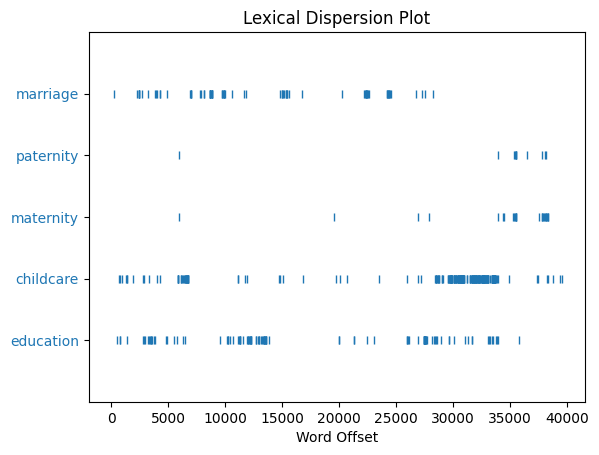

In [ ]:

# NLTK's dispersion_plot uses matplotlib under the hood
T.dispersion_plot(["marriage", "paternity", "maternity", "childcare", "education"])



**Prompt:** What patterns do you notice? Why might this matter for policy framing?


In [ ]:

framing_notes = """
(Write your observations here.)
"""
print(framing_notes)



## Part E — Lexical Diversity (10 min)
Lexical diversity = unique words / total words. Use a fixed slice for fair comparisons.


In [ ]:

def lexical_diversity(tok_list, n=None):
    """Return unique/total; if n is provided, compute on first n tokens."""
    if n:
        tok_list = tok_list[:n]
    total = len(tok_list) if tok_list else 1
    return len(set(tok_list)) / total

div_all = lexical_diversity(tokens)
div_2k  = lexical_diversity(tokens, 2000)

print("Lexical diversity (all tokens):", round(div_all, 4))
print("Lexical diversity (first 2,000):", round(div_2k, 4))


Lexical diversity (all tokens): 0.1106
Lexical diversity (first 2,000): 0.3365



**Why it matters (policy analysis):** Differences in lexical diversity can reflect changes in audience targeting, technicality vs. accessibility, or agenda breadth (e.g., a narrow crisis speech vs. a broad programmatic agenda).  

*(Optional)* Compare with a second speech by repeating Part A for another `fileid` and recomputing diversity on the same slice size.



## Part F — Reflection (10 min)
- Which tool felt most useful for policy analysis (concordance, dispersion, lexical diversity)? Why?  
- How could you apply this to a real policy dataset (hearings, legislation, news, social media)?


In [ ]:

final_reflection = """
(Write your brief reflection here.)
"""
print(final_reflection)



---
## 🚀 Stretch Challenges (Optional)

### 1) Collocations (common policy phrases)
Find frequently co-occurring word pairs (bigrams). These can reveal informative policy phrases (e.g., *national security*, *climate change*).


In [ ]:

from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Use a filtered token list (already lowercase & alphabetic)
finder = BigramCollocationFinder.from_words(tokens)
# Only consider reasonably frequent bigrams (adjust min_freq to taste)
finder.apply_freq_filter(3)
bigrams_pmi = finder.nbest(BigramAssocMeasures.pmi, 15)
bigrams_pmi


[('optimistic', 'scenario'),
 ('costa', 'rica'),
 ('vicious', 'cycle'),
 ('densely', 'populated'),
 ('entrance', 'exam'),
 ('golden', 'ticket'),
 ('ticket', 'syndrome'),
 ('naming', 'conventions'),
 ('formidable', 'challenge'),
 ('labo', 'ur'),
 ('polic', 'ies'),
 ('publicly', 'funded'),
 ('honorific', 'language'),
 ('coupl', 'es'),
 ('protections', 'sanctions')]


### 2) VADER sentiment on short snippets
Useful for very short statements (tweets, headlines). For long speeches, sentiment averages toward neutral.


In [ ]:

# VADER is in nltk.sentiment
nltk.download('vader_lexicon', quiet=True)
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


for s in raw:
    print(s, "->", sia.polarity_scores(s))


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
m -> {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
s -> {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
t -> {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
a -> {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
n -> {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
c -> {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
e -> {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
s -> {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
  -> {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
m -> {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
a -> {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
k -> {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
e -> {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
  -> {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
t -> {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
h -> {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
i -> {'neg': 0.0, 'n


### 3) Compare two texts (quick)
Repick another `fileid` and compute lexical diversity on the same slice (e.g., 2,000 tokens). What differences do you see?


In [ ]:

# Example scaffold:
# s2 = fileids[-1]
# raw2 = inaugural.raw(s2)
# tokens2 = [w.lower() for w in word_tokenize(raw2) if w.isalpha()]
# print("A:", s1, "div(2k) =", round(lexical_diversity(tokens, 2000), 4))
# print("B:", s2, "div(2k) =", round(lexical_diversity(tokens2, 2000), 4))


In [ ]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, FreqDist
from nltk.tokenize import RegexpTokenizer

def wordnet_pos(tag):
    return {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}.get(tag[0], wordnet.NOUN)

# 1) Tokenize & normalize (safer)
def tokenize_norm(text):
    tok = RegexpTokenizer(r"[A-Za-z0-9]+")  # keeps alphanumeric runs, drops punctuation
    return [t.lower() for t in tok.tokenize(text)]

# 2) Remove stopwords
def remove_stopwords(toks):
    stops = set(stopwords.words("english"))
    return [t for t in toks if t not in stops]

# 3–4) POS-tag once, then lemmatize
def pos_lemmatize(toks):
    tags = pos_tag(toks)
    lem = WordNetLemmatizer()
    return [lem.lemmatize(t, wordnet_pos(tag)) for t, tag in tags]

def run_pipeline(text):
    toks = tokenize_norm(text)
    toks_nostop = remove_stopwords(toks)
    clean = pos_lemmatize(toks_nostop)
    return toks, toks_nostop, clean


toks, toks_nostop, clean = run_pipeline(raw)
print("Speech:", raw)
print("Counts -> toks:", len(toks), "| no-stop:", len(toks_nostop), "| clean:", len(clean))
print("Top 10 (clean):", FreqDist(clean).most_common(10))

Speech: Korea’s Unborn Future
Understanding Low‑Fertility Trends
Korea’s Unborn Future Understanding Low‑Fertility Trends


KOREA’S UNBORN FUTURE: UNDERSTANDING LOW -FERTILITY TRENDS © OECD 2025  
  Executive Summary  
Birth rates are falling across the world and nowhere more so than in Korea, where fertility has imploded to 
unprecedented lows. As a consequence, the Korean population is expected to halve over the next six 
decades and the elderly (aged 65 or older) will account for around 58% of the total population by 2082. 
During this ti me, the old -age dependency ratio (the ratio of individuals aged 65 and over to those aged 20 
to 64) will surge from 28% today to 155%. The combination of a shrinking and ageing population poses a 
formidable challenge to sustaining social insurance systems and maintaining living standards. Labour 
shortages will intensify as retirees make up an increasing share of the population, and the fiscal cost of 
health, long -term care and pensions is set


### 4) Quick frequency table + matplotlib bar chart
Show top 15 tokens (after simple cleaning). *Keep charts simple and readable.*


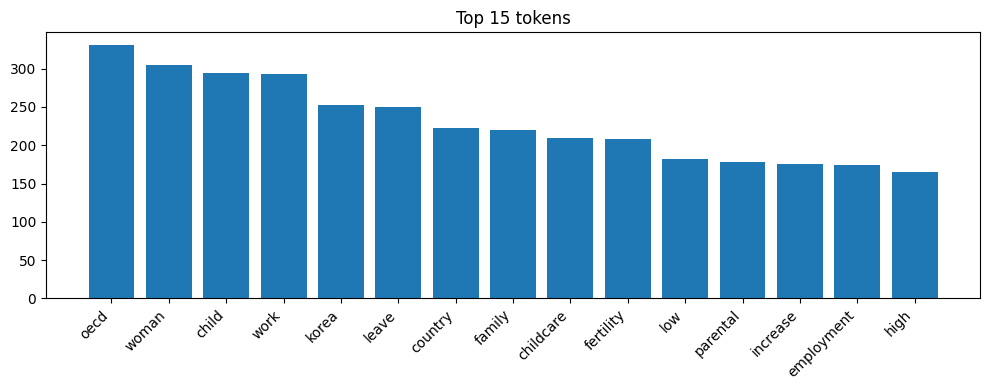

In [ ]:

from nltk import FreqDist
import matplotlib.pyplot as plt

fd = FreqDist(clean)
top = fd.most_common(15)

labels, counts = zip(*top)
plt.figure(figsize=(10,4))
plt.bar(range(len(labels)), counts)
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.title("Top 15 tokens")
plt.tight_layout()
plt.show()
